# FIFA.com 2018 Men's World Ranking Analysis
###### by Ryan Reardon

## Table of Contents
- Introduction
- Data Wrangling
 - Gather Data
 - Assess Data
 - Clean Data
- Exploratory Data Analysis
 - Storing
 - Analyzing and Visualizing
 - Hypothesis Testing
- Conclusion

# Introduction

Analyzing the Fifa.com men's 2018 rankings; we'll be looking at the rankings from the start of the year compared to the end of the year and the variables affecting those rankings.

2018 is a tournament year; in particular, a world cup year.  Many nations in various confederations are trying to qualify for the world cup; in addition, to qualifying for the world cup they're competing in the world cup.  Nations playing more matches besides friendlies as tournaments are worth more in points and going up against better competition should improve point totals and rankings possibly.

## Questions Asked:

1) Top Ranked and Best Performers; broken down by points, percentage changes in points, rank changes and classifying these in various categories such as confederation, grouping by rank and points change_rank change classification category?

2) Total points accrued through the year the main factor affecting rankings?

# Data Wrangling

## Gather Data

##### id12406.html
- This file is Fifa.com Dec 2018 national team Men's soccer Rankings; Fifa.com website is scraped and the file is downloaded programmatically using the requests library.

##### id12070.html
- This file is Fifa.com Jan 2018 national team Men's soccer Rankings; Fifa.com website is scraped and the file is downloaded programmatically using the requests library.

In [1]:
#import libraries
import pandas as pd
import os
import requests

In [2]:
#use request library to scrape fifa.com website
def scrape():
    #Dec 2018 rankings
    url_Dec_2018 = 'https://www.fifa.com/fifa-world-ranking/ranking-table/men/rank/id12406.html'
    response_Dec = requests.get(url_Dec_2018)

    with open(os.path.join(url_Dec_2018.split('/')[-1]), mode = 'wb') as file:
          file.write(response_Dec.content)
    
    #Jan 2018 rankings
    url_Jan_2018 = 'https://www.fifa.com/fifa-world-ranking/ranking-table/men/rank/id12070.html'
    response_Jan = requests.get(url_Jan_2018)
    
    with open(os.path.join(url_Jan_2018.split('/')[-1]), mode = 'wb') as file:
          file.write(response_Jan.content)
    
    return;
scrape()

In [3]:
#read in Dec html file from fifa.com
fifa_Dec_2018 = pd.read_html('id12406.html')[0]

#view the first couple lines of Dec dataframe
fifa_Dec_2018.head()

,Rnk,Team Team,Total Points PTS,Previous Points Prev.Pts,+/-,Positions Pos,Confederations fifa_confederations_abbr
0,2,France FRA,1726,1726,0,NaN,#UEFA#
1,1,Belgium BEL,1727,1727,0,NaN,#UEFA#
2,3,Brazil BRA,1676,1676,0,NaN,#CONMEBOL#
3,4,Croatia CRO,1634,1634,0,NaN,#UEFA#
4,5,England ENG,1631,1631,0,NaN,#UEFA#


In [4]:
#read in Jan html file from fifa.com
fifa_Jan_2018 = pd.read_html('id12070.html')[0]

#view the first couple lines of Jan dataframe
fifa_Jan_2018.head()

,Rnk,Team Team,Total Points PTS,Previous Points Prev.Pts,+/-,Positions Pos,Confederations fifa_confederations_abbr
0,1,Germany GER,1602,1602,0,NaN,#UEFA#
1,2,Brazil BRA,1483,1483,0,NaN,#CONMEBOL#
2,3,Portugal POR,1358,1358,0,NaN,#UEFA#
3,4,Argentina ARG,1348,1348,0,NaN,#CONMEBOL#
4,5,Belgium BEL,1325,1325,0,NaN,#UEFA#


## Assess Data

##### Visual Assessment
- Data gathered from Fifa.com is displayed in a dataframe to assess visually for quality and tidiness issues.

In [5]:
#display 12406.html; the Dec 2018 rankings
fifa_Dec_2018

,Rnk,Team Team,Total Points PTS,Previous Points Prev.Pts,+/-,Positions Pos,Confederations fifa_confederations_abbr
0,2,France FRA,1726,1726,0,NaN,#UEFA#
1,1,Belgium BEL,1727,1727,0,NaN,#UEFA#
2,3,Brazil BRA,1676,1676,0,NaN,#CONMEBOL#
3,4,Croatia CRO,1634,1634,0,NaN,#UEFA#
4,5,England ENG,1631,1631,0,NaN,#UEFA#
5,6,Portugal POR,1614,1614,0,NaN,#UEFA#
6,7,Uruguay URU,1609,1609,0,NaN,#CONMEBOL#
7,8,Switzerland SUI,1599,1599,0,NaN,#UEFA#
8,9,Spain ESP,1591,1591,0,NaN,#UEFA#
9,10,Denmark DEN,1589,1589,0,NaN,#UEFA#


In [6]:
#display 12070.html; the Dec 2018 rankings
fifa_Jan_2018

,Rnk,Team Team,Total Points PTS,Previous Points Prev.Pts,+/-,Positions Pos,Confederations fifa_confederations_abbr
0,1,Germany GER,1602,1602,0,NaN,#UEFA#
1,2,Brazil BRA,1483,1483,0,NaN,#CONMEBOL#
2,3,Portugal POR,1358,1358,0,NaN,#UEFA#
3,4,Argentina ARG,1348,1348,0,NaN,#CONMEBOL#
4,5,Belgium BEL,1325,1325,0,NaN,#UEFA#
5,6,Spain ESP,1231,1231,0,NaN,#UEFA#
6,7,Poland POL,1209,1209,0,NaN,#UEFA#
7,8,Switzerland SUI,1190,1190,0,NaN,#UEFA#
8,9,France FRA,1183,1183,0,NaN,#UEFA#
9,10,Chile CHI,1147,1162,0,NaN,#CONMEBOL#


##### Programmatic Assessment
- Using pandas methods, to identify quality and tidiness issues in the data gathered from Fifa.com.

In [7]:
#assess the Dec dataframe for missing data, incorrect dataypes etc.
fifa_Dec_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 7 columns):
Rnk                                         211 non-null int64
Team  Team                                  211 non-null object
Total Points  PTS                           211 non-null int64
Previous Points  Prev.Pts                   211 non-null int64
+/-                                         211 non-null int64
Positions  Pos                              0 non-null float64
Confederations  fifa_confederations_abbr    211 non-null object
dtypes: float64(1), int64(4), object(2)
memory usage: 11.6+ KB


In [8]:
#assess the Jan dataframe for missing data, incorrect datatypes etc.
fifa_Jan_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 7 columns):
Rnk                                         211 non-null int64
Team  Team                                  211 non-null object
Total Points  PTS                           211 non-null int64
Previous Points  Prev.Pts                   211 non-null int64
+/-                                         211 non-null int64
Positions  Pos                              0 non-null float64
Confederations  fifa_confederations_abbr    211 non-null object
dtypes: float64(1), int64(4), object(2)
memory usage: 11.6+ KB


In [9]:
#check for duplicate teams in the Dec and Jan rankings
dec_dupe = sum(fifa_Dec_2018['Team  Team'].duplicated())
jan_dupe = sum(fifa_Jan_2018['Team  Team'].duplicated())

print('Duplicate teams in Dec rankings:',dec_dupe)
print('Duplicate teams in Jan rankings:',jan_dupe)

Duplicate teams in Dec rankings: 0
Duplicate teams in Jan rankings: 0


In [10]:
#check to see how many teams have the same ranking in Dec rankings
fifa_Dec_2018.Rnk.value_counts()

204    3
154    2
192    2
29     2
76     2
120    2
133    2
20     2
62     2
14     2
139    2
127    2
109    2
190    2
86     2
44     2
46     2
208    2
51     2
101    2
72     2
197    2
141    2
64     1
65     1
66     1
60     1
61     1
67     1
68     1
      ..
111    1
108    1
107    1
106    1
210    1
104    1
103    1
100    1
124    1
125    1
126    1
129    1
152    1
151    1
150    1
149    1
148    1
147    1
146    1
145    1
144    1
143    1
138    1
137    1
136    1
135    1
132    1
131    1
130    1
1      1
Name: Rnk, Length: 187, dtype: int64

In [11]:
#check to see how many teams have the same ranking in Jan rankings
fifa_Jan_2018.Rnk.value_counts()

206    6
175    3
84     3
194    3
160    3
168    3
90     2
106    2
78     2
73     2
116    2
68     2
124    2
32     2
166    2
25     2
93     2
192    2
202    2
14     1
62     1
7      1
67     1
66     1
65     1
64     1
63     1
61     1
71     1
60     1
      ..
105    1
104    1
103    1
102    1
205    1
100    1
99     1
98     1
120    1
121    1
122    1
123    1
142    1
141    1
140    1
139    1
138    1
137    1
136    1
135    1
134    1
133    1
132    1
131    1
130    1
129    1
128    1
127    1
126    1
1      1
Name: Rnk, Length: 183, dtype: int64

### Both dataframes have a similar structures: Quality and Tidiness we'll be evaluated together

#### Quality
- Postions Pos column doesn't have data
- Team Team column is merged with the abbreviation column
- fifa confederation name has number symbols around the name
- Previous Points  Prev.Pts column has two names for one column
- Previous Points  Prev.Pts column is only on a month basis

#### Tidiness
- proper column headers
- Dec dataframe rankings aren't lining up the index

## Clean Data: Dec and Jan FIFA Men's Rankings

#### Define
- Delete the Positions Pos columns with null data
- Delete previous points columns, since they represent the previous month
- Delete +/- columns, since they represent the previous month
- Split Team  Team column and create two new seperate columns
- Remove the number symbol in the text from the fifa confederation column
- Sort both dataframes by ranking and reindex
- Rename and reorder columns
- save clean Dec and Jan files

#### Code and Test 

### Delete the columns not used for analyis and the columns that show prior month data change

In [12]:
#delete Postion Pos column in Dec
fifa_Dec_2018.drop(['Positions  Pos', 'Previous Points  Prev.Pts', '+/-'], axis=1, inplace=True)

#test
list(fifa_Dec_2018)

['Rnk',
 'Team  Team',
 'Total Points  PTS',
 'Confederations  fifa_confederations_abbr']

In [13]:
#delete Postion Pos column in Jan
fifa_Jan_2018.drop(['Positions  Pos', 'Previous Points  Prev.Pts', '+/-'], axis=1, inplace=True)

#test
list(fifa_Jan_2018)

['Rnk',
 'Team  Team',
 'Total Points  PTS',
 'Confederations  fifa_confederations_abbr']

### Split Team  Team column; create two seperate columns Team and Team Abbreviation and delete Team Abbreviation

In [14]:
#split Team  Team column in Dec in two
fifa_Dec_2018['Team'], fifa_Dec_2018['Team_Abbreviation'] = fifa_Dec_2018['Team  Team'].str.split('  ', 1).str

#drop team abbreviation column
fifa_Dec_2018.drop(['Team_Abbreviation'], axis = 1, inplace=True)

#test
fifa_Dec_2018.head()

,Rnk,Team Team,Total Points PTS,Confederations fifa_confederations_abbr,Team
0,2,France FRA,1726,#UEFA#,France
1,1,Belgium BEL,1727,#UEFA#,Belgium
2,3,Brazil BRA,1676,#CONMEBOL#,Brazil
3,4,Croatia CRO,1634,#UEFA#,Croatia
4,5,England ENG,1631,#UEFA#,England


In [15]:
#split Team  Team column in Jan in two
fifa_Jan_2018['Team'], fifa_Jan_2018['Team_Abbreviation'] = fifa_Jan_2018['Team  Team'].str.split('  ', 1).str

#drop team abbreviation column
fifa_Jan_2018.drop(['Team_Abbreviation'], axis = 1, inplace=True)

#test
fifa_Jan_2018.head()

,Rnk,Team Team,Total Points PTS,Confederations fifa_confederations_abbr,Team
0,1,Germany GER,1602,#UEFA#,Germany
1,2,Brazil BRA,1483,#CONMEBOL#,Brazil
2,3,Portugal POR,1358,#UEFA#,Portugal
3,4,Argentina ARG,1348,#CONMEBOL#,Argentina
4,5,Belgium BEL,1325,#UEFA#,Belgium


### Strip # Symbol from Confederations fifa_confederations_abbr Column

In [16]:
#strip # symbol from Confederations fifa_confederations_abbr column
fifa_Dec_2018['Confederations  fifa_confederations_abbr'] = fifa_Dec_2018['Confederations  fifa_confederations_abbr'].map(lambda x: x.lstrip('#').rstrip('#'))

#test
fifa_Dec_2018.head()

,Rnk,Team Team,Total Points PTS,Confederations fifa_confederations_abbr,Team
0,2,France FRA,1726,UEFA,France
1,1,Belgium BEL,1727,UEFA,Belgium
2,3,Brazil BRA,1676,CONMEBOL,Brazil
3,4,Croatia CRO,1634,UEFA,Croatia
4,5,England ENG,1631,UEFA,England


In [17]:
#strip # symbol from Confederations fifa_confederations_abbr column
fifa_Jan_2018['Confederations  fifa_confederations_abbr'] = fifa_Jan_2018['Confederations  fifa_confederations_abbr'].map(lambda x: x.lstrip('#').rstrip('#'))

#test
fifa_Jan_2018.head()

,Rnk,Team Team,Total Points PTS,Confederations fifa_confederations_abbr,Team
0,1,Germany GER,1602,UEFA,Germany
1,2,Brazil BRA,1483,CONMEBOL,Brazil
2,3,Portugal POR,1358,UEFA,Portugal
3,4,Argentina ARG,1348,CONMEBOL,Argentina
4,5,Belgium BEL,1325,UEFA,Belgium


### Sort Dec and Jan dataframes by rankings and reindex

In [18]:
#reorder index Dec so it's inline with the rankings
fifa_Dec_2018 = fifa_Dec_2018.sort_values(['Rnk'], ascending=True)

fifa_Dec_2018 = fifa_Dec_2018.reset_index(drop=True)

#test
fifa_Dec_2018.head()

,Rnk,Team Team,Total Points PTS,Confederations fifa_confederations_abbr,Team
0,1,Belgium BEL,1727,UEFA,Belgium
1,2,France FRA,1726,UEFA,France
2,3,Brazil BRA,1676,CONMEBOL,Brazil
3,4,Croatia CRO,1634,UEFA,Croatia
4,5,England ENG,1631,UEFA,England


In [19]:
#reorder index Jan so it's inline with the rankings
fifa_Jan_2018 = fifa_Jan_2018.sort_values(['Rnk'], ascending=True)

fifa_Jan_2018 = fifa_Jan_2018.reset_index(drop=True)

#test
fifa_Jan_2018.head()

,Rnk,Team Team,Total Points PTS,Confederations fifa_confederations_abbr,Team
0,1,Germany GER,1602,UEFA,Germany
1,2,Brazil BRA,1483,CONMEBOL,Brazil
2,3,Portugal POR,1358,UEFA,Portugal
3,4,Argentina ARG,1348,CONMEBOL,Argentina
4,5,Belgium BEL,1325,UEFA,Belgium


### Rename and reorder columns for Dec and Jan

In [20]:
#rename columns Dec
fifa_Dec_2018 = fifa_Dec_2018.rename(columns={'Rnk':'Rank', 'Total Points  PTS':'Total_Points', 
                            'Confederations  fifa_confederations_abbr':'Confederation'})

#reorder columns Dec
fifa_Dec_2018 = fifa_Dec_2018[['Rank', 'Team','Total_Points','Confederation']]

#test
list(fifa_Dec_2018)

['Rank', 'Team', 'Total_Points', 'Confederation']

In [21]:
#rename columns Jan
fifa_Jan_2018 = fifa_Jan_2018.rename(columns={'Rnk':'Rank', 'Total Points  PTS':'Total_Points', 
                            'Confederations  fifa_confederations_abbr':'Confederation'})

#reorder columns Jan
fifa_Jan_2018 = fifa_Jan_2018[['Rank', 'Team','Total_Points','Confederation']]

#test
list(fifa_Jan_2018)

['Rank', 'Team', 'Total_Points', 'Confederation']

In [22]:
#Dec datatypes
fifa_Dec_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 4 columns):
Rank             211 non-null int64
Team             211 non-null object
Total_Points     211 non-null int64
Confederation    211 non-null object
dtypes: int64(2), object(2)
memory usage: 6.7+ KB


In [23]:
#Jan datatypes
fifa_Jan_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 4 columns):
Rank             211 non-null int64
Team             211 non-null object
Total_Points     211 non-null int64
Confederation    211 non-null object
dtypes: int64(2), object(2)
memory usage: 6.7+ KB


### Save clean Dec and Jan files to csv

In [24]:
#save cleaned Dec file to csv
fifa_Dec_2018.to_csv('fifa_Dec_2018.csv', index = False, encoding = 'utf-8')

#save cleaned Jan file to csv
fifa_Jan_2018.to_csv('fifa_Jan_2018.csv', index = False, encoding = 'utf-8')

### Merge Dec and Jan files and assess for quality and tidiness

In [25]:
#read in clean Dec file
def merge():
    #read in clean fifa ranking files
    fifa_Dec_2018_clean = pd.read_csv('fifa_Dec_2018.csv')
    fifa_Jan_2018_clean = pd.read_csv('fifa_jan_2018.csv')
    
    #make copies of dataframes
    fifa_Dec_2018_copy = fifa_Dec_2018_clean
    fifa_Jan_2018_copy = fifa_Jan_2018_clean
    
    #merge the dataframes into one datafram
    fifa_2018_merge = pd.merge(fifa_Dec_2018_copy, fifa_Jan_2018_copy, how = 'outer', on = ['Team'])
    
    #save merged file to csv
    fifa_2018_merge.to_csv('fifa_2018_merge.csv', index = False, encoding = 'utf-8')
    
    #test
    fifa_2018_merge.info()
    
    return;
merge()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211 entries, 0 to 210
Data columns (total 7 columns):
Rank_x             211 non-null int64
Team               211 non-null object
Total_Points_x     211 non-null int64
Confederation_x    211 non-null object
Rank_y             211 non-null int64
Total_Points_y     211 non-null int64
Confederation_y    211 non-null object
dtypes: int64(4), object(3)
memory usage: 13.2+ KB


### Visual assessment of merged dataframes

In [26]:
#read in merged file
fifa_2018_merge = pd.read_csv('fifa_2018_merge.csv')

#visual assessment
fifa_2018_merge

,Rank_x,Team,Total_Points_x,Confederation_x,Rank_y,Total_Points_y,Confederation_y
0,1,Belgium,1727,UEFA,5,1325,UEFA
1,2,France,1726,UEFA,9,1183,UEFA
2,3,Brazil,1676,CONMEBOL,2,1483,CONMEBOL
3,4,Croatia,1634,UEFA,15,1048,UEFA
4,5,England,1631,UEFA,16,1047,UEFA
5,6,Portugal,1614,UEFA,3,1358,UEFA
6,7,Uruguay,1609,CONMEBOL,22,924,CONMEBOL
7,8,Switzerland,1599,UEFA,8,1190,UEFA
8,9,Spain,1591,UEFA,6,1231,UEFA
9,10,Denmark,1589,UEFA,12,1099,UEFA


In [27]:
#from viewing csv visually the below rows didn't convert well due to charcter issues


### Programmatic assessment of merged dataframes

In [28]:
#view info for missing data and incorrect datatypes
fifa_2018_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 7 columns):
Rank_x             211 non-null int64
Team               211 non-null object
Total_Points_x     211 non-null int64
Confederation_x    211 non-null object
Rank_y             211 non-null int64
Total_Points_y     211 non-null int64
Confederation_y    211 non-null object
dtypes: int64(4), object(3)
memory usage: 11.6+ KB


In [29]:
#check for duplicated teams
sum(fifa_2018_merge['Team'].duplicated())

0

In [30]:
##count of NaN values
fifa_2018_merge.isnull().sum()

Rank_x             0
Team               0
Total_Points_x     0
Confederation_x    0
Rank_y             0
Total_Points_y     0
Confederation_y    0
dtype: int64

In [31]:
#locate NaN values
fifa_2018_merge.loc[(fifa_2018_merge.Rank_x.isnull())]

,Rank_x,Team,Total_Points_x,Confederation_x,Rank_y,Total_Points_y,Confederation_y


In [32]:
fifa_2018_merge.loc[(fifa_2018_merge.Rank_y.isnull())]

,Rank_x,Team,Total_Points_x,Confederation_x,Rank_y,Total_Points_y,Confederation_y


In [33]:
#display text from visual assessment that didn't translate to csv well
fifa_2018_merge[fifa_2018_merge['Team'].str.contains(" e ", na=False)] 

,Rank_x,Team,Total_Points_x,Confederation_x,Rank_y,Total_Points_y,Confederation_y
184,185,Sao Tome e Principe,920,CAF,179,94,CAF


In [34]:
fifa_2018_merge[fifa_2018_merge['Team'].str.contains("/", na=False)]

,Rank_x,Team,Total_Points_x,Confederation_x,Rank_y,Total_Points_y,Confederation_y
179,180,St. Vincent / Grenadines,946,CONCACAF,175,99,CONCACAF


In [35]:
fifa_2018_merge[fifa_2018_merge['Team'].str.contains("d'Ivoire", na=False)]

,Rank_x,Team,Total_Points_x,Confederation_x,Rank_y,Total_Points_y,Confederation_y
64,65,Côte d'Ivoire,1356,CAF,61,544,CAF


In [36]:
fifa_2018_merge[fifa_2018_merge['Team'].str.contains("Cur", na=False)]

,Rank_x,Team,Total_Points_x,Confederation_x,Rank_y,Total_Points_y,Confederation_y
79,80,Curacao,1306,CONCACAF,84,407,CONCACAF


#### Quality
- Some text didn't translate correctly in csv
- Iran is in the rankings twice with different names
- Incorrect datatypes
- Nan Values
- Columns not needed for analysis
- Additional columns needed for analysis

#### Tidiness
- Proper column headers

## Clean Data: Merged Men's FIFA Rankings

#### Define
- Update the team names with non standard text to standard text, so it translates over to csv
- Update the Iran entries as one entry
- Update datatypes
- Add a column that shows the percentage change between Jan and Dec total points called Total_Points_PerChg
- Add a column that shows the rank change from Jan and Dec called Rank_Chg
- Add a classification column to show total percent change | rank change
- Add a classification column to group the rankings
- Rename and reorder columns

#### Code and Test

### Update team names to a standard format for file conversion purposes

In [37]:
#update Sao Tome and Principe
fifa_2018_merge.loc[(fifa_2018_merge.Rank_x == 185.0), 'Team'] = "Sao Tome and Principe"

#update st vincent and the grenadines
fifa_2018_merge.loc[(fifa_2018_merge.Rank_x == 180.0), 'Team'] = "St Vincent and the Grenadines"

#update ivory coast
fifa_2018_merge.loc[(fifa_2018_merge.Rank_x == 65.0), 'Team'] = "Ivory Coast"

#update curacao
fifa_2018_merge.loc[(fifa_2018_merge.Rank_x == 80.0), 'Team'] = "Curacao"

#test
fifa_2018_merge[fifa_2018_merge['Team'].isin(['Sao Tome and Principe', 'St Vincent and the Grenadines',
                                             'Curacao', 'Ivory Coast'])]

,Rank_x,Team,Total_Points_x,Confederation_x,Rank_y,Total_Points_y,Confederation_y
64,65,Ivory Coast,1356,CAF,61,544,CAF
79,80,Curacao,1306,CONCACAF,84,407,CONCACAF
179,180,St Vincent and the Grenadines,946,CONCACAF,175,99,CONCACAF
184,185,Sao Tome and Principe,920,CAF,179,94,CAF


### Update Iran as one entry; fill the data missing and delete the extra rowing

In [38]:
#update Team IR Iran to Iran
fifa_2018_merge.loc[fifa_2018_merge.Team == 'IR Iran', 'Team'] = 'Iran'

#update Rank_y NaN value
fifa_2018_merge.loc[fifa_2018_merge.Rank_y.isnull(), 'Rank_y'] = 34

#update Total_Points_y Nan value
fifa_2018_merge.loc[fifa_2018_merge.Total_Points_y.isnull(), 'Total_Points_y'] = 797

#update Confederation_y NaN value
fifa_2018_merge.loc[fifa_2018_merge.Confederation_y.isnull(), 'Confederation_y'] = 'AFC'

#test
fifa_2018_merge.loc[fifa_2018_merge.Team == 'Iran']

,Rank_x,Team,Total_Points_x,Confederation_x,Rank_y,Total_Points_y,Confederation_y
29,29,Iran,1481,AFC,34,797,AFC


In [39]:
#delete the extra Iran row with then NA values that the other is filled
fifa_2018_merge.dropna(inplace = True)

#reindex
fifa_Dec_2018 = fifa_Dec_2018.reset_index(drop=True)

#test
fifa_2018_merge.loc[fifa_2018_merge.Team == 'Iran']

,Rank_x,Team,Total_Points_x,Confederation_x,Rank_y,Total_Points_y,Confederation_y
29,29,Iran,1481,AFC,34,797,AFC


### Update datatypes

In [40]:
#update datatypes from float to int
fifa_2018_merge[['Rank_x', 'Total_Points_x', 'Rank_y', 
                 'Total_Points_y']] =  fifa_2018_merge[['Rank_x', 'Total_Points_x', 'Rank_y', 'Total_Points_y']].astype('int64')

#test
fifa_2018_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211 entries, 0 to 210
Data columns (total 7 columns):
Rank_x             211 non-null int64
Team               211 non-null object
Total_Points_x     211 non-null int64
Confederation_x    211 non-null object
Rank_y             211 non-null int64
Total_Points_y     211 non-null int64
Confederation_y    211 non-null object
dtypes: int64(4), object(3)
memory usage: 13.2+ KB


### Add a column to show the change in total points by percent from Jan to Dec

In [41]:
#add a percentage change in points column
fifa_2018_merge['Total_Points_PerChg'] = (1 - fifa_2018_merge['Total_Points_y'] / fifa_2018_merge['Total_Points_x'])*100

#round the column
decimals = 2    
fifa_2018_merge['Total_Points_PerChg'] = fifa_2018_merge['Total_Points_PerChg'].apply(lambda x: round(x, decimals))

#test
fifa_2018_merge.head()

,Rank_x,Team,Total_Points_x,Confederation_x,Rank_y,Total_Points_y,Confederation_y,Total_Points_PerChg
0,1,Belgium,1727,UEFA,5,1325,UEFA,23.28
1,2,France,1726,UEFA,9,1183,UEFA,31.46
2,3,Brazil,1676,CONMEBOL,2,1483,CONMEBOL,11.52
3,4,Croatia,1634,UEFA,15,1048,UEFA,35.86
4,5,England,1631,UEFA,16,1047,UEFA,35.81


### Add a column to show the change in rank from Jan to Dec

In [42]:
#add a rank change column
fifa_2018_merge['Rank_Chg'] = fifa_2018_merge['Rank_y'] - fifa_2018_merge['Rank_x']

#test
fifa_2018_merge.head()

,Rank_x,Team,Total_Points_x,Confederation_x,Rank_y,Total_Points_y,Confederation_y,Total_Points_PerChg,Rank_Chg
0,1,Belgium,1727,UEFA,5,1325,UEFA,23.28,4
1,2,France,1726,UEFA,9,1183,UEFA,31.46,7
2,3,Brazil,1676,CONMEBOL,2,1483,CONMEBOL,11.52,-1
3,4,Croatia,1634,UEFA,15,1048,UEFA,35.86,11
4,5,England,1631,UEFA,16,1047,UEFA,35.81,11


### Add a column that shows total percentage change and rank change as a singular classification

In [43]:
#create a total percentage change classification category column from the list Best_Worst_Points
Best_Worst_Points = []

for row in fifa_2018_merge['Total_Points_PerChg']:
    if row > 0:
        Best_Worst_Points.append('Increase')
    elif row < 0:
        Best_Worst_Points.append('Decrease')
    else:
        Best_Worst_Points.append('No Change')

fifa_2018_merge['Total_Points_PerChgClass'] = Best_Worst_Points

In [44]:
#create a rank change classification category column from the list Best_Worst_Rank
Best_Worst_Rank = []

for row in fifa_2018_merge['Rank_Chg']:
    if row > 0:
        Best_Worst_Rank.append('Increase')
    elif row < 0:
        Best_Worst_Rank.append('Decrease')
    else:
        Best_Worst_Rank.append('No Change')

fifa_2018_merge['Rank_ChgClass'] = Best_Worst_Rank

In [45]:
#join columns classifcation categories into one
fifa_2018_merge['PtsChgClass_RnkChgClass'] = fifa_2018_merge[['Total_Points_PerChgClass', 
                                              'Rank_ChgClass']].apply(lambda x: ' | '.join(x), axis=1)

#test
fifa_2018_merge.head()

,Rank_x,Team,Total_Points_x,Confederation_x,Rank_y,Total_Points_y,Confederation_y,Total_Points_PerChg,Rank_Chg,Total_Points_PerChgClass,Rank_ChgClass,PtsChgClass_RnkChgClass
0,1,Belgium,1727,UEFA,5,1325,UEFA,23.28,4,Increase,Increase,Increase | Increase
1,2,France,1726,UEFA,9,1183,UEFA,31.46,7,Increase,Increase,Increase | Increase
2,3,Brazil,1676,CONMEBOL,2,1483,CONMEBOL,11.52,-1,Increase,Decrease,Increase | Decrease
3,4,Croatia,1634,UEFA,15,1048,UEFA,35.86,11,Increase,Increase,Increase | Increase
4,5,England,1631,UEFA,16,1047,UEFA,35.81,11,Increase,Increase,Increase | Increase


### Add a rank group column

In [46]:
#function that returns a value based grouping rankings in categories 
def fifa_rank(row):
    if row['Rank_x'] <= 30:
        val = 'Rank 1 - 30'
    elif row['Rank_x'] >= 31 and row['Rank_x'] <= 60:
        val = 'Rank 31 - 60'
    elif row['Rank_x'] >= 61 and row['Rank_x'] <= 90:
        val = 'Rank 61 - 90'
    elif row['Rank_x'] >= 91 and row['Rank_x'] <= 120:
        val = 'Rank 91 - 120'
    elif row['Rank_x'] >= 121 and row['Rank_x'] <= 150:
        val = 'Rank 121 - 150'
    elif row['Rank_x'] >= 151 and row['Rank_x'] <= 180:
        val = 'Rank 151 - 180'
    else:
        val = 'Rank 181 - 211'
    return val

In [47]:
#create a new column with values from fifa_rank function called Rank_Group
fifa_2018_merge['Rank_Group'] = fifa_2018_merge.apply(fifa_rank, axis=1)

#test
fifa_2018_merge.head()

,Rank_x,Team,Total_Points_x,Confederation_x,Rank_y,Total_Points_y,Confederation_y,Total_Points_PerChg,Rank_Chg,Total_Points_PerChgClass,Rank_ChgClass,PtsChgClass_RnkChgClass,Rank_Group
0,1,Belgium,1727,UEFA,5,1325,UEFA,23.28,4,Increase,Increase,Increase | Increase,Rank 1 - 30
1,2,France,1726,UEFA,9,1183,UEFA,31.46,7,Increase,Increase,Increase | Increase,Rank 1 - 30
2,3,Brazil,1676,CONMEBOL,2,1483,CONMEBOL,11.52,-1,Increase,Decrease,Increase | Decrease,Rank 1 - 30
3,4,Croatia,1634,UEFA,15,1048,UEFA,35.86,11,Increase,Increase,Increase | Increase,Rank 1 - 30
4,5,England,1631,UEFA,16,1047,UEFA,35.81,11,Increase,Increase,Increase | Increase,Rank 1 - 30


### Rename and Reorder Columns

In [48]:
#rename columns
fifa_2018_merge = fifa_2018_merge.rename(columns={'Rank_x':'Rank', 'Total_Points_x':'Total_Points_Dec', 
                            'Total_Points_y':'Total_Points_Jan', 'Confederation_x':'Confederation'})

#reorder columns
fifa_2018_merge = fifa_2018_merge[['Rank', 'Team','Total_Points_Dec','Total_Points_Jan', 'Total_Points_PerChg', 'Rank_Chg', 
             'PtsChgClass_RnkChgClass','Rank_Group', 'Confederation']]

#test
list(fifa_2018_merge)

['Rank',
 'Team',
 'Total_Points_Dec',
 'Total_Points_Jan',
 'Total_Points_PerChg',
 'Rank_Chg',
 'PtsChgClass_RnkChgClass',
 'Rank_Group',
 'Confederation']

In [49]:
#check datatypes of the cleaned dataframe
fifa_2018_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211 entries, 0 to 210
Data columns (total 9 columns):
Rank                       211 non-null int64
Team                       211 non-null object
Total_Points_Dec           211 non-null int64
Total_Points_Jan           211 non-null int64
Total_Points_PerChg        211 non-null float64
Rank_Chg                   211 non-null int64
PtsChgClass_RnkChgClass    211 non-null object
Rank_Group                 211 non-null object
Confederation              211 non-null object
dtypes: float64(1), int64(4), object(4)
memory usage: 16.5+ KB


In [50]:
#view cleaned first couple lines of cleaned dataframe
fifa_2018_merge.head()

,Rank,Team,Total_Points_Dec,Total_Points_Jan,Total_Points_PerChg,Rank_Chg,PtsChgClass_RnkChgClass,Rank_Group,Confederation
0,1,Belgium,1727,1325,23.28,4,Increase | Increase,Rank 1 - 30,UEFA
1,2,France,1726,1183,31.46,7,Increase | Increase,Rank 1 - 30,UEFA
2,3,Brazil,1676,1483,11.52,-1,Increase | Decrease,Rank 1 - 30,CONMEBOL
3,4,Croatia,1634,1048,35.86,11,Increase | Increase,Rank 1 - 30,UEFA
4,5,England,1631,1047,35.81,11,Increase | Increase,Rank 1 - 30,UEFA


# Exploratory Data Analysis

## Storing

In [51]:
#store cleaned dataframe in csv
fifa_2018_merge.to_csv('fifa_2018_clean.csv', index=False, encoding = 'utf-8')

## Analysis and Visualization

In [52]:
#import packages for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import numpy as np

#read in fifa.csv file
fifa_2018_clean = pd.read_csv('fifa_2018_clean.csv')

#test
fifa_2018_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 9 columns):
Rank                       211 non-null int64
Team                       211 non-null object
Total_Points_Dec           211 non-null int64
Total_Points_Jan           211 non-null int64
Total_Points_PerChg        211 non-null float64
Rank_Chg                   211 non-null int64
PtsChgClass_RnkChgClass    211 non-null object
Rank_Group                 211 non-null object
Confederation              211 non-null object
dtypes: float64(1), int64(4), object(4)
memory usage: 14.9+ KB


## Distribution of variables

In [53]:
#view some descriptive statistics about the dataframe distributions
fifa_2018_clean.describe()

,Rank,Total_Points_Dec,Total_Points_Jan,Total_Points_PerChg,Rank_Chg
count,211.000000,211.000000,211.000000,211.000000,211.000000
mean,105.881517,1213.123223,414.563981,69.581137,-0.085308
std,61.032155,225.030271,348.065250,21.345532,10.043824
min,1.000000,854.000000,0.000000,-2.820000,-37.000000
25%,53.500000,1010.500000,125.500000,55.430000,-6.000000
50%,106.000000,1209.000000,311.000000,73.930000,0.000000
75%,158.500000,1404.500000,633.000000,87.145000,6.000000
max,211.000000,1727.000000,1602.000000,100.000000,47.000000


#### Total Points Distribution in December

In [54]:
#view the descriptive statistics of Total Points Dec variable
print('Descripitive Statistics of Total Points in December Variable','\n')
print(fifa_2018_clean.Total_Points_Dec.describe(),'\n')
print('The value that appears the most in the Distribution','\n')
print('mode', fifa_2018_clean.Total_Points_Dec.mode()[0])

Descripitive Statistics of Total Points in December Variable 

count     211.000000
mean     1213.123223
std       225.030271
min       854.000000
25%      1010.500000
50%      1209.000000
75%      1404.500000
max      1727.000000
Name: Total_Points_Dec, dtype: float64 

The value that appears the most in the Distribution 

mode 868


In [55]:
#set seaborn
sns.set(font_scale=1.5)
sns.set_style({'axes.grid' : False})

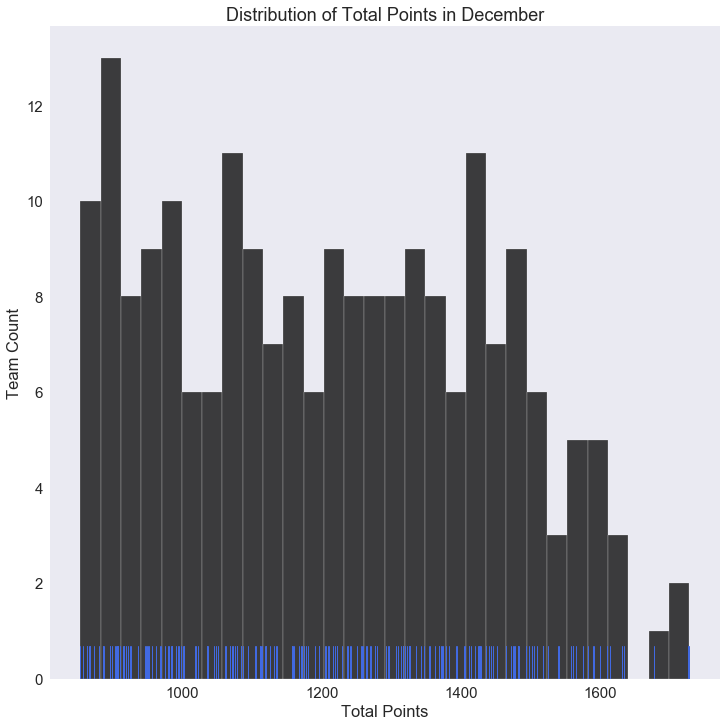

In [56]:
#histogram of Total Points
plt.figure(figsize=(12,12))
plt.hist(fifa_2018_clean.Total_Points_Dec, alpha=.75, bins=30, color='black', edgecolor='white')
sns.rugplot(fifa_2018_clean.Total_Points_Dec, color='royalblue')

plt.title('Distribution of Total Points in December')
plt.xlabel('Total Points')
plt.ylabel('Team Count')
plt.show();

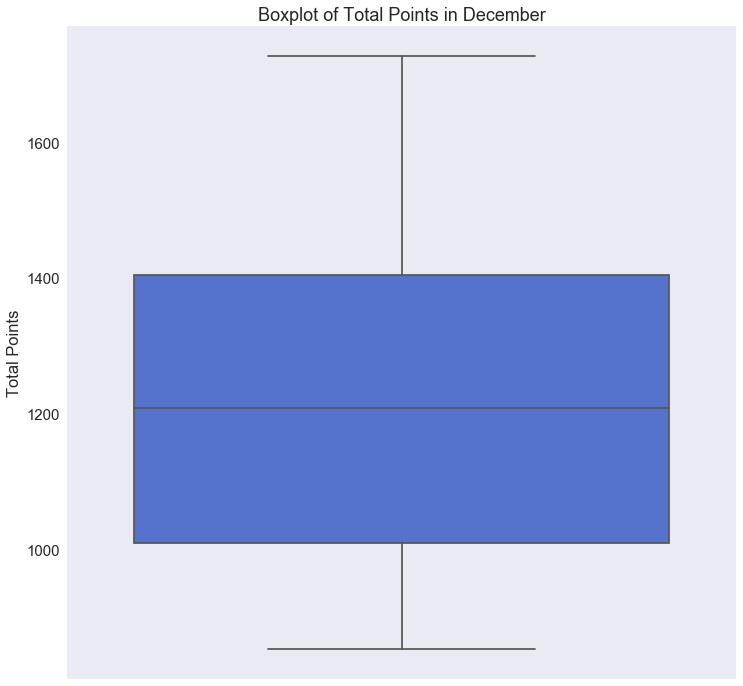

In [57]:
#boxplot of total points Dec variable
plt.figure(figsize=(12,12))
sns.boxplot( y=fifa_2018_clean["Total_Points_Dec"], color='royalblue')

plt.title('Boxplot of Total Points in December', fontsize=18)
plt.ylabel('Total Points')
plt.show();

Total Points Dec variable has a multimodal distribution; you can see the multiple peaks in distribution forming groups. The value that appears most is close to min value, or low point totals; the high point totals are spreading out the tale as outliers and giving the distribution a slight right skew. Most of the data points range between the min value of 854 to 1500 points.  The larger values do give the distribution that slight tail, but it's not really an outlier as you can see in the boxplot. The mean and median are very close in value 1200 for a distribution with multiple peaks.

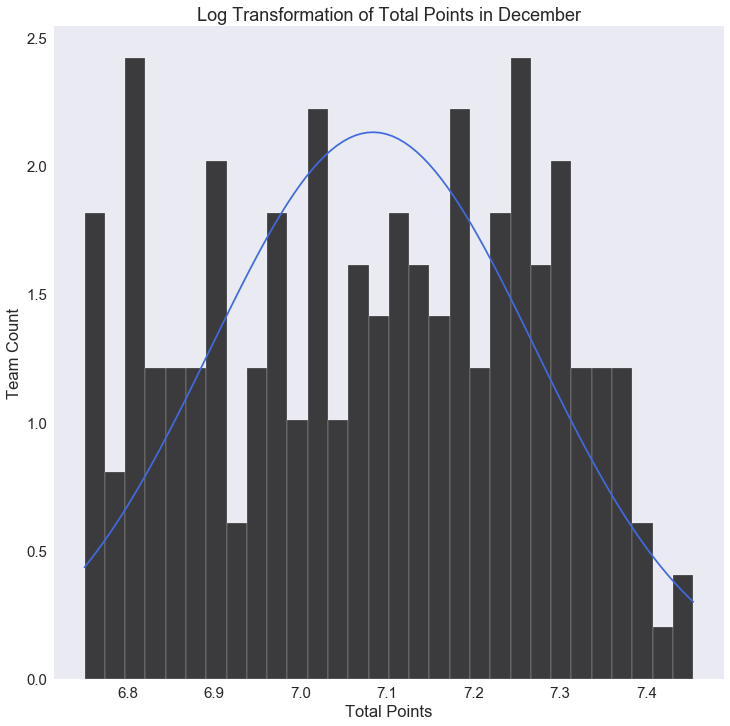

In [58]:
logdata_dec = np.log(fifa_2018_clean['Total_Points_Dec'])
estimated_mu, estimated_sigma = stats.norm.fit(logdata_dec)

plt.figure(figsize=(12,12))
plt.hist(logdata_dec, bins=30, density =True, color='black', alpha=0.75, edgecolor='white')
xmin_dec = logdata_dec.min()
xmax_dec = logdata_dec.max()
x_dec = np.linspace(xmin_dec, xmax_dec, 100)
pdf_dec = stats.norm.pdf(x_dec, loc=estimated_mu, scale=estimated_sigma)
plt.plot(x_dec, pdf_dec, color='royalblue')

plt.title('Log Transformation of Total Points in December')
plt.xlabel('Total Points')
plt.ylabel('Team Count')
plt.show()

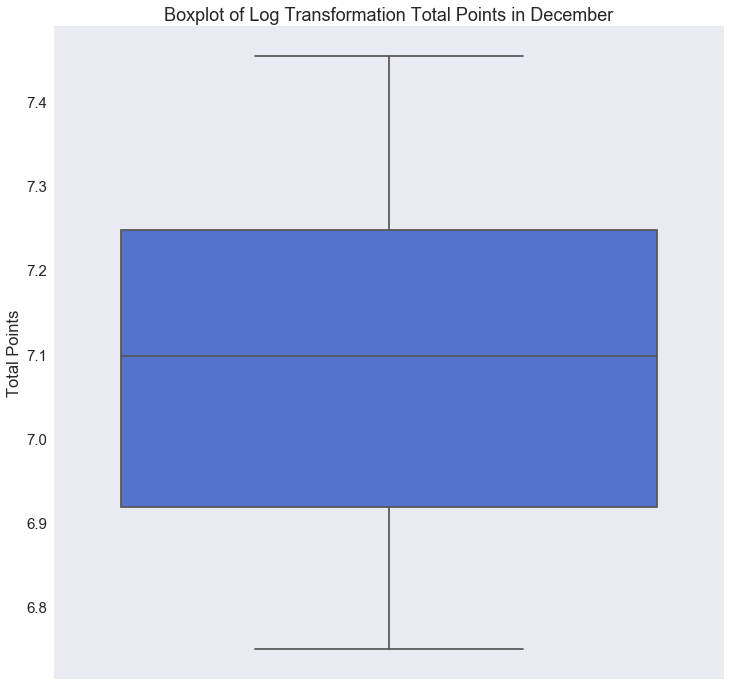

In [59]:
#boxplot of log transformation of total points dec
plt.figure(figsize=(12,12))
sns.boxplot( y=logdata_dec, color='royalblue')

plt.title('Boxplot of Log Transformation Total Points in December', fontsize=18)
plt.ylabel('Total Points')
plt.show();

The log transformation of the total points dec variable is bit more normal shaped, but still overwhelmingly multimodal with several high points.  One notable observation; although, we have serveral high peaks you can almost make out two distributions.  The log tranformation does show the distribution to much more normal with no outliers.

#### Total Points Distribution in January

In [60]:
#view the descriptive statistics of Total Points Jan variable
print('Descripitive Statistics of Total Points in January Variable','\n')
print(fifa_2018_clean.Total_Points_Jan.describe(),'\n')
print('The value that appears the most in the Distribution','\n')
print('mode', fifa_2018_clean.Total_Points_Jan.mode()[0])

Descripitive Statistics of Total Points in January Variable 

count     211.000000
mean      414.563981
std       348.065250
min         0.000000
25%       125.500000
50%       311.000000
75%       633.000000
max      1602.000000
Name: Total_Points_Jan, dtype: float64 

The value that appears the most in the Distribution 

mode 0


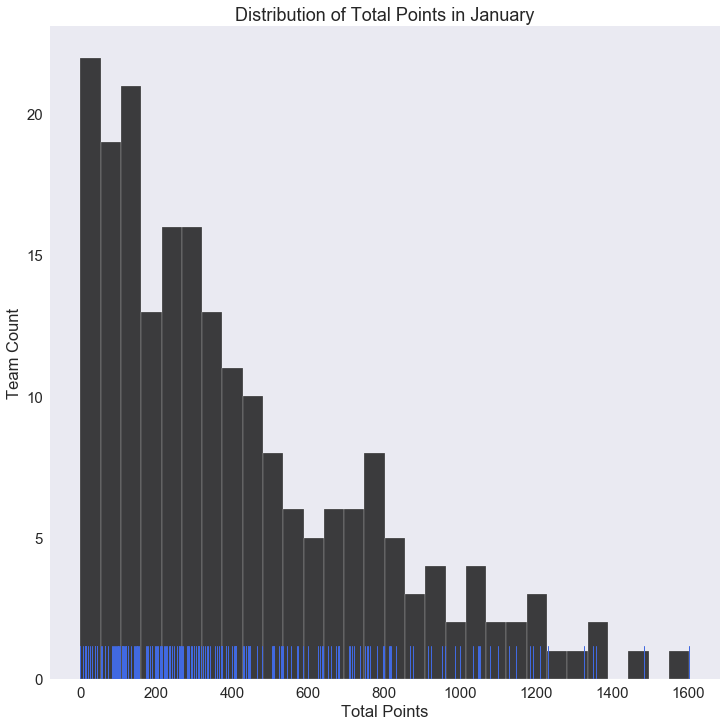

In [61]:
#histogram of total points Jan variable
plt.figure(figsize=(12,12))
plt.hist(fifa_2018_clean.Total_Points_Jan, alpha=.75, bins=30, color='black', edgecolor='white')
sns.rugplot(fifa_2018_clean.Total_Points_Jan, color='royalblue')

plt.title('Distribution of Total Points in January')
plt.xlabel('Total Points')
plt.ylabel('Team Count')
plt.show();

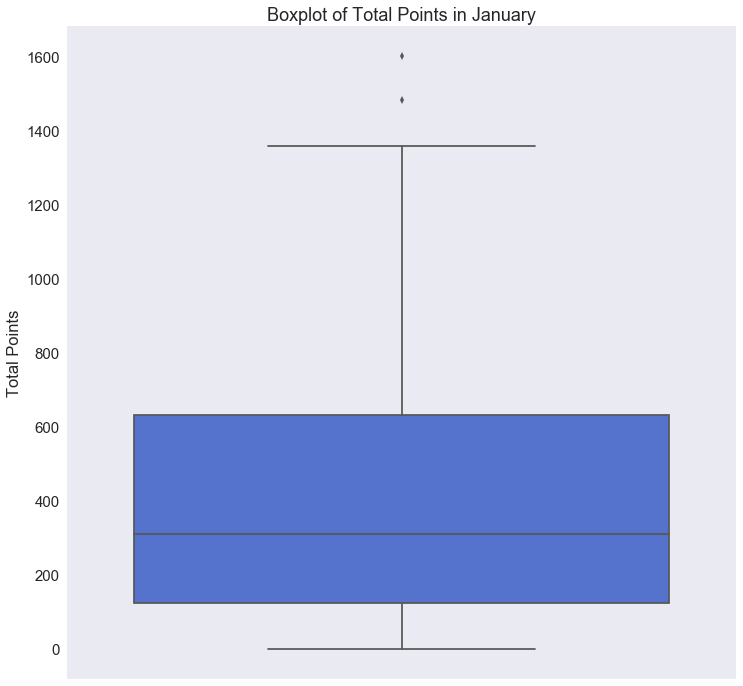

In [62]:
#boxplot of total points Jan variable
plt.figure(figsize=(12,12))
sns.boxplot( y=fifa_2018_clean["Total_Points_Jan"], color='royalblue')

plt.title('Boxplot of Total Points in January', fontsize=18)
plt.ylabel('Total Points')
plt.show();

Total Points Jan variable has right skewed positive distribution.  The mean of the distribution is 414 and the median is 311.  The value that appears the most is 0 and this is the min value.  The bulk of the distribution is from 0 to 800 points with the large values giving it tail to the right; most notably the outliers from 1400 to 1600 which are skewing the distribution.

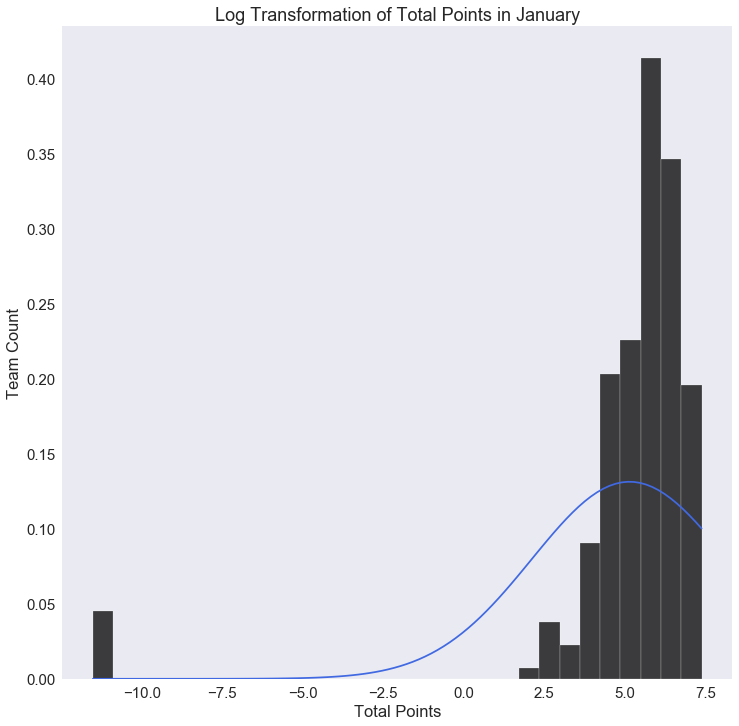

In [63]:
#replace zero values with .000001
fifa_log = fifa_2018_clean['Total_Points_Jan'].replace([0], 0.00001)

#log total points in January variable
logdata_jan = np.log(fifa_log)
estimated_mu, estimated_sigma = stats.norm.fit(logdata_jan)

#plot the log transformation
plt.figure(figsize=(12,12))
plt.hist(logdata_jan, bins=30, density =True, color='black', alpha=0.75, edgecolor='white')
xmin_jan = logdata_jan.min()
xmax_jan = logdata_jan.max()
x_jan = np.linspace(xmin_jan, xmax_jan, 100)
pdf_jan = stats.norm.pdf(x_jan, loc=estimated_mu, scale=estimated_sigma)
plt.plot(x_jan, pdf_jan, color='royalblue')

plt.title('Log Transformation of Total Points in January')
plt.xlabel('Total Points')
plt.ylabel('Team Count')
plt.show();

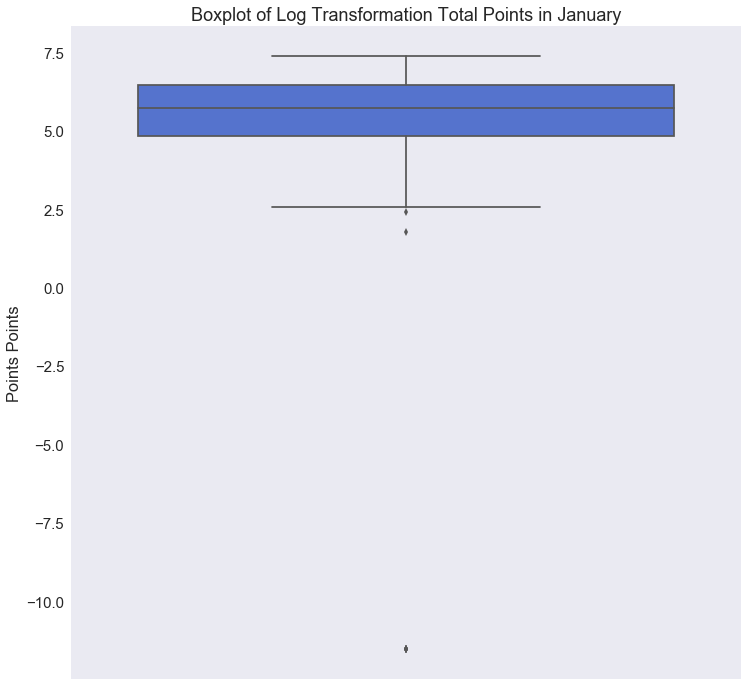

In [64]:
#boxplot of log transformation of total points jan
plt.figure(figsize=(12,12))
sns.boxplot( y=logdata_jan, color='royalblue')

plt.title('Boxplot of Log Transformation Total Points in January', fontsize=18)
plt.ylabel('Points Points')
plt.show();

Log transformation of total points jan variable gives transforms the distribution to a more normal distribution, but it is affected by outliers and giving it a negative skew a bit.  The transformation would look normal if the outliers were removed.  If you look at the box plot of the log transformation, you can really see the outliers skewing the distribution.

In [65]:
#view the descriptive statistics of Total Points (%) change variable
print('Descripitive Statistics of Total Points (%) Change Variable','\n')
print(fifa_2018_clean.Total_Points_PerChg.describe(),'\n')
print('The value that appears the most in the Distribution','\n')
print('mode', fifa_2018_clean.Total_Points_PerChg.mode()[0])

Descripitive Statistics of Total Points (%) Change Variable 

count    211.000000
mean      69.581137
std       21.345532
min       -2.820000
25%       55.430000
50%       73.930000
75%       87.145000
max      100.000000
Name: Total_Points_PerChg, dtype: float64 

The value that appears the most in the Distribution 

mode 100.0


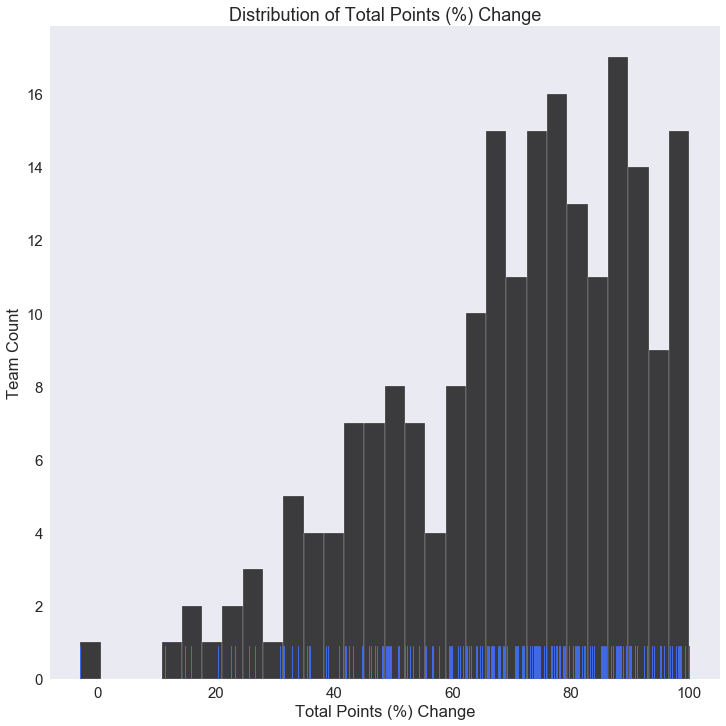

In [66]:
#histogram of total points (%) change variable
plt.figure(figsize=(12,12))
plt.hist(fifa_2018_clean.Total_Points_PerChg, alpha=.75, bins=30, color='black', edgecolor='white')
sns.rugplot(fifa_2018_clean.Total_Points_PerChg, color='royalblue')

plt.title('Distribution of Total Points (%) Change')
plt.xlabel('Total Points (%) Change')
plt.ylabel('Team Count')
plt.show();

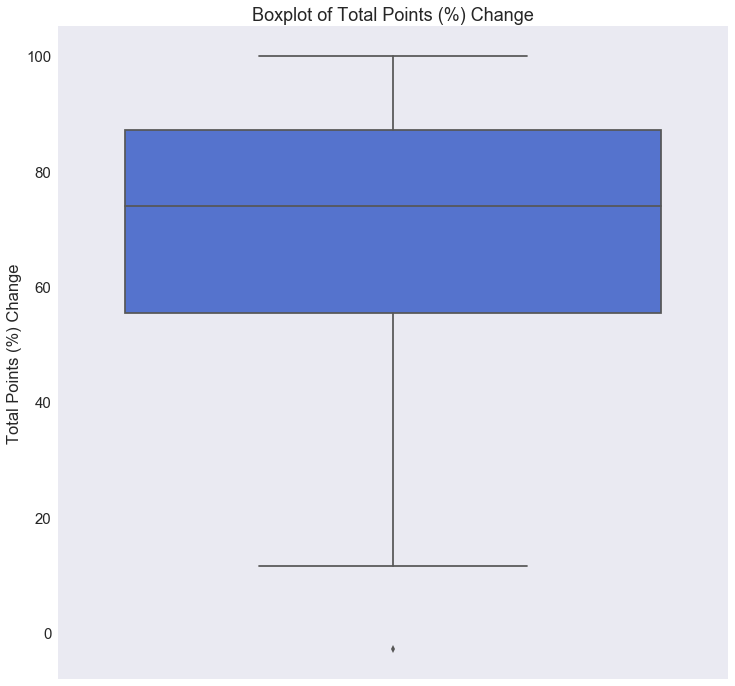

In [67]:
#boxplot of total points (%) change variable
plt.figure(figsize=(12,12))
sns.boxplot( y=fifa_2018_clean["Total_Points_PerChg"], color='royalblue')

plt.title('Boxplot of Total Points (%) Change', fontsize=18)
plt.ylabel('Total Points (%) Change')
plt.show()

Total points percentage change variable is left negatively skewed distribution.  100% change is the most common value and the max.  Prior year, many ranked teams ended the year with very low or zero points which translated to the beginning of this year. The mean is 69.58 and median 73.93. The long tail and skewed is affected by outliers.

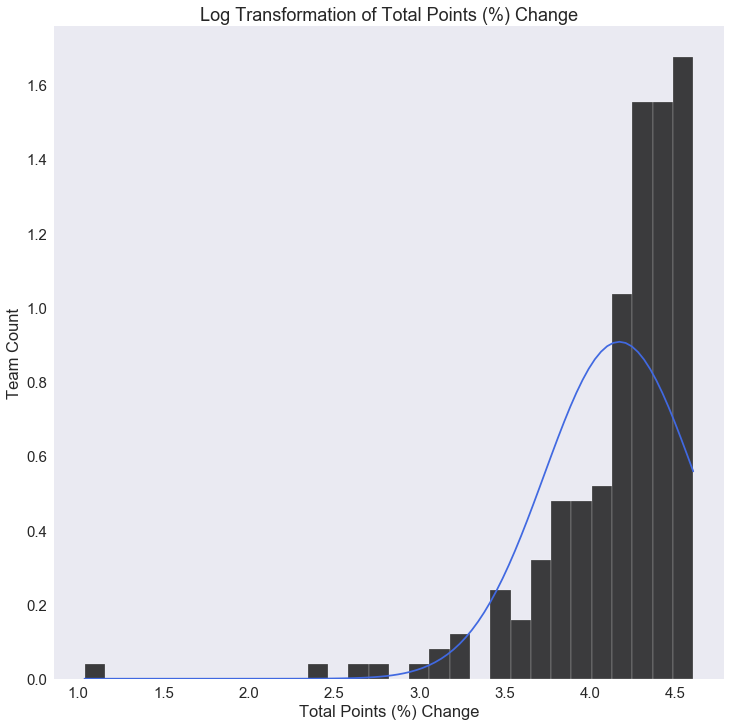

In [68]:
#log total points (%) change variable
fifa_log2 = fifa_2018_clean['Total_Points_PerChg'].abs()
logdata_perchg = np.log(fifa_log2)
estimated_mu, estimated_sigma = stats.norm.fit(logdata_perchg)

#plot log transformation
plt.figure(figsize=(12,12))
plt.hist(logdata_perchg, bins=30, density =True, color='black', alpha=0.75, edgecolor='white')
xmin_perchg = logdata_perchg.min()
xmax_perchg = logdata_perchg.max()
x_perchg = np.linspace(xmin_perchg, xmax_perchg, 100)
pdf_perchg = stats.norm.pdf(x_perchg, loc=estimated_mu, scale=estimated_sigma)
plt.plot(x_perchg, pdf_perchg, color='royalblue')

plt.title('Log Transformation of Total Points (%) Change')
plt.xlabel('Total Points (%) Change')
plt.ylabel('Team Count')
plt.show()

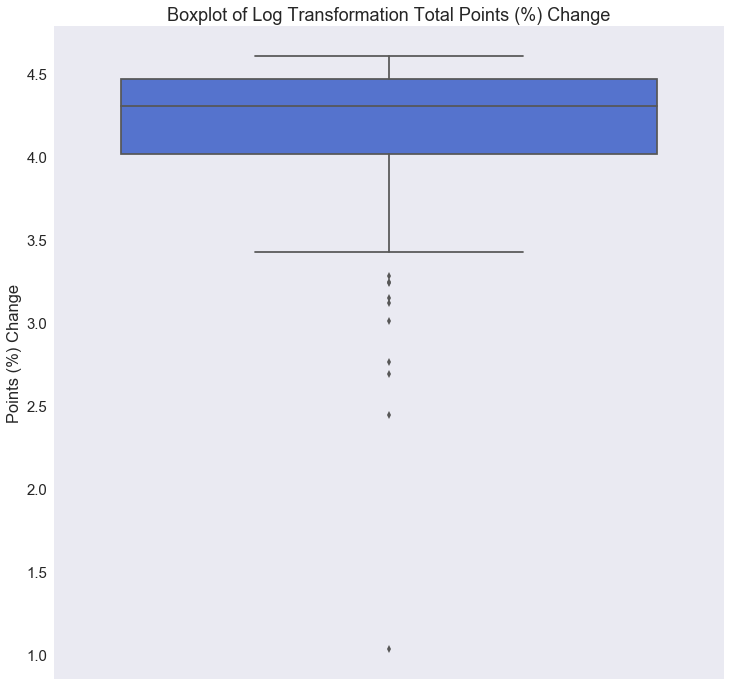

In [69]:
#boxplot of log transformation of total points (%) change
plt.figure(figsize=(12,12))
sns.boxplot( y=logdata_perchg, color='royalblue')

plt.title('Boxplot of Log Transformation Total Points (%) Change', fontsize=18)
plt.ylabel('Points (%) Change')
plt.show();

Log transformation total points (%) change is still showing as left skewed due to outliers ranging from values just below zero up to 20.  If these were removed this would probably give our transformation a normal distribution.  Looking at the box plot your can really see the outliers affecting the distribution.

In [70]:
#view the descriptive statistics of rank change variable
print('Descripitive Statistics of Rank Change Variable','\n')
print(fifa_2018_clean.Rank_Chg.describe(),'\n')
print('The value that appears the most in the Distribution','\n')
print('mode', fifa_2018_clean.Rank_Chg.mode()[0])

Descripitive Statistics of Rank Change Variable 

count    211.000000
mean      -0.085308
std       10.043824
min      -37.000000
25%       -6.000000
50%        0.000000
75%        6.000000
max       47.000000
Name: Rank_Chg, dtype: float64 

The value that appears the most in the Distribution 

mode -1


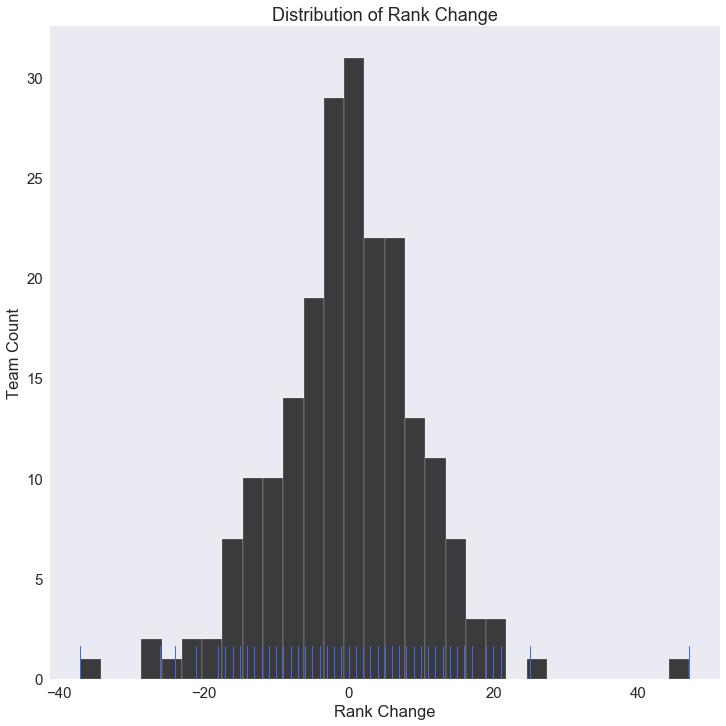

In [71]:
#histogram of rank change
plt.figure(figsize=(12,12))
plt.hist(fifa_2018_clean.Rank_Chg, alpha=.75, bins=30, color='black', edgecolor='white')
sns.rugplot(fifa_2018_clean.Rank_Chg, color='royalblue')

plt.title('Distribution of Rank Change')
plt.xlabel('Rank Change')
plt.ylabel('Team Count')
plt.show;

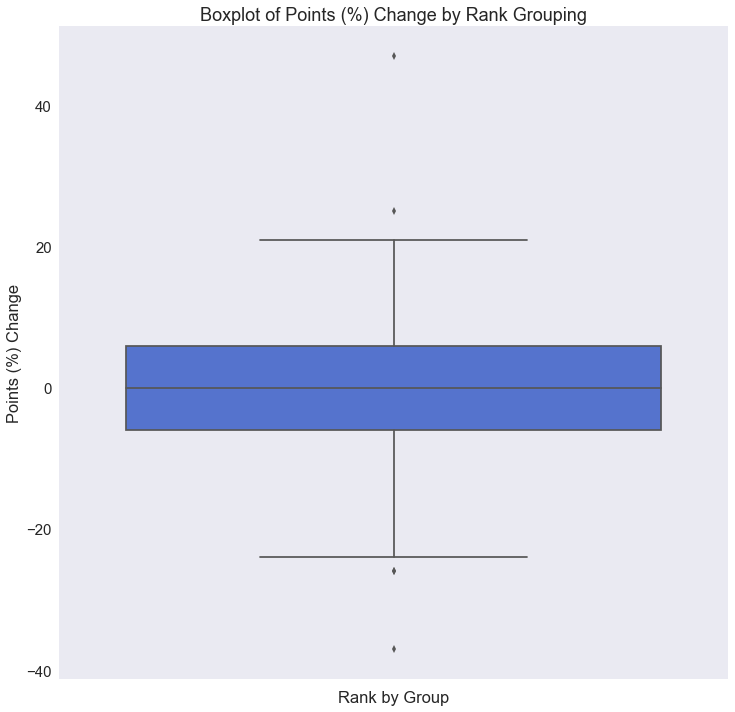

In [72]:
#boxplot of points (%) change by rank group
plt.figure(figsize=(12,12))
sns.boxplot( y=fifa_2018_clean["Rank_Chg"], color='royalblue')

plt.title('Boxplot of Points (%) Change by Rank Grouping', fontsize=18)
plt.xlabel('Rank by Group')
plt.ylabel('Points (%) Change')
plt.show()

The rank change variable has a normal distribution; with some outliers, but the histogram may have not been the best choice considering rank is categorical variable.  I thought histogram showed the ranking movements better.  The majority of the distribution lies between -20 and 20; most teams not moving position, showing their rank change at zero and the value appearing most is -1.  The box plot shows the same information, but the outliers are more prevalent.

## Relationship between variables

In [73]:
#subset to only include quantitative variables
Sub_Corr = fifa_2018_clean.loc[:, ['Total_Points_Dec', 'Total_Points_Jan', 'Total_Points_PerChg', 'Rank_Chg']]

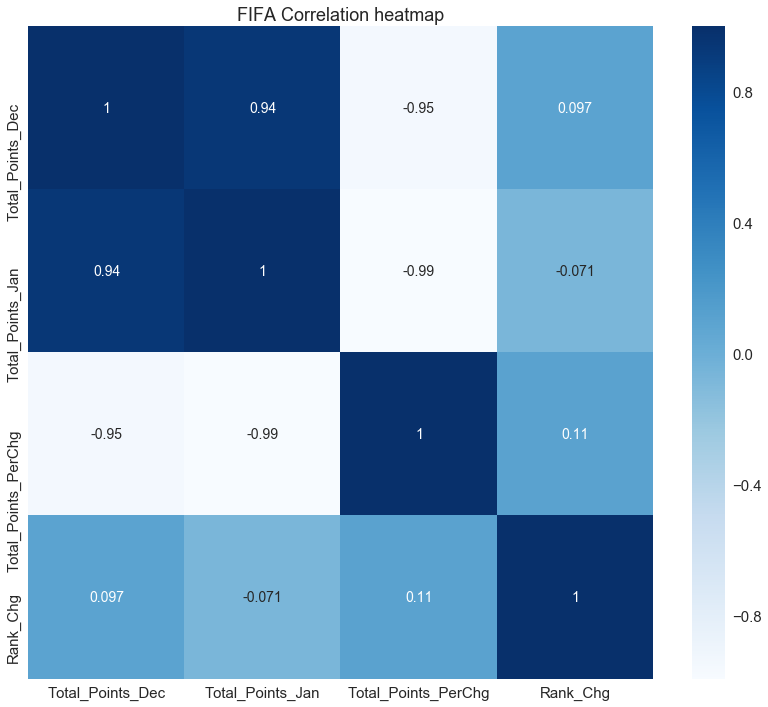

In [74]:
# correlation heatmap
corr = Sub_Corr.corr()
plt.figure(figsize=(14,12))
plt.title('FIFA Correlation heatmap')
plt.rcParams['font.size'] = 14
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           annot = True,
           cmap='Blues');

Total Points Dec and Total Points Jan variables have a very strong positive correlation of .94.  Total Points Percentage Change shows a strong negative correlation with Total Points Dec of -.95 and Total Points Jan of -.99.  The most surprising is the Total Points Percentage Chanage variable has a very weak positive correlation with rank change.  My suspicion of a stronger correlation between these two variables is incorrect.  Rank change seems to have almost no correlation with the total point variables.

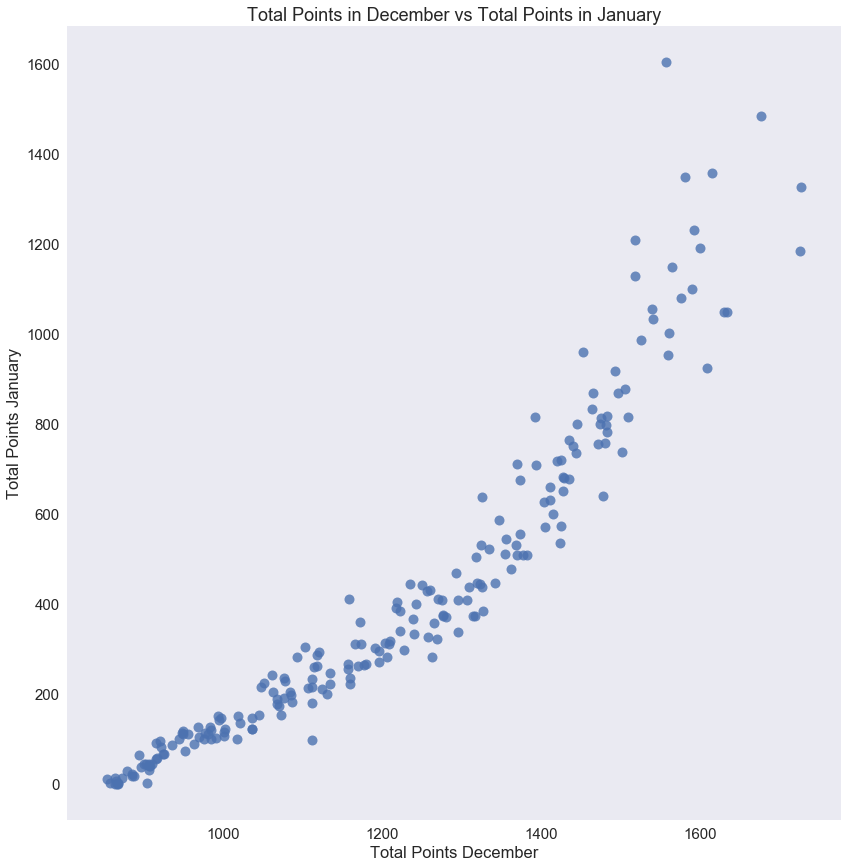

In [75]:
#scatterplot Total Points December vs Total Points January color coded by points change class | rank change class
sns.lmplot(x ='Total_Points_Dec', y ='Total_Points_Jan', data=fifa_2018_clean, x_jitter = True, y_jitter = True,
           scatter_kws={"s": 100}, size=12, fit_reg=False)

plt.title('Total Points in December vs Total Points in January')
plt.xlabel('Total Points December')
plt.ylabel('Total Points January')
plt.show();

The total points variables have a strong positive correlation of .94 and the scatter plot relects that relationship.  As total points increase in Jan; they will and Dec and vice versa.

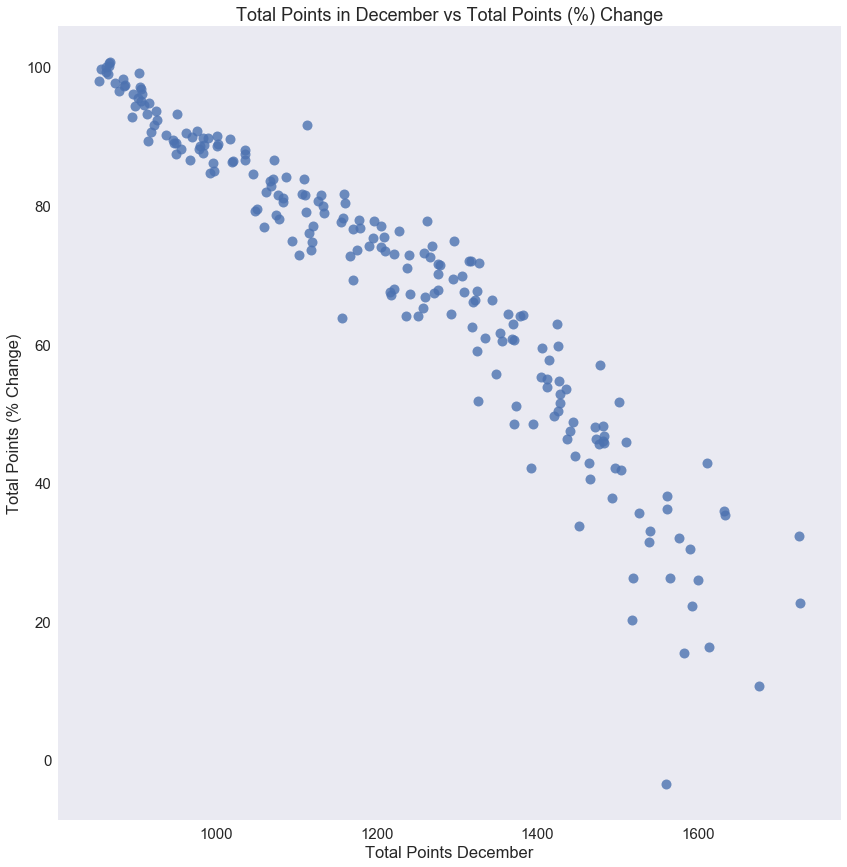

In [76]:
#scatterplot Total Points December vs Total Points January color coded by points change class | rank change class
sns.lmplot(x ='Total_Points_Dec', y ='Total_Points_PerChg', data=fifa_2018_clean, x_jitter = True, y_jitter = True,
           scatter_kws={"s": 100}, size=12, fit_reg=False)

plt.title('Total Points in December vs Total Points (%) Change')
plt.xlabel('Total Points December')
plt.ylabel('Total Points (% Change)')
plt.show();

Total points dec and total points percentage change have a strong negative correlation of -0.95.  The scatter plot reflects this relationship.  As total points increases the total points percentage decreases.

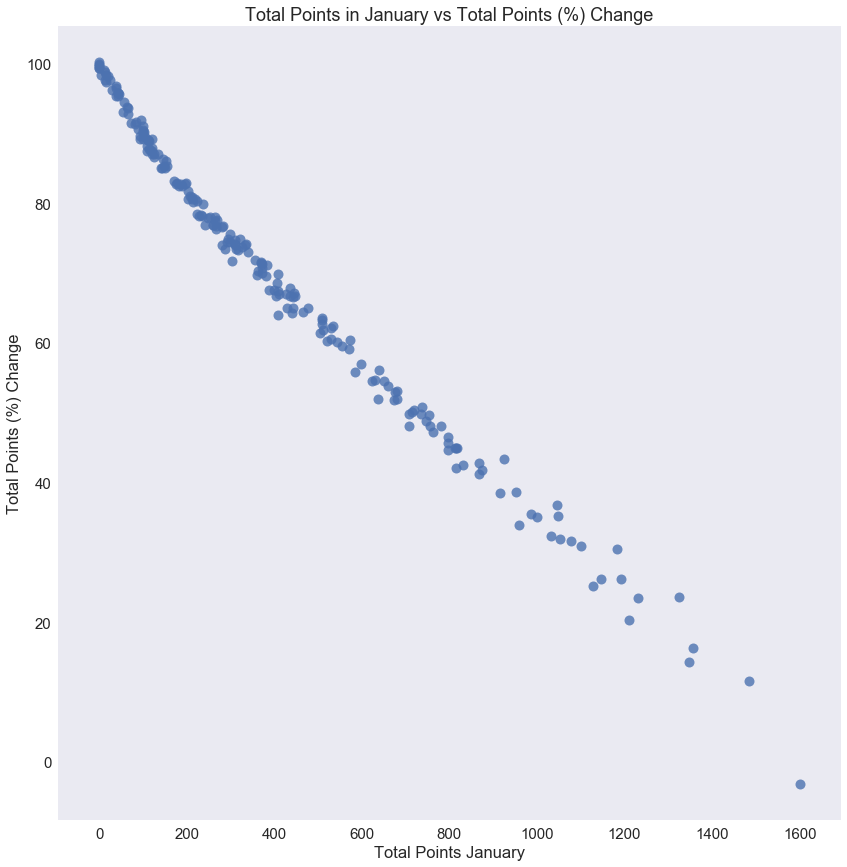

In [77]:
#scatterplot Total Points December vs Total Points January color coded by points change class | rank change class
sns.lmplot(x ='Total_Points_Jan', y ='Total_Points_PerChg', data=fifa_2018_clean, x_jitter = True, y_jitter = True,
           scatter_kws={"s": 100}, size=12, fit_reg=False)

plt.title('Total Points in January vs Total Points (%) Change')
plt.xlabel('Total Points January')
plt.ylabel('Total Points (%) Change')
plt.show();

Total points jan and total points percentage change have a strong negative correlation of -0.99.  The scatter plot reflects this relationship.  As total points increases the total points percentage decreases.

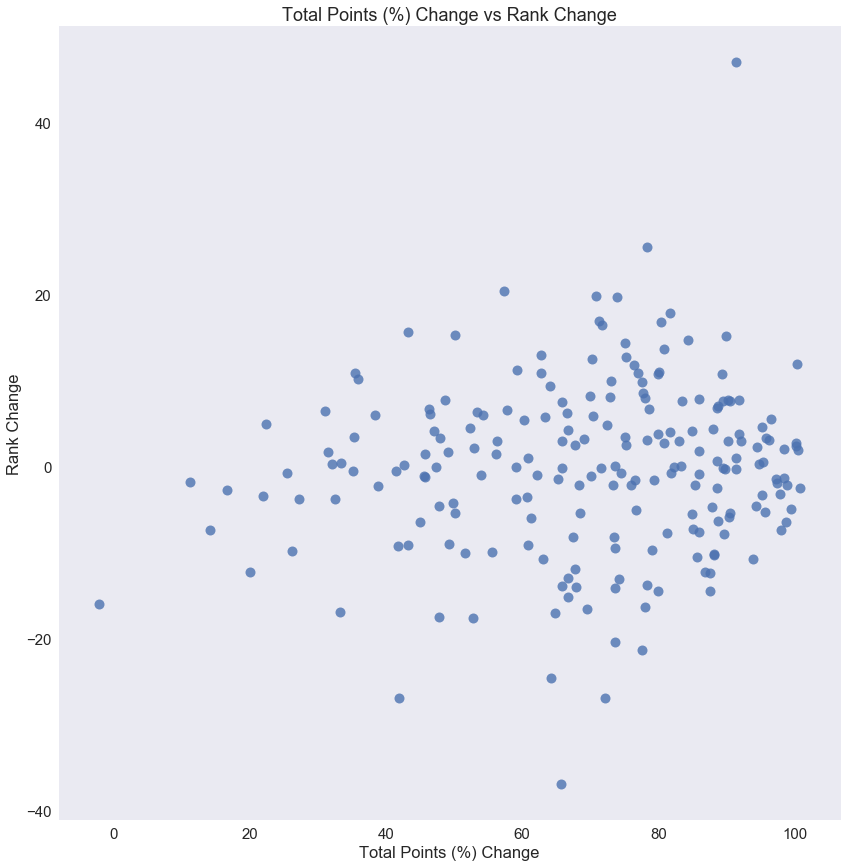

In [78]:
#scatterplot Total Points December vs Total Points January color coded by points change class | rank change class
sns.lmplot(x ='Total_Points_PerChg', y ='Rank_Chg', data=fifa_2018_clean, x_jitter = True, y_jitter = True,
           scatter_kws={"s": 100}, size=12, fit_reg=False)

plt.title('Total Points (%) Change vs Rank Change')
plt.xlabel('Total Points (%) Change')
plt.ylabel('Rank Change')
plt.show();

Rank change and total points percentage change have a very weak positive correlation of 0.11.  The scatter plot reflects this relationship.  As total points percentage change increases rank change does improve slightly, but the difference isn't noticeable.

### Ranking Movement and Performances

#### End of Year Top Ranked Teams

In [79]:
#teams with the highest point total end of the year
fifa_2018_clean.groupby(['Rank', 'Team'])['Total_Points_Dec'].sum().sort_values(ascending = False)[0:10]

Rank  Team       
1     Belgium        1727
2     France         1726
3     Brazil         1676
4     Croatia        1634
5     England        1631
6     Portugal       1614
7     Uruguay        1609
8     Switzerland    1599
9     Spain          1591
10    Denmark        1589
Name: Total_Points_Dec, dtype: int64

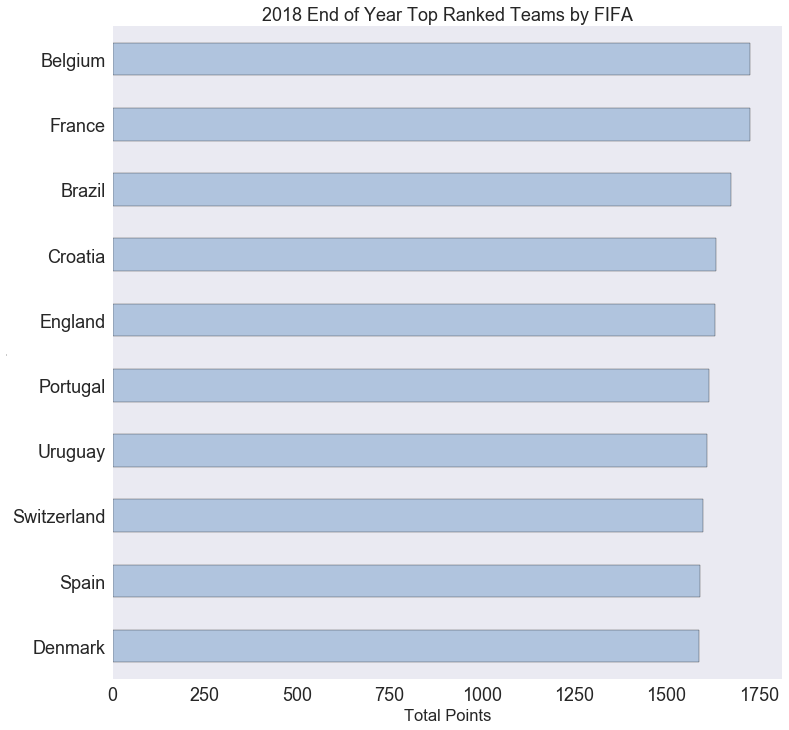

In [80]:
#teams with the highest point totals end of the year sorted highest to lowest
Top_Rank = fifa_2018_clean.groupby(['Team'])['Total_Points_Dec'].sum().sort_values(ascending = False)[0:10]
Top_10 = Top_Rank.sort_values(ascending = True)

#barchart of highest ranked teams at the end of the year
Top_10.plot(kind = 'barh', fontsize = 18, color = 'lightsteelblue', edgecolor='black', figsize=(12,12))
plt.title('2018 End of Year Top Ranked Teams by FIFA')
plt.xlabel('Total Points')
plt.ylabel('Team', fontsize = 0)
plt.show();

The bar chart of the top 10 ranked teams by FIFA shows teams from Europe and South America.  The chart shows ranked teams Belgium 1 and France 2 with point totals in the 1700 point range.  Ranked teams Brazil 3 through Uruguay 7 in the 1600 range.  The rest of top 10 in 1500 range; Switzerland 8 through Denmark 10.  This is a world cup year, so I'm sure the rankings were strongly impacted by their performances in qualifying and performing in the world cup.

#### Beginning of Year Top Ranked Teams

In [81]:
#teams with the highest points at the beginning of the year
fifa_2018_clean.groupby(['Rank', 'Team'])['Total_Points_Jan'].sum().sort_values(ascending = False)[0:10]

Rank  Team       
16    Germany        1602
3     Brazil         1483
6     Portugal       1358
11    Argentina      1348
1     Belgium        1325
9     Spain          1231
20    Poland         1209
8     Switzerland    1190
2     France         1183
13    Chile          1147
Name: Total_Points_Jan, dtype: int64

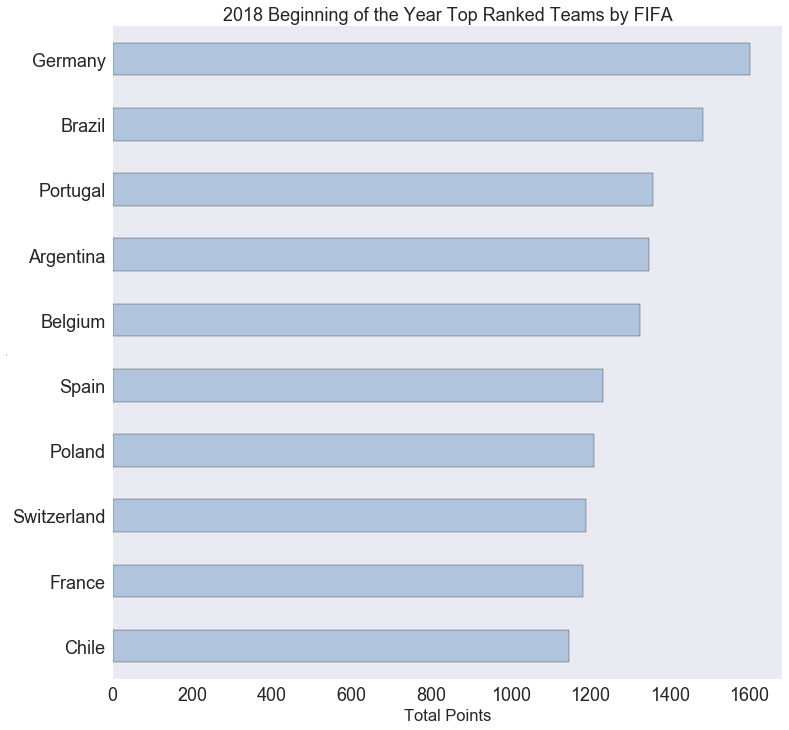

In [82]:
#teams with the most points at the beginning of the year sorted highest to lowest
Top_Rank_beg = fifa_2018_clean.groupby(['Team'])['Total_Points_Jan'].sum().sort_values(ascending = False)[0:10]
Top_10_beg = Top_Rank_beg.sort_values(ascending = True)

#barchart of highest ranked teams beginning of the year
Top_10_beg.plot(kind = 'barh', fontsize = 18, color = 'lightsteelblue', edgecolor='black', figsize=(12,12))
plt.title('2018 Beginning of the Year Top Ranked Teams by FIFA')
plt.xlabel('Total Points')
plt.ylabel('Team', fontsize = 0)
plt.show();

These are the teams ranked highest at the end of 2017 and the beginning of 2018.  A few stayed in the top 10 through the year, but some dropped off due to poor performances in the world cup.

#### Greatest Rank Position Increase

In [83]:
#teams with the highest ranking increase
fifa_2018_clean.groupby(['Rank','Team', ])['Rank_Chg'].sum().sort_values(ascending = False)[0:10]

Rank  Team           
131   Kosovo             47
91    Kyrgyz Republic    25
31    Venezuela          21
70    El Salvador        20
82    Oman               19
76    Belarus            17
125   Angola             17
78    Canada             17
158   Kuwait             16
119   Kazakhstan         16
Name: Rank_Chg, dtype: int64

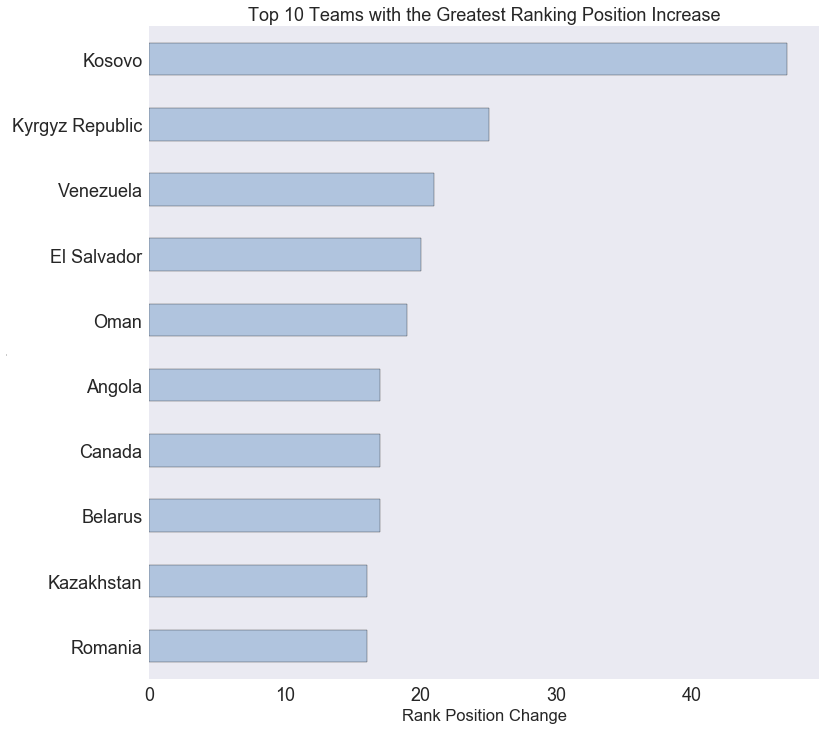

In [84]:
#teams with the highest ranking increase sorted highest to lowest
Best_Move = fifa_2018_clean.groupby(['Team'])['Rank_Chg'].sum().sort_values(ascending = False)[0:10]
Best_10 = Best_Move.sort_values(ascending = True)

#barchart of highest ranking increases
Best_10.plot(kind = 'barh', fontsize = 18, color = 'lightsteelblue', edgecolor='black', figsize=(12,12))
plt.title('Top 10 Teams with the Greatest Ranking Position Increase')
plt.xlabel('Rank Position Change')
plt.ylabel('Team', fontsize = 0)
plt.show();

The bar chart shows Top 10 teams with the greatest ranking position increase.  Kosovo had by far the best improvement in their ranking with and increase of 47 places.  The teams in the chart come from a number of different regions.  Not just one or two is represented, almost all are.

#### Greatest Rank Position Decrease

In [85]:
#teams with the highest rank decreases
fifa_2018_clean.groupby(['Rank','Team', ])['Rank_Chg'].sum().sort_values(ascending = True)[0:10]

Rank  Team               
120   Guinea-Bissau         -37
136   St. Kitts and Nevis   -26
56    Egypt                 -26
99    Palestine             -24
137   Rwanda                -21
149   Guatemala             -21
95    Uzbekistan            -18
71    Panama                -18
37    Iceland               -17
61    Burkina Faso          -17
Name: Rank_Chg, dtype: int64

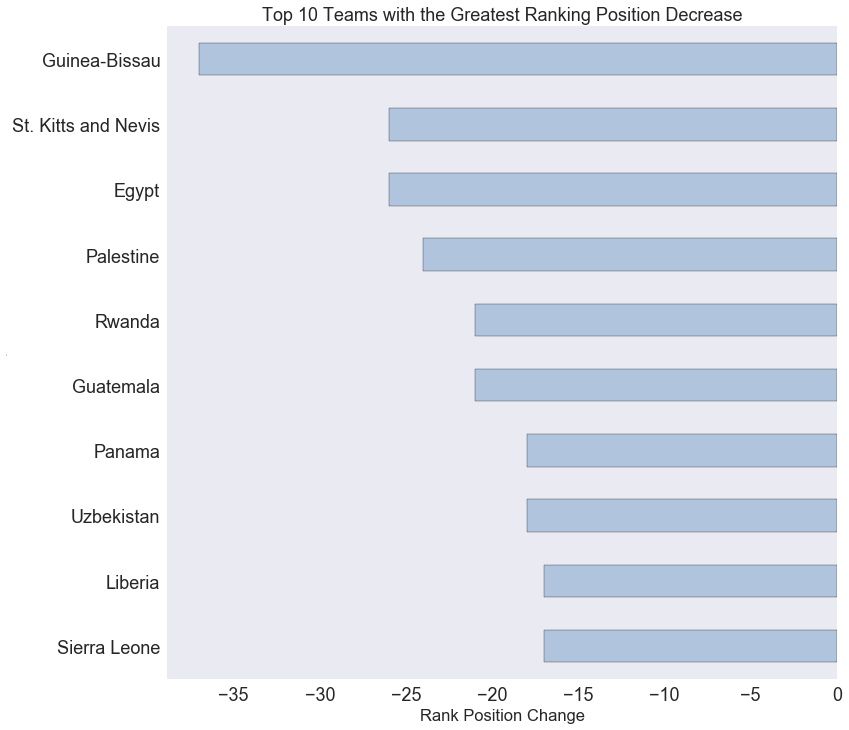

In [86]:
#teams with the highest rank decreases sorted highest to lowest
Best_Move_wrst = fifa_2018_clean.groupby(['Team'])['Rank_Chg'].sum().sort_values(ascending = True)[0:10]
Best_10_wrst = Best_Move_wrst.sort_values(ascending = False)

#barchart of highest rank decreases
Best_10_wrst.plot(kind = 'barh', fontsize = 18, color = 'lightsteelblue', edgecolor='black', figsize=(12,12))
plt.title('Top 10 Teams with the Greatest Ranking Position Decrease')
plt.xlabel('Rank Position Change')
plt.ylabel('Team', fontsize = 0)
plt.show();

This bar chart shows the top 10 teams with greatest ranking position decreases.  The regions represented seem to be Africa, North America, Middle East and Asia.  Guinea-Bissau had the largest ranking decrease at 37 places.

#### Highest Points Percentage Change

In [87]:
#teams with best point percentage increases
fifa_2018_clean.groupby(['Team'])['Total_Points_PerChg'].sum().sort_values(ascending = False)[0:10].apply( lambda x : str(x) + 
                                                                                                          '%')

Team
Somalia                     100.0%
Tonga                       100.0%
Gibraltar                   100.0%
Anguilla                    100.0%
Eritrea                     100.0%
Bahamas                     100.0%
British Virgin Islands      99.31%
San Marino                  98.71%
Cayman Islands              98.51%
Turks and Caicos Islands     98.5%
Name: Total_Points_PerChg, dtype: object

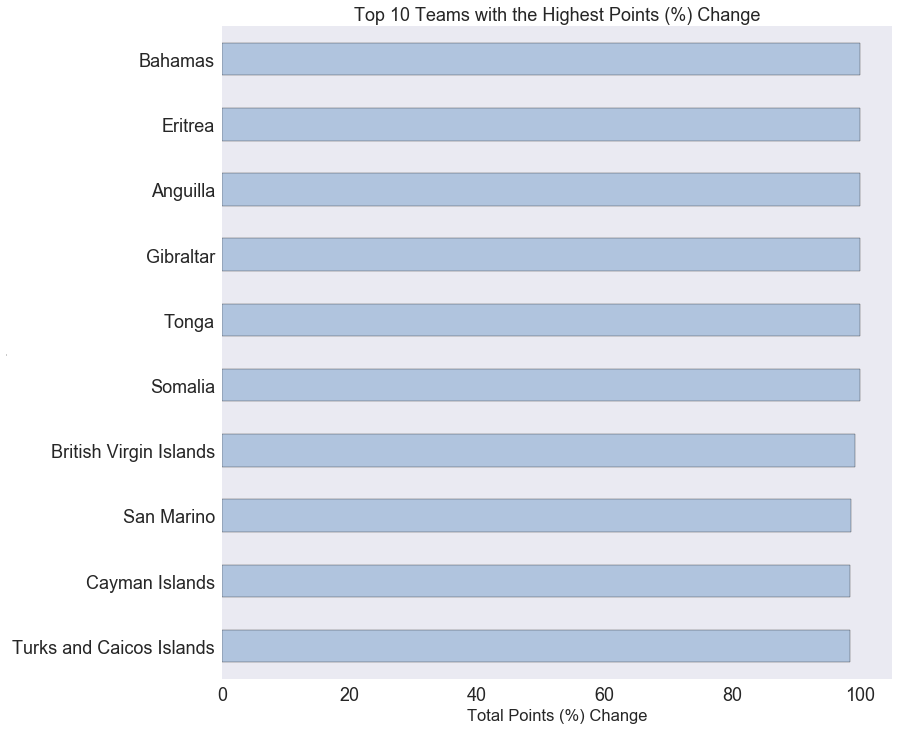

In [88]:
#teams with the highest point percentage increase highest to lowest
Best_Percent = fifa_2018_clean.groupby(['Team'])['Total_Points_PerChg'].sum().sort_values(ascending = False)[0:10]
Percent_10 = Best_Percent.sort_values(ascending = True)

#barchart teams with highest point percentage increase
Percent_10.plot(kind = 'barh', fontsize = 18, color = 'lightsteelblue', edgecolor='black', figsize=(12,12))
plt.title('Top 10 Teams with the Highest Points (%) Change')
plt.xlabel('Total Points (%) Change')
plt.ylabel('Team', fontsize = 0)
plt.show();

Almost all the teams with greatest point percentage change started the year off with zero points or close to it.  Again, most the points they accrued through the year was due world cup qualifying.  One noticeable thing about the teams on this list they're teams that are not very well known, or show up regularly in rankings.

#### Lowest Points Percentage Change

In [89]:
#teams with lowest point percentage increase
fifa_2018_clean.groupby(['Team'])['Total_Points_PerChg'].sum().sort_values(ascending = True)[0:10].apply( lambda x : str(x) + 
                                                                                                         '%')

Team
Germany        -2.82%
Brazil         11.52%
Argentina      14.79%
Portugal       15.86%
Poland         20.36%
Spain          22.63%
Belgium        23.28%
Switzerland    25.58%
Peru           25.69%
Chile          26.71%
Name: Total_Points_PerChg, dtype: object

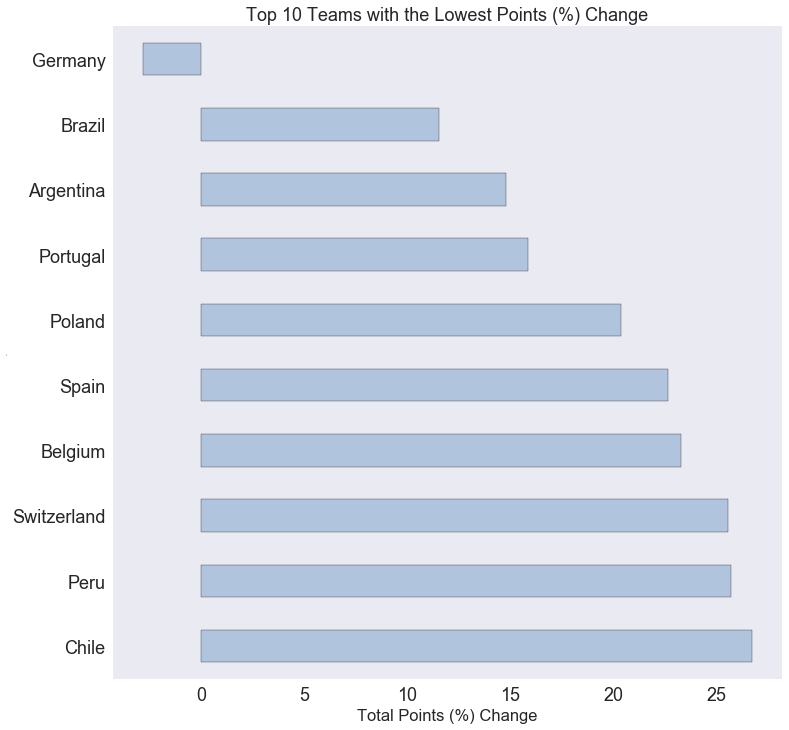

In [90]:
#teams with the lowest point percentage increase sorted lowest to highest
Best_Percent_wrst = fifa_2018_clean.groupby(['Team'])['Total_Points_PerChg'].sum().sort_values(ascending = True)[0:10]
Percent_10_wrst = Best_Percent_wrst.sort_values(ascending = False)

#barchart with lowest point percentage increase
Percent_10_wrst.plot(kind = 'barh', fontsize = 18, color = 'lightsteelblue', edgecolor='black', figsize=(12,12))
plt.title('Top 10 Teams with the Lowest Points (%) Change')
plt.xlabel('Total Points (%) Change')
plt.ylabel('Team', fontsize = 0)
plt.show();

The teams with the lowest point percentage change are teams typically ranked quite high.  Or, had previous successful years and maybe in a slight decline.  One surprise on the list is Germany, but they did have a poor world cup which they didn't make it out of the group stage.

### Analysis by classification

#### Total Points (%) Change | Rank Change 

In [91]:
def count_prop():
    #value counts total points (%) change | rank change classification
    pr_chg_ct = fifa_2018_clean['PtsChgClass_RnkChgClass'].value_counts()

    print('Count of each Total Points (%) Change | Rank Change classification','\n')
    print(pr_chg_ct,'\n')

    #proportions of each classification
    pr_chg_pn = fifa_2018_clean['PtsChgClass_RnkChgClass'].value_counts()/fifa_2018_clean['PtsChgClass_RnkChgClass'].count()*100
    prop_chg = round(pr_chg_pn,2)

    print('Proportions of each Total Points (%) Change | Rank Change classification','\n')
    print(prop_chg.apply( lambda x : str(x) + '%'),'\n')
    
    #points in december of each classification
    dec_perchg_pts = fifa_2018_clean.groupby(['PtsChgClass_RnkChgClass'])['Total_Points_Dec'].mean()
    
    print('Average Total Points in December by Total Points (%) Change | Rank Change classification','\n')
    print(round(dec_perchg_pts,0),'\n')
    
    #points in january of each classification
    jan_perchg_pts = fifa_2018_clean.groupby(['PtsChgClass_RnkChgClass'])['Total_Points_Jan'].mean()
   
    print('Average Total Points in January by Total Points (%) Change | Rank Change classification','\n')
    print(round(jan_perchg_pts,0),'\n')
    
    #points percentage of each classification
    per_chg = fifa_2018_clean.groupby(['PtsChgClass_RnkChgClass'])['Total_Points_PerChg'].mean()
   
    print('Average Total Points Percentage Change by Total Points (%) Change | Rank Change classification','\n')
    print(round(per_chg,2).apply( lambda x : str(x) + '%'),'\n')
    
    #variables to calc rank change value that occurs the most
    dec_dec = fifa_2018_clean.PtsChgClass_RnkChgClass == 'Decrease | Decrease'
    inc_dec = fifa_2018_clean.PtsChgClass_RnkChgClass == 'Increase | Decrease'
    inc_inc = fifa_2018_clean.PtsChgClass_RnkChgClass == 'Increase | Increase'
    inc_no = fifa_2018_clean.PtsChgClass_RnkChgClass == 'Increase | No Change'
    
    #rank change value that appears most of each classification
    pr1 = fifa_2018_clean.Rank_Chg[dec_dec].mode()[0]
    pr2 = fifa_2018_clean.Rank_Chg[inc_dec].mode()[0]
    pr3 = fifa_2018_clean.Rank_Chg[inc_inc].mode()[0]
    pr4 = fifa_2018_clean.Rank_Chg[inc_no].mode()[0]

    #print statements
    print('Rank Change value that occurs most by Total Points (%) Change | Rank Change classification','\n')
    print('Decrease | Decrease:',pr1)
    print('Increase | Decrease:',pr2)
    print('Increase | Increase:','',pr3)
    print('Increase | No Change:',pr4)
    
    return;
count_prop()

Count of each Total Points (%) Change | Rank Change classification 

Increase | Increase     103
Increase | Decrease      96
Increase | No Change     11
Decrease | Decrease       1
Name: PtsChgClass_RnkChgClass, dtype: int64 

Proportions of each Total Points (%) Change | Rank Change classification 

Increase | Increase     48.82%
Increase | Decrease      45.5%
Increase | No Change     5.21%
Decrease | Decrease      0.47%
Name: PtsChgClass_RnkChgClass, dtype: object 

Average Total Points in December by Total Points (%) Change | Rank Change classification 

PtsChgClass_RnkChgClass
Decrease | Decrease     1558.0
Increase | Decrease     1183.0
Increase | Increase     1230.0
Increase | No Change    1291.0
Name: Total_Points_Dec, dtype: float64 

Average Total Points in January by Total Points (%) Change | Rank Change classification 

PtsChgClass_RnkChgClass
Decrease | Decrease     1602.0
Increase | Decrease      415.0
Increase | Increase      389.0
Increase | No Change     550.0
Name: Tot

Variable analysis of Total Points (%) Change | Rank Change classification:
- Most teams showed an increase in total points percentage change
- A little less than half showed a increase in rank change and little less than half showed a decrease in rank change
- The Decrease | Decrease category has the largest total point averages in December and January, while Increase | Increase has the lowest total point totals in December and January
- Almost all categories have total point percentage increase from January to December, basically every team improved their point total, except the Decrease | Decrease category Germany seems to be the only team in this category
- Each class doesn't seem to deviate much from 0, except the decrease | decrease class; the -15 value occurs the most

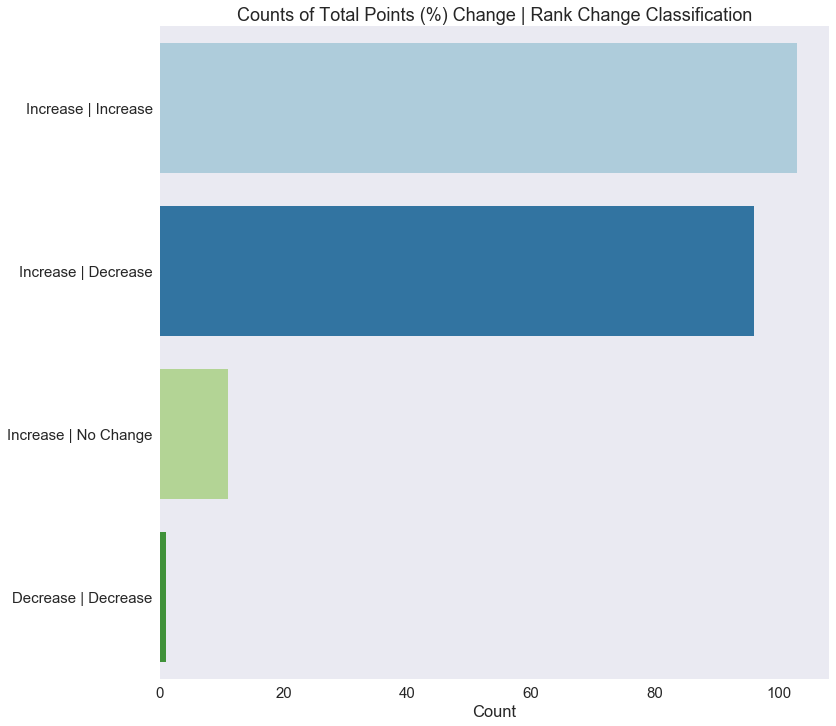

In [92]:
#barchart showing counts Total Points (%) Change | Rank Change Classification
plt.figure(figsize=(12,12))
sns.countplot(y="PtsChgClass_RnkChgClass", data=fifa_2018_clean, palette='Paired')

plt.title('Counts of Total Points (%) Change | Rank Change Classification', fontsize=18)
plt.ylabel('')
plt.xlabel('Count')
plt.show();

Every team increased their point total over the year except one; Germany, but almost half increased their ranking while the other half decrease their ranking over the year.

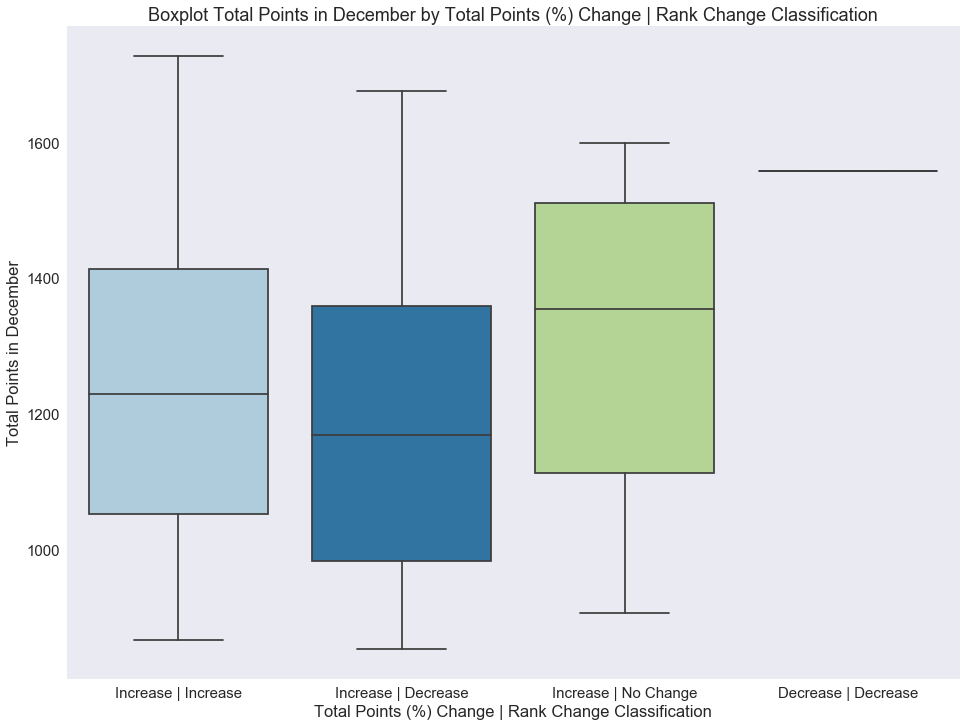

In [93]:
#boxplot of Total points in December by total points (%) change | rank change classification
plt.figure(figsize=(16,12))
sns.boxplot( x=fifa_2018_clean['PtsChgClass_RnkChgClass'], y=fifa_2018_clean['Total_Points_Dec'], palette='Paired')


plt.title('Boxplot Total Points in December by Total Points (%) Change | Rank Change Classification', fontsize=18)
plt.xlabel('Total Points (%) Change | Rank Change Classification')
plt.ylabel('Total Points in December')
plt.show();

Total points in december distributed across Total (%) Points Change | Rank Change Classification:
- increase | increase classification has an average of just over 1200 points.  It has a largest range from about 800 up to 1730
- increase | decrease classification has an average of just under 1200 points.  It also has a large range from 800 up to 1700
- increase | no change classification has an average of almost 1300 and a slightly smaller range 900 to 1600
- decrease | decrease classification has only one team, so smallest range 1, but highest average average points of 1600

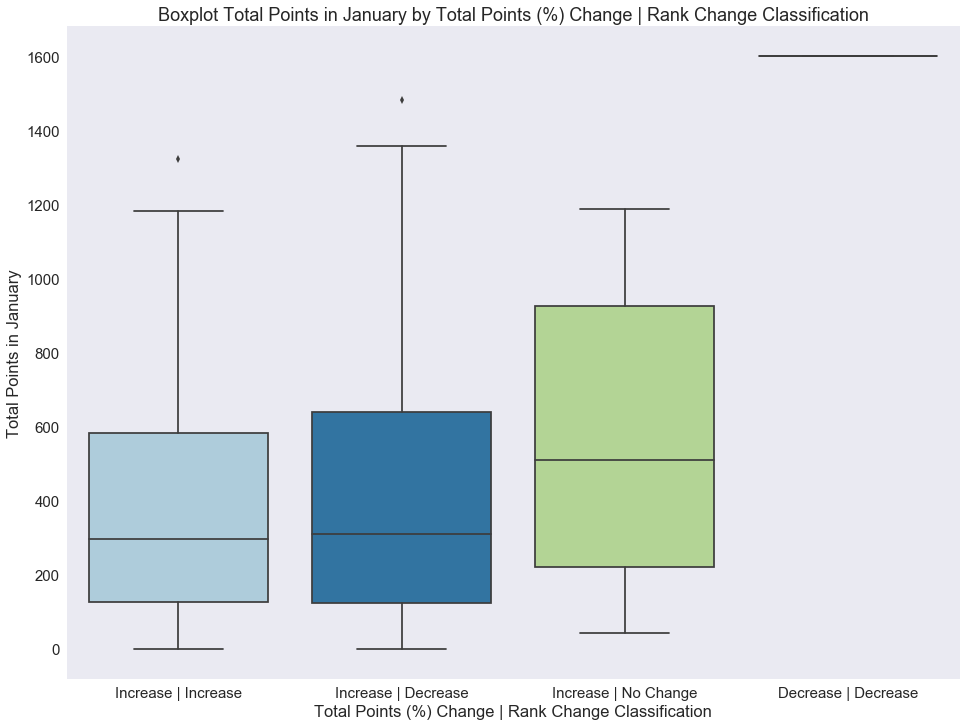

In [94]:
#boxplot of Total points in January by total points (%) change | rank change classification
plt.figure(figsize=(16,12))
sns.boxplot( x=fifa_2018_clean['PtsChgClass_RnkChgClass'], y=fifa_2018_clean['Total_Points_Jan'], palette='Paired')


plt.title('Boxplot Total Points in January by Total Points (%) Change | Rank Change Classification', fontsize=18)
plt.xlabel('Total Points (%) Change | Rank Change Classification')
plt.ylabel('Total Points in January')
plt.show();

Total points in january distributed across Total (%) Points Change | Rank Change Classification:
- increase | increase classification has an average of just over 300 points and a range from 0 to 1200
- increase | decrease classification has an average of just over 300 points and a range from 0 to 1400
- increase | no change classification has an average of over 500 and a ramge just over 0 to 1400
- decrease | decrease classification has only one team, so smallest range 1, but highest average average points of 1600

The total points in December boxplot compared to total points in January boxplot really shows the point improvement across all classifications except the decrease | decrease classification.

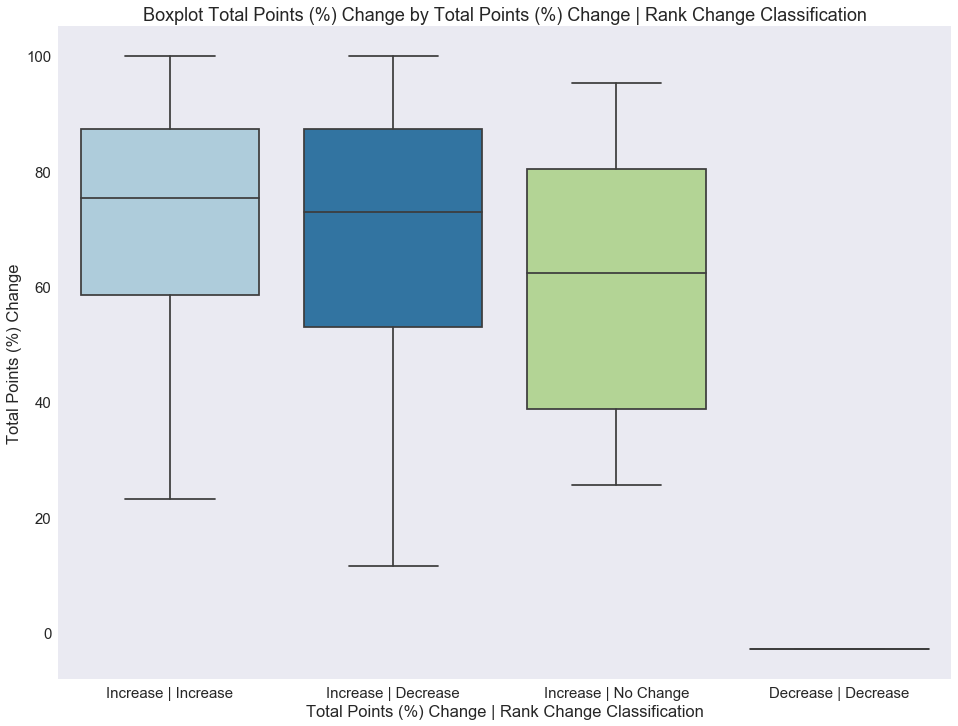

In [95]:
#boxplot of Total points (%) Change by total points (%) change | rank change classification
plt.figure(figsize=(16,12))
sns.boxplot( x=fifa_2018_clean['PtsChgClass_RnkChgClass'], y=fifa_2018_clean['Total_Points_PerChg'], palette='Paired')


plt.title('Boxplot Total Points (%) Change by Total Points (%) Change | Rank Change Classification', fontsize=18)
plt.xlabel('Total Points (%) Change | Rank Change Classification')
plt.ylabel('Total Points (%) Change')
plt.show();

Rank Change by Total Points (%) Change | Rank Change Classifcation:
- The boxplot Total Points (%) change basically shows the point improvement across all classes, except decrease | decrease classification is the only classification with a decrease in points over the year.

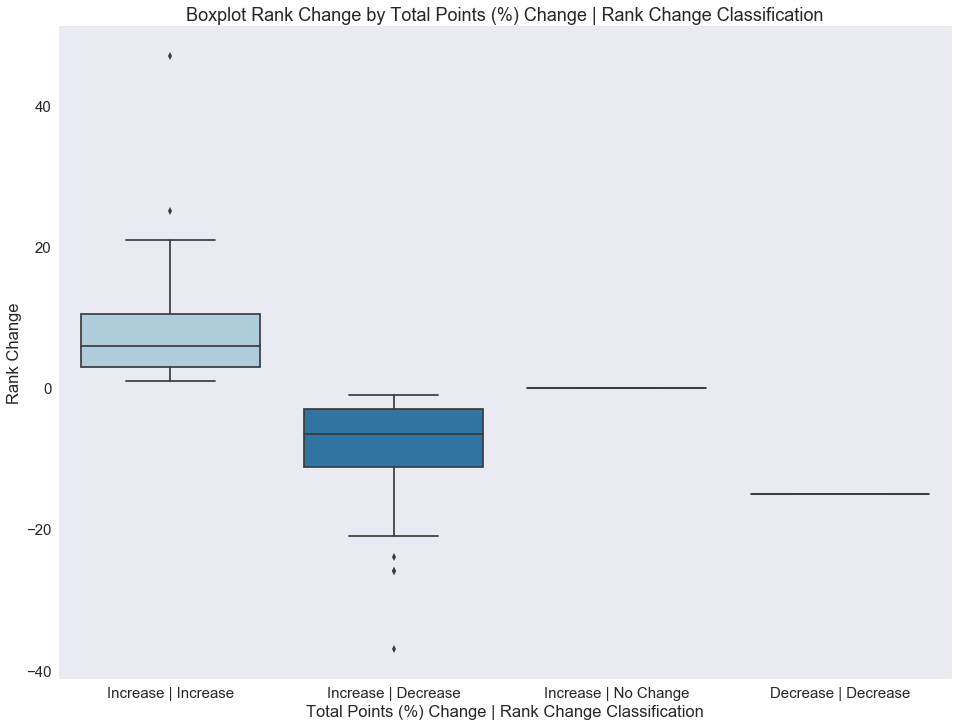

In [96]:
#boxplot of Rank Change by total points (%) change | rank change classification
plt.figure(figsize=(16,12))
sns.boxplot( x=fifa_2018_clean['PtsChgClass_RnkChgClass'], y=fifa_2018_clean['Rank_Chg'], palette='Paired')


plt.title('Boxplot Rank Change by Total Points (%) Change | Rank Change Classification', fontsize=18)
plt.xlabel('Total Points (%) Change | Rank Change Classification')
plt.ylabel('Rank Change')
plt.show();

Rank Change by Total Points (%) Change | Rank Change Classifcation:
- increase | increase classification you can see the group had total point percentage increase as well as rank improvement      - increase | decrease shows a total point percentage increase but a rank decrease.
- increase | No change this distribution is very small, but this group had no rank change at all and a point perentage change average in the previous box plot
- decrease | decrease is very small too, only one team points decreased over the year and it affected their rank dropping almost 20 points
- Seems odd looking at the previous boxplot total point percentage classification because both groups had similar distribution and average; the only difference increase | increase did have a higher point average.

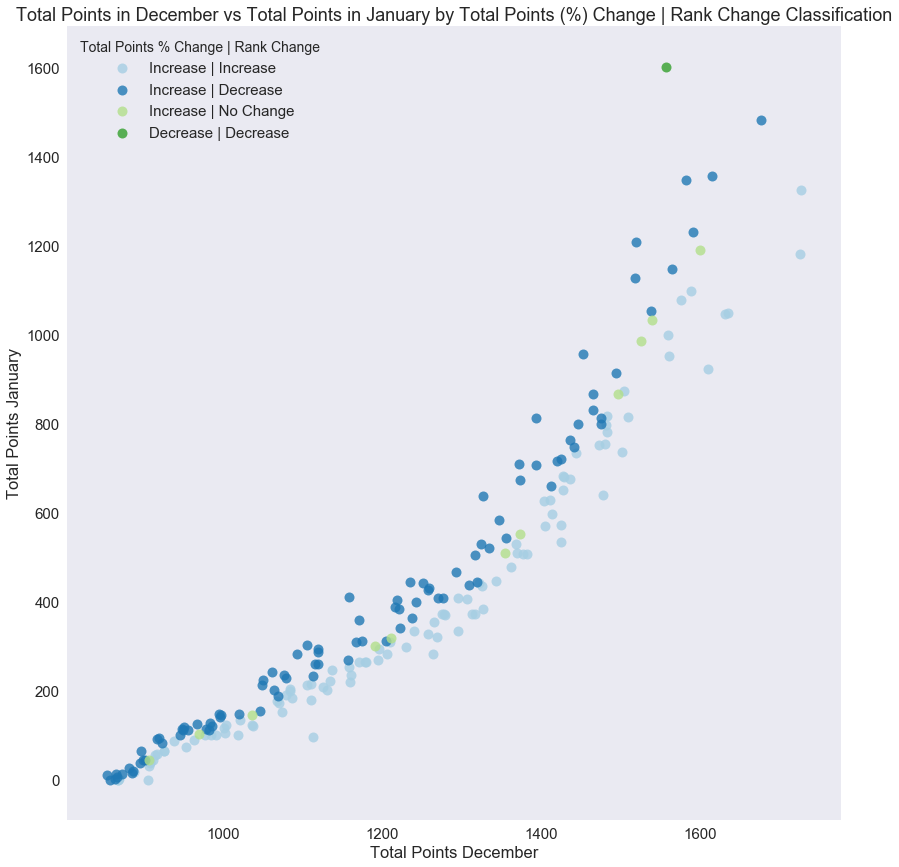

In [97]:
#scatterplot Total Points December vs Total Points January color coded by points change class | rank change class
sns.lmplot(x ='Total_Points_Dec', y ='Total_Points_Jan', data=fifa_2018_clean, x_jitter = True, y_jitter = True, 
           scatter_kws={"s": 100}, legend_out = False, hue='PtsChgClass_RnkChgClass', 
           size=12, fit_reg=False, palette='Paired')

plt.title('Total Points in December vs Total Points in January by Total Points (%) Change | Rank Change Classification')
plt.legend(title='Total Points % Change | Rank Change')
plt.xlabel('Total Points December')
plt.ylabel('Total Points January')
plt.show();

- The two variables have a stong positive correlation
- For most teams, they had a higher point total in December than January 
- the plot is color coded by total points percentage change | rank change and most teams do show and increase points and it's about 50/50 if they had rank increase or decrease.
- A small group shows no rank change at all and one outlier that decreased rank and decrease in total points over the year

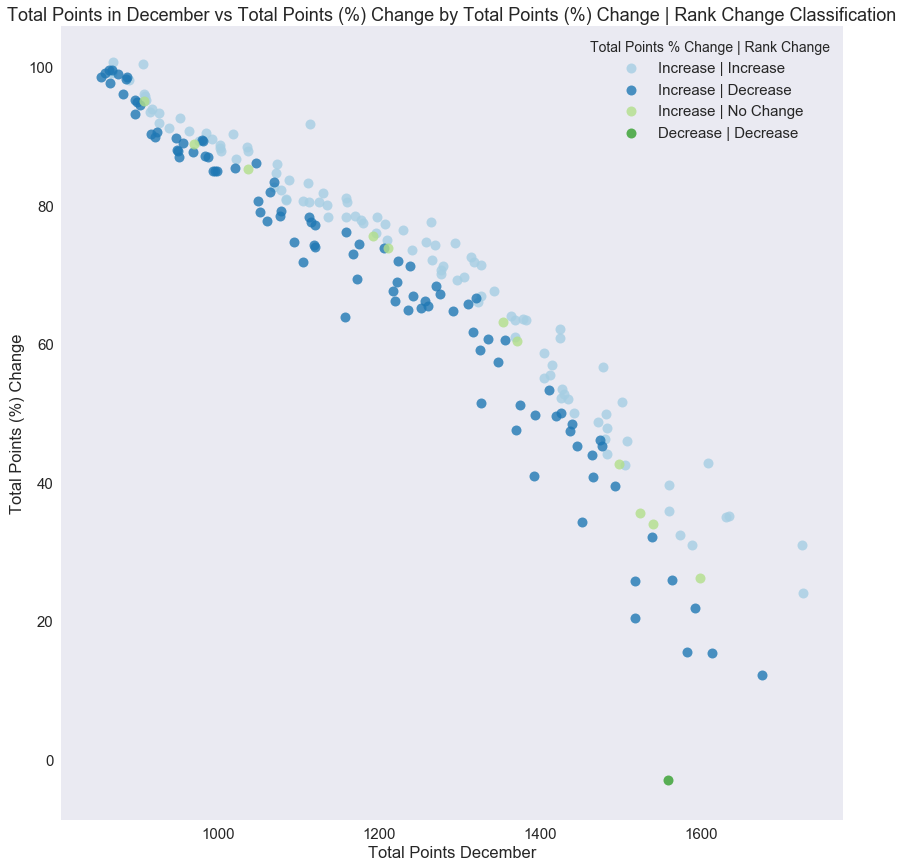

In [98]:
#scatterplot Total Points December vs Total Points Percentage Change coded by points change class | rank change class
sns.lmplot(x ='Total_Points_Dec', y ='Total_Points_PerChg', data=fifa_2018_clean, x_jitter = True, y_jitter = True, 
           scatter_kws={"s": 100}, legend_out = False, hue='PtsChgClass_RnkChgClass', 
           size=12, fit_reg=False, palette='Paired')

plt.title('Total Points in December vs Total Points (%) Change by Total Points (%) Change | Rank Change Classification')
plt.legend(title='Total Points % Change | Rank Change')
plt.xlabel('Total Points December')
plt.ylabel('Total Points (%) Change')
plt.show();

- The two variables have strong negative correlation  
- As total points in december increases the total point percentage change decreases through the year. So, more points accrued through the year less variance in total points (%) change over the year.
- The higher ranked teams at the start of the year have higher point totals from prior years ending
- the plot is color coded by total points percentage change | rank change and most teams do show and increase points and it's about 50/50 if they had rank increase or decrease.
- A small group shows no rank change at all and one outlier that decreased rank and decrease in total points over the year

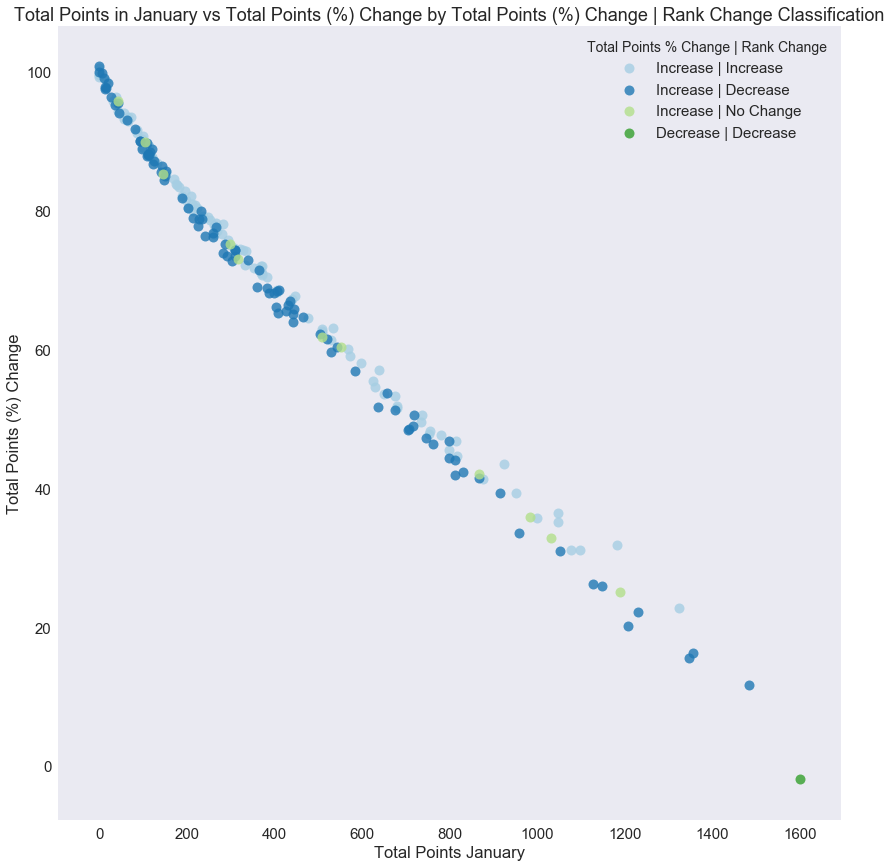

In [99]:
#scatterplot Total Points January vs Total Points Percentage Change coded by points change class | rank change class
sns.lmplot(x ='Total_Points_Jan', y ='Total_Points_PerChg', data=fifa_2018_clean, x_jitter = True, y_jitter = True, 
           scatter_kws={"s": 100}, legend_out = False, hue='PtsChgClass_RnkChgClass', 
           size=12, fit_reg=False, palette='Paired')

plt.title('Total Points in January vs Total Points (%) Change by Total Points (%) Change | Rank Change Classification')
plt.legend(title='Total Points % Change | Rank Change')
plt.xlabel('Total Points January')
plt.ylabel('Total Points (%) Change')
plt.show();

- The two variables have strong negative correlation  
- As total points in january increases the total point percentage change decreases through the year. So, more points accrued through the year less variance in total points (%) change over the year.
- The higher ranked teams at the start of the year have higher point totals from prior years ending
- the plot is color coded by total points percentage change | rank change and most teams do show and increase points and it's about 50/50 if they had rank increase or decrease.
- A small group shows no rank change at all and one outlier that decreased rank and decrease in total points over the year
- the plot is similar the one above ane it should be
- Only issue is comparing your starting point total to the year over change, so the previous plot is better representation of total points and total points (%) percentage over the year

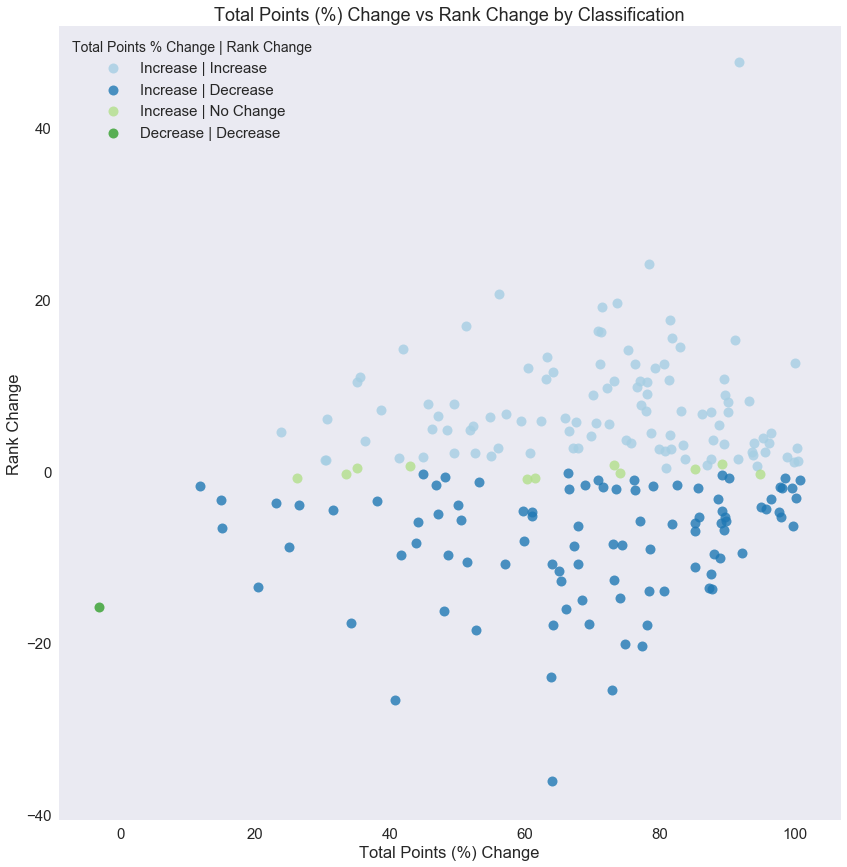

In [100]:
#scatterplot Total Points Percentage Change vs Rank Change color coded by points change class | rank change class
sns.lmplot(x ='Total_Points_PerChg', y ='Rank_Chg', data=fifa_2018_clean, x_jitter = True, y_jitter = True, 
           scatter_kws={"s": 100}, legend_out = False, hue='PtsChgClass_RnkChgClass', 
           size=12, fit_reg=False, palette='Paired')

plt.title('Total Points (%) Change vs Rank Change by Classification')
plt.legend(title='Total Points % Change | Rank Change')
plt.xlabel('Total Points (%) Change')
plt.ylabel('Rank Change')
plt.show();

- The variables have a positive very weak correlation  
- One team is an outlier the rest makeup the bulk of the scatter plot  
- You have a small group showed no rank change stayed around zero even with point increase over the year  
- Another group had point increases over the year to varying degrees, but their rank changes range from -37 to 0 
- Lastly, the other group you can see their point change similar increase over the year, but their rank change ranges from 0 to 47.  

#### Rank Group

In [101]:
def rank_group():
    #value counts rank group; this group is broken down in groups of 30
    rk_grp_ct = fifa_2018_clean['Rank_Group'].value_counts()
    
    print('Counts of each Rank by Group Split into Groups of 30','\n')
    print(rk_grp_ct,'\n')
    
    #points in december of each classification
    dec_rk_grp = fifa_2018_clean.groupby(['Rank_Group'])['Total_Points_Dec'].mean()
    
    print('Average Total Points in December by Rank Group Classification','\n')
    print(round(dec_rk_grp,0),'\n')
    
    #points in january of each classification
    jan_rk_grp = fifa_2018_clean.groupby(['Rank_Group'])['Total_Points_Jan'].mean()
   
    print('Average Total Points in January by Rank Group Classification','\n')
    print(round(jan_rk_grp,0),'\n')
    
    #points percentage of each classification
    rk_grp_perchg = fifa_2018_clean.groupby(['Rank_Group'])['Total_Points_PerChg'].mean()
   
    print('Average Total Points (%) Change by Rank Group Classification','\n')
    print(round(rk_grp_perchg,2).apply( lambda x : str(x) + '%'),'\n')
    
    #variables for Rank Group 
    rnk1_30 = fifa_2018_clean.Rank_Group == 'Rank 1 - 30'
    rnk31_60 = fifa_2018_clean.Rank_Group == 'Rank 31 - 60'
    rnk61_90 = fifa_2018_clean.Rank_Group == 'Rank 61 - 90'
    rnk91_120 = fifa_2018_clean.Rank_Group == 'Rank 91 - 120'
    rnk121_150 = fifa_2018_clean.Rank_Group == 'Rank 121 - 150'
    rnk151_180 = fifa_2018_clean.Rank_Group == 'Rank 151 - 180'
    rnk181_211 = fifa_2018_clean.Rank_Group == 'Rank 181 - 211'
    
    #rank change value that appears most of each classification
    r1 = fifa_2018_clean.Rank_Chg[rnk1_30].mode()[0]
    r2 = fifa_2018_clean.Rank_Chg[rnk31_60].mode()[0]
    r3 = fifa_2018_clean.Rank_Chg[rnk61_90].mode()[0]
    r4 = fifa_2018_clean.Rank_Chg[rnk91_120].mode()[0]
    r5 = fifa_2018_clean.Rank_Chg[rnk121_150].mode()[0]
    r6 = fifa_2018_clean.Rank_Chg[rnk151_180].mode()[0]
    r7 = fifa_2018_clean.Rank_Chg[rnk181_211].mode()[0]

    #print statements
    print('Rank Change value that occurs most by Rank Change Classification','\n')
    print('Rank 1 - 30:','  ',r1)
    print('Rank 31 - 60:',' ',r2)
    print('Rank 61 - 90:',' ',r3)
    print('Rank 91 - 120:','',r4)
    print('Rank 121 - 150:','',r5)
    print('Rank 151 - 180:',r6)
    print('Rank 181 - 211:','',r7)
    
    return;
rank_group()

Counts of each Rank by Group Split into Groups of 30 

Rank 181 - 211    31
Rank 91 - 120     31
Rank 31 - 60      30
Rank 151 - 180    30
Rank 1 - 30       30
Rank 61 - 90      30
Rank 121 - 150    29
Name: Rank_Group, dtype: int64 

Average Total Points in December by Rank Group Classification 

Rank_Group
Rank 1 - 30       1562.0
Rank 121 - 150    1098.0
Rank 151 - 180     991.0
Rank 181 - 211     895.0
Rank 31 - 60      1427.0
Rank 61 - 90      1317.0
Rank 91 - 120     1208.0
Name: Total_Points_Dec, dtype: float64 

Average Total Points in January by Rank Group Classification 

Rank_Group
Rank 1 - 30       1059.0
Rank 121 - 150     219.0
Rank 151 - 180     120.0
Rank 181 - 211      35.0
Rank 31 - 60       693.0
Rank 61 - 90       454.0
Rank 91 - 120      330.0
Name: Total_Points_Jan, dtype: float64 

Average Total Points (%) Change by Rank Group Classification 

Rank_Group
Rank 1 - 30       32.45%
Rank 121 - 150    80.07%
Rank 151 - 180    87.89%
Rank 181 - 211     96.1%
Rank 31 - 

Variable analysis of Rank Group Classification:
- This rank group classifcation split up rankings in groups of 30 roughly
- The groups with better rankings have a higher average total points in December and January
- The as rankings worsened they total point (%) change increased, or the had better total points improvement from the start of the January until the end in December

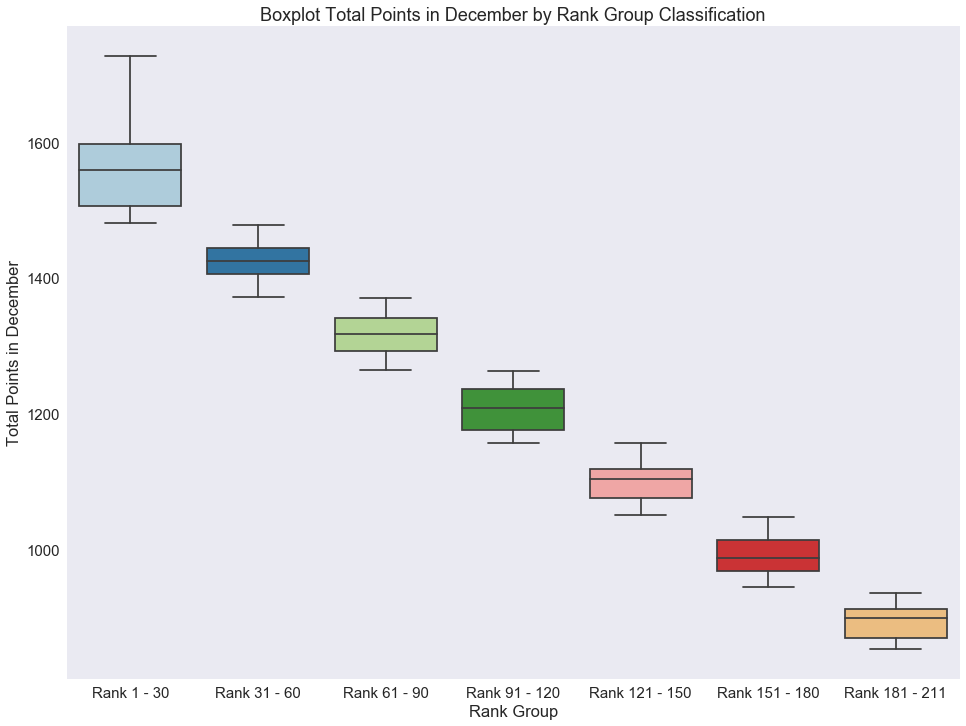

In [102]:
#boxplot of Total points in December by rank group classification
plt.figure(figsize=(16,12))
sns.boxplot( x=fifa_2018_clean['Rank_Group'], y=fifa_2018_clean['Total_Points_Dec'], palette='Paired')


plt.title('Boxplot Total Points in December by Rank Group Classification', fontsize=18)
plt.xlabel('Rank Group')
plt.ylabel('Total Points in December')
plt.show();

- Total points in december or end of year are clearly higher in the better ranked groups
- You can really see the higher point totals across all groups compared to January and ther's not as much variance especially in rank 1 -30

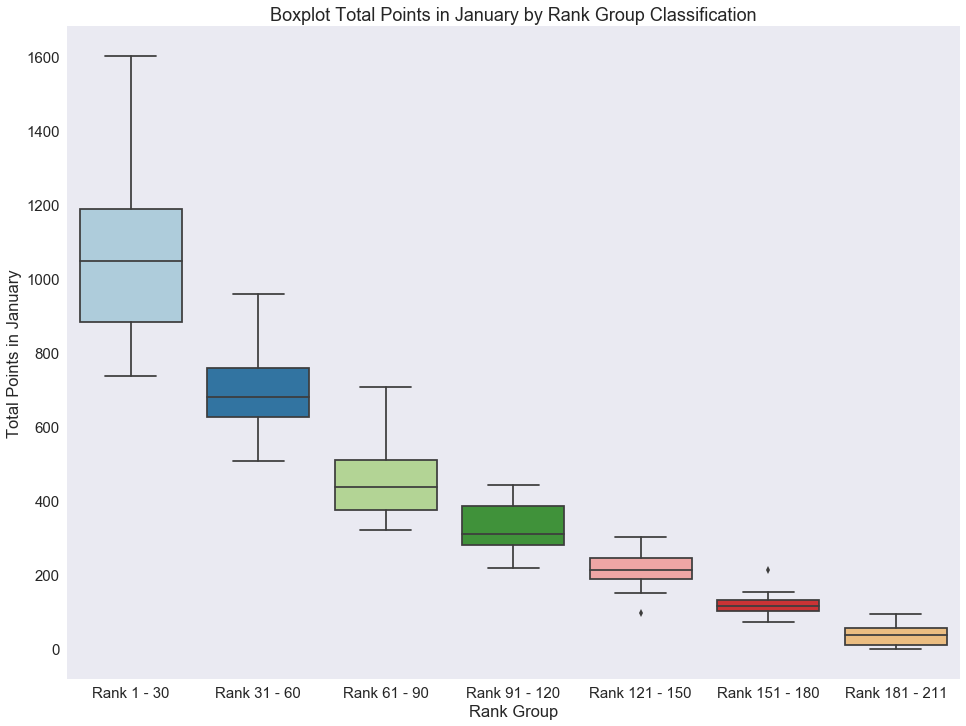

In [103]:
#boxplot of Total points in January by rank group classification
plt.figure(figsize=(16,12))
sns.boxplot( x=fifa_2018_clean['Rank_Group'], y=fifa_2018_clean['Total_Points_Jan'], palette='Paired')


plt.title('Boxplot Total Points in January by Rank Group Classification', fontsize=18)
plt.xlabel('Rank Group')
plt.ylabel('Total Points in January')
plt.show();

- Total points in january or beginning of year are clearly higher in the better ranked groups too
- Point totals were lower across all group rankings, clearly the qualifying and the world cup helped get point totals up
- rank 1-30 had the largest variance or range from 750 - 1600

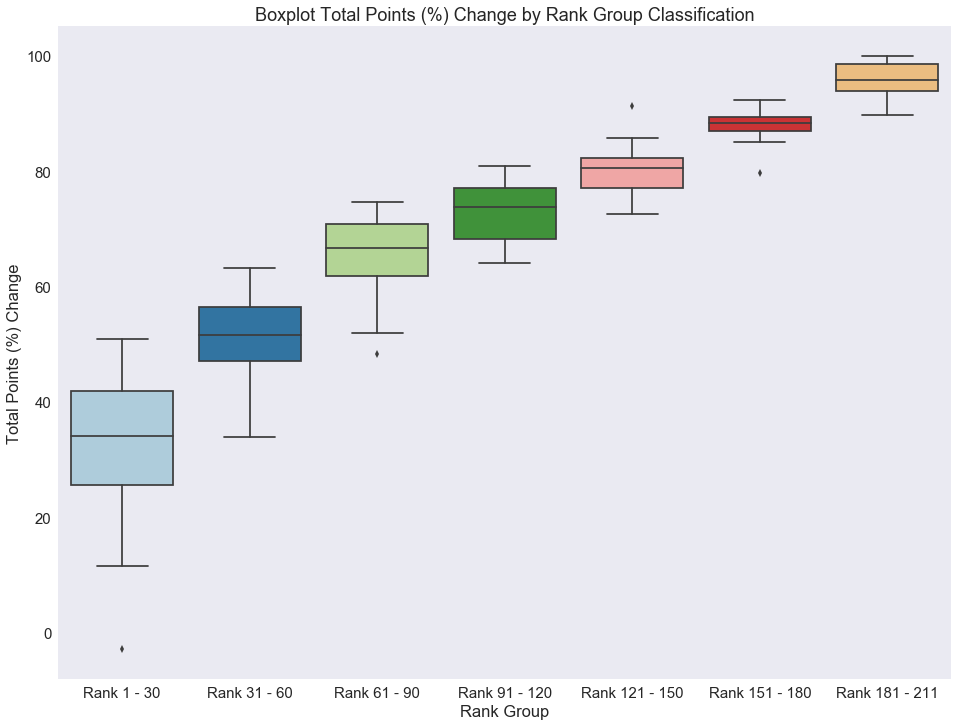

In [104]:
#boxplot of Total points (%) Change by rank group classification
plt.figure(figsize=(16,12))
sns.boxplot( x=fifa_2018_clean['Rank_Group'], y=fifa_2018_clean['Total_Points_PerChg'], palette='Paired')


plt.title('Boxplot Total Points (%) Change by Rank Group Classification', fontsize=18)
plt.xlabel('Rank Group')
plt.ylabel('Total Points (%) Change')
plt.show();

- The more worse at team was ranked the better their total points (%) change over the year; the teams with the larger point percentage increases typically have very low point totals at the beginning of the year
- The better a group is ranked the larger the range in their distribution

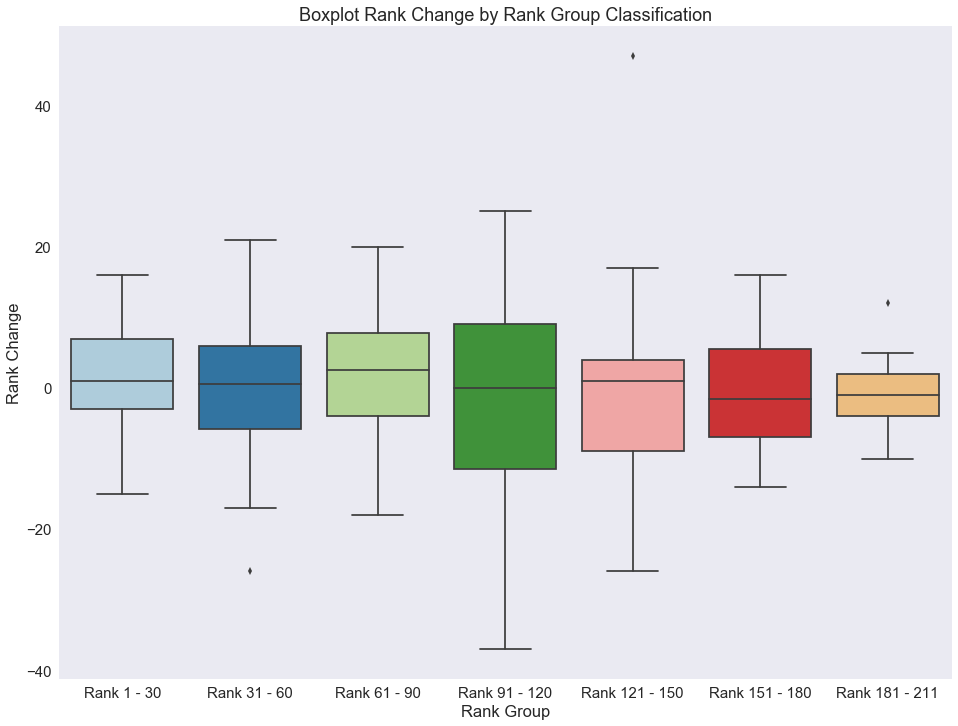

In [105]:
#boxplot of Rank Change by rank group classification
plt.figure(figsize=(16,12))
sns.boxplot( x=fifa_2018_clean['Rank_Group'], y=fifa_2018_clean['Rank_Chg'], palette='Paired')


plt.title('Boxplot Rank Change by Rank Group Classification', fontsize=18)
plt.xlabel('Rank Group')
plt.ylabel('Rank Change')
plt.show();

- The largest range is in the middle of the rankings rank 91-120 and gets smaller as ranks improve and worsen

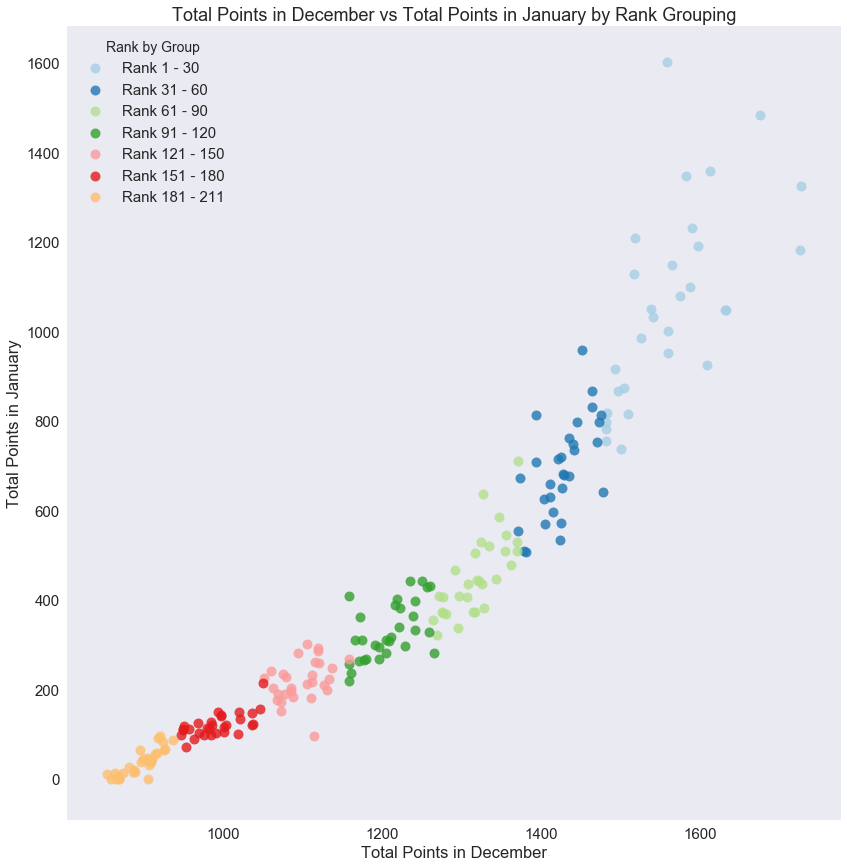

In [106]:
#scatterplot Total Points in December vs Total Points in January color coded by Rank Group
sns.lmplot(x ='Total_Points_Dec', y ='Total_Points_Jan', data=fifa_2018_clean, x_jitter=True, y_jitter=True, 
           scatter_kws={"s": 100}, legend_out=False, hue='Rank_Group', 
           size = 12, fit_reg=False, palette='Paired')

plt.title('Total Points in December vs Total Points in January by Rank Grouping')
plt.legend(title='Rank by Group')
plt.xlabel('Total Points in December')
plt.ylabel('Total Points in January')
plt.show();

- The two variables have a stong positive correlation
- Each group is color coded by their rank grouping.  As point totals improve; the ranking improves

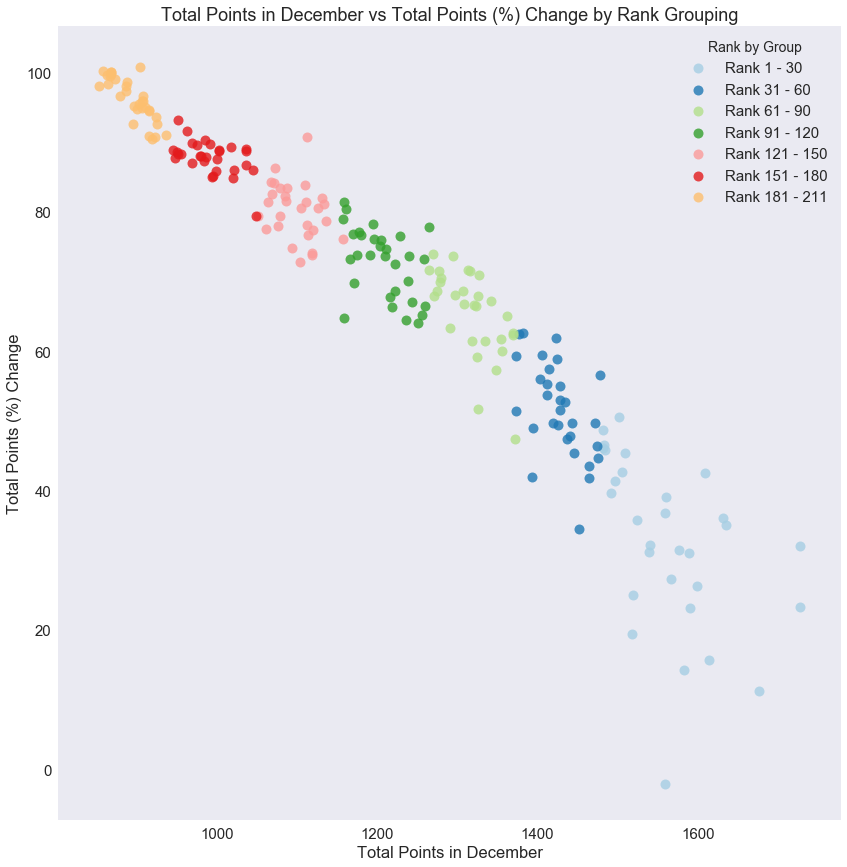

In [107]:
#scatterplot Total Points in December vs Total Points (%) Change in January color coded by Rank Group
sns.lmplot(x ='Total_Points_Dec', y ='Total_Points_PerChg', data=fifa_2018_clean, x_jitter=True, y_jitter=True, 
           scatter_kws={"s": 100}, legend_out=False, hue='Rank_Group', 
           size = 12, fit_reg=False, palette='Paired')

plt.title('Total Points in December vs Total Points (%) Change by Rank Grouping')
plt.legend(title='Rank by Group')
plt.xlabel('Total Points in December')
plt.ylabel('Total Points (%) Change')
plt.show();

- The two variables have a stong negative correlation
- Each group is color coded by their rank grouping.  As point totals improve; the ranking improves, but you also notice these groups with better rankings have the smallest total point percentage change

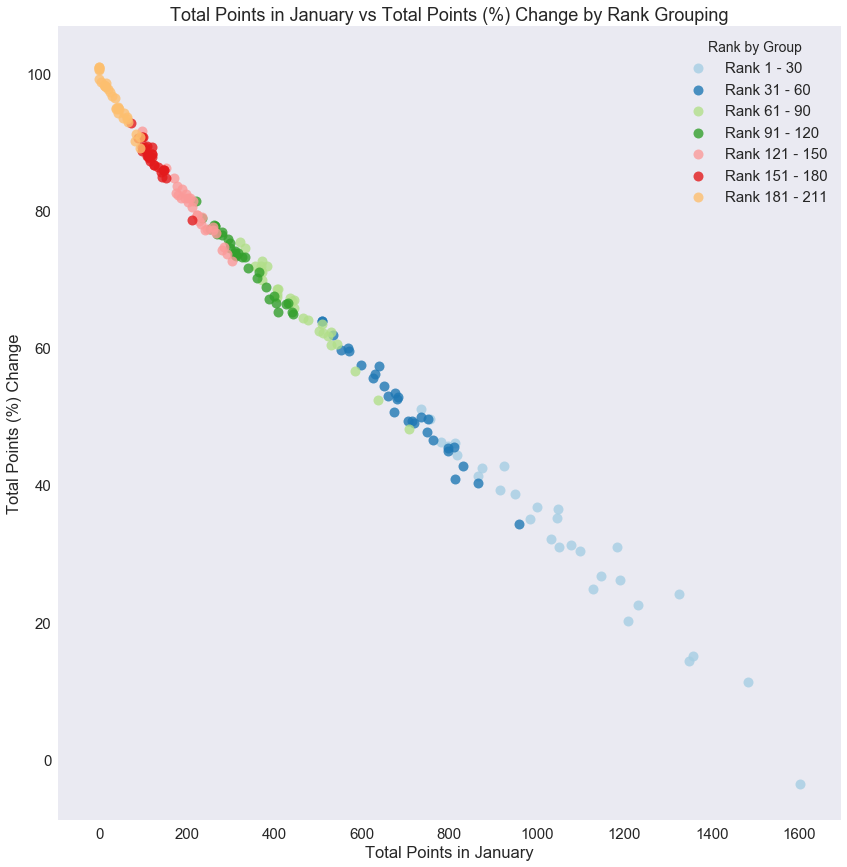

In [108]:
#scatterplot Total Points in December vs Total Points (%) Change in January color coded by Rank Group
sns.lmplot(x ='Total_Points_Jan', y ='Total_Points_PerChg', data=fifa_2018_clean, x_jitter=True, y_jitter=True, 
           scatter_kws={"s": 100}, legend_out=False, hue='Rank_Group', 
           size = 12, fit_reg=False, palette='Paired')

plt.title('Total Points in January vs Total Points (%) Change by Rank Grouping')
plt.legend(title='Rank by Group')
plt.xlabel('Total Points in January')
plt.ylabel('Total Points (%) Change')
plt.show();

- The two variables have a stong negative correlation
- Each group is color coded by their rank grouping.  As point totals improve; the ranking improves, but you also notice these groups with better rankings have the smallest total point percentage change

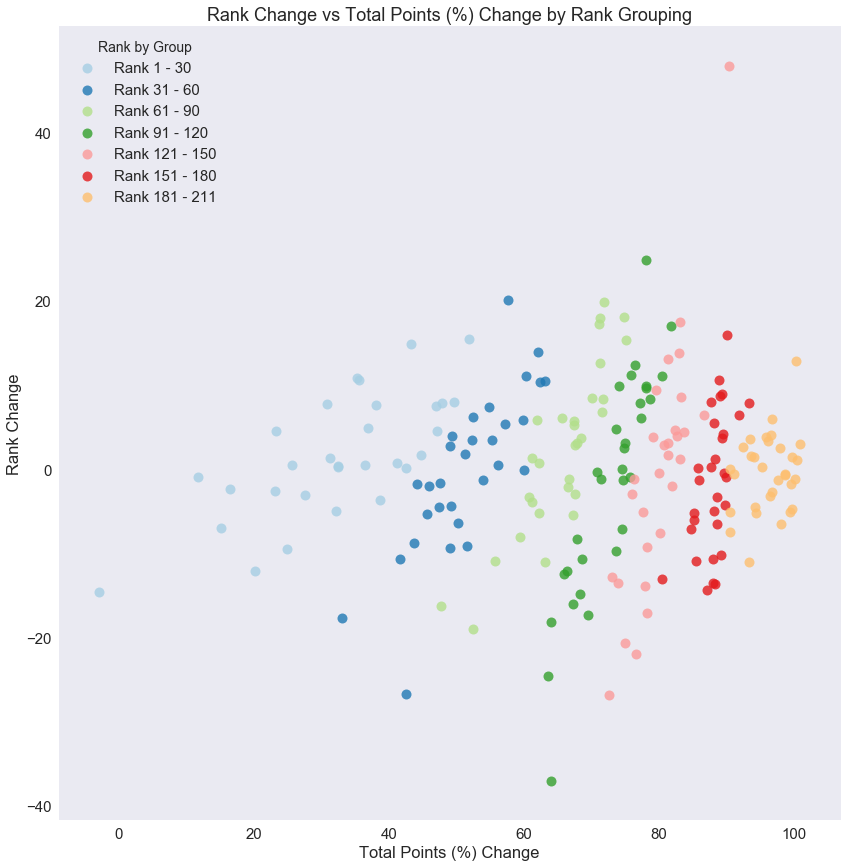

In [109]:
#scatterplot Rank Change vs Total Points (%) Change in January color coded by Rank Group
sns.lmplot(x ='Total_Points_PerChg', y ='Rank_Chg', data=fifa_2018_clean, x_jitter=True, y_jitter=True, 
           scatter_kws={"s": 100}, legend_out=False, hue='Rank_Group', 
           size = 12, fit_reg=False, palette='Paired')

plt.title('Rank Change vs Total Points (%) Change by Rank Grouping')
plt.legend(title='Rank by Group')
plt.xlabel('Total Points (%) Change')
plt.ylabel('Rank Change')
plt.show();

- The two variables have a very weak positive correlation
- Each group is color coded by their rank grouping.  As total points percentage change increases there is slight improvement in rank, but it's very small, so there are other factors not easily measured.
- there is more variance in rank change in the middle of the rankings, while the extreme ends show very little

#### Confederation

In [110]:
def conf():
    #counts of teams ranked by confederation
    Conf_Ct = fifa_2018_clean['Confederation'].value_counts()
    
    print('Counts of Ranked Teams by Confederation','\n')
    print(Conf_Ct, '\n')
    
    #proportion of ranked teams by confederation
    Conf_Prop = fifa_2018_clean['Confederation'].value_counts()/fifa_2018_clean['Confederation'].count()*100

    print('Proportions of Ranked Teams by Confederation','\n')
    print(round(Conf_Prop,2).apply( lambda x : str(x) + '%'),'\n')
    
    #points in december by confederation
    Conf_Dec = fifa_2018_clean.groupby(['Confederation'])['Total_Points_Dec'].mean()
    
    print('Average Total Points in December by Confederation','\n')
    print(round(Conf_Dec,0),'\n')
    
    #points in january by confederation
    Conf_Jan = fifa_2018_clean.groupby(['Confederation'])['Total_Points_Jan'].mean()
   
    print('Average Total Points in January by Confederation','\n')
    print(round(Conf_Jan,0),'\n')
    
    #points percentage by confederation
    Conf_PerChg = fifa_2018_clean.groupby(['Confederation'])['Total_Points_PerChg'].mean()
   
    print('Average Total Points (%) Change by Confederation','\n')
    print(round(Conf_PerChg,2).apply( lambda x : str(x) + '%'),'\n')
    
    #variables to calculate proportions of each confederation from the ranking
    UEFA = fifa_2018_clean.Confederation == 'UEFA'
    CAF = fifa_2018_clean.Confederation == 'CAF'
    AFC = fifa_2018_clean.Confederation == 'AFC'
    CONCACAF = fifa_2018_clean.Confederation == 'CONCACAF'
    OFC = fifa_2018_clean.Confederation == 'OFC'
    CONMEBOL = fifa_2018_clean.Confederation == 'CONMEBOL'
    
    #rank change value that appears most of each classification
    c1 = fifa_2018_clean.Rank_Chg[UEFA].mode()[0]
    c2 = fifa_2018_clean.Rank_Chg[CAF].mode()[0]
    c3 = fifa_2018_clean.Rank_Chg[AFC].mode()[0]
    c4 = fifa_2018_clean.Rank_Chg[CONCACAF].mode()[0]
    c5 = fifa_2018_clean.Rank_Chg[OFC].mode()[0]
    c6 = fifa_2018_clean.Rank_Chg[CONMEBOL].mode()[0]
    

    #print statements
    print('Rank Change value that occurs most by Confederation','\n')
    print('UEFA','    ',c1)
    print('CAF','    ',c2)
    print('AFC','     ',c3)
    print('CONCACAF',c4)
    print('OFC','     ',c5)
    print('CONMEBOL',c6)
    
    return;
conf()

Counts of Ranked Teams by Confederation 

UEFA        55
CAF         54
AFC         46
CONCACAF    35
OFC         11
CONMEBOL    10
Name: Confederation, dtype: int64 

Proportions of Ranked Teams by Confederation 

UEFA        26.07%
CAF         25.59%
AFC          21.8%
CONCACAF    16.59%
OFC          5.21%
CONMEBOL     4.74%
Name: Confederation, dtype: object 

Average Total Points in December by Confederation 

Confederation
AFC         1132.0
CAF         1187.0
CONCACAF    1091.0
CONMEBOL    1524.0
OFC          984.0
UEFA        1373.0
Name: Total_Points_Dec, dtype: float64 

Average Total Points in January by Confederation 

Confederation
AFC         261.0
CAF         359.0
CONCACAF    258.0
CONMEBOL    974.0
OFC         110.0
UEFA        656.0
Name: Total_Points_Jan, dtype: float64 

Average Total Points (%) Change by Confederation 

Confederation
AFC         78.82%
CAF         71.71%
CONCACAF    79.59%
CONMEBOL    36.88%
OFC         89.39%
UEFA        55.38%
Name: Total_Points_P

Variable analysis of Confederation:
- UEFA (Europe) and CAF (Africa) have the most teams; followed by AFC (Asia) and CONCACAF (NA) and lastly, OFC (Oceania) and CONMEBOL (SA)
- CONMEBOL has the highest average point totals in december and january; followed by UEFA
- The largest total points (%) change comes from OFC; followed by CONCACAF

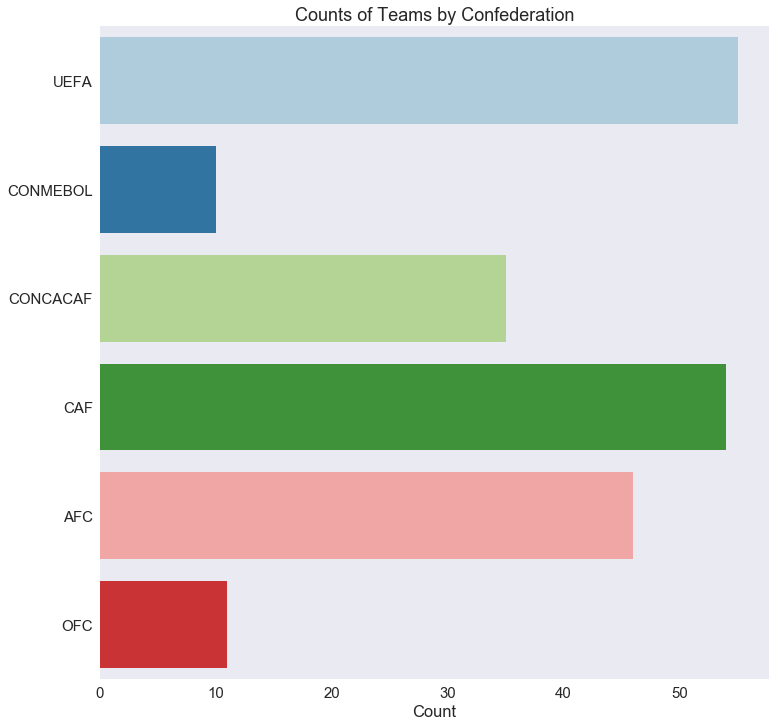

In [111]:
#barchart showing counts teams by confederation
plt.figure(figsize=(12,12))
sns.countplot(y='Confederation', data=fifa_2018_clean, palette='Paired')

plt.title('Counts of Teams by Confederation', fontsize=18)
plt.ylabel('')
plt.xlabel('Count')
plt.show();

- UEFA and CAF have the most teams in their confederation; followed by AFC and CONCACAF, lastly OFC and CONMEBOL
- Europe isn't a large continent, but it has many small countries and Africa is large continent with many countries of various sizes
- Asia is a large continent with countries of varying sizes and not all field teams and NA is a large continent, but the countries a quiet large except the various island nations in the caribbean
- Oceania (Australia, Indo, etc.) countries not many field teams; SA is large continent, but many of the countries are large in size


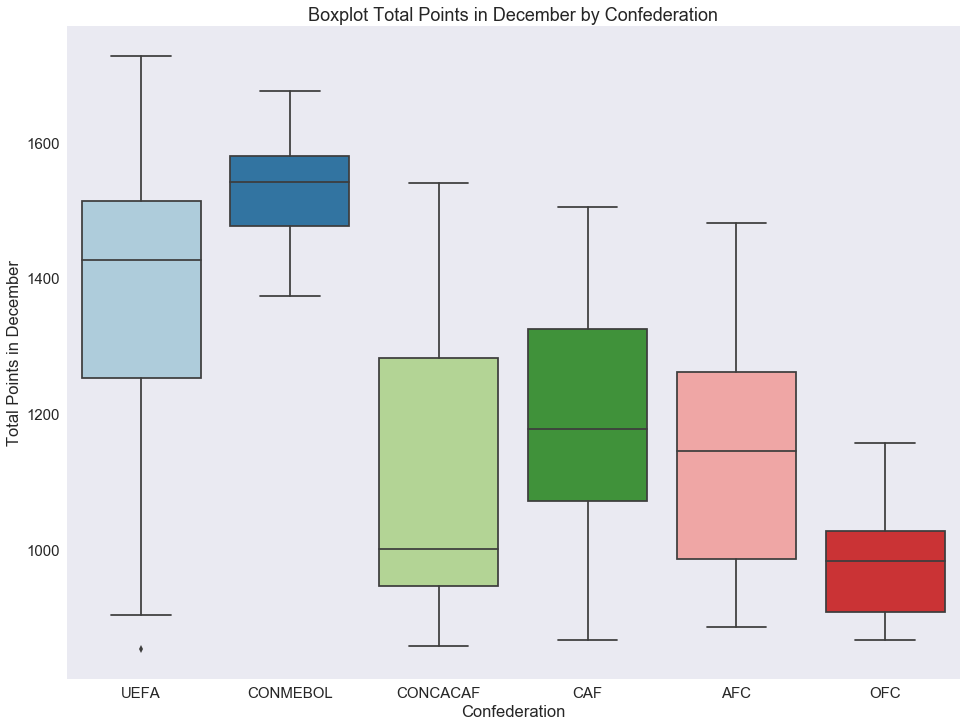

In [112]:
#boxplot of Total points in December by confederation
plt.figure(figsize=(16,12))
sns.boxplot( x=fifa_2018_clean['Confederation'], y=fifa_2018_clean['Total_Points_Dec'], palette='Paired')


plt.title('Boxplot Total Points in December by Confederation', fontsize=18)
plt.xlabel('Confederation')
plt.ylabel('Total Points in December')
plt.show();

- UEFA: has the largest range they have some of the worst teams in Europe (small nations like san marino) and some of the best teams spain, italy, france etc.
- CONMEBOL: doesn't have as many teams as the other confederations, but the level competition in SA is quite high
- CONCACAF: has quite a large range the caribbean or island nations tend drive down the point totals
- CAF: Africa has a lot of talented teams, but they also have a few teams that a quite weak driving the point total average
- AFC: Similar to Africa, but less talent
- OFC: Oceania is weak soccer region, hence the low average point totals

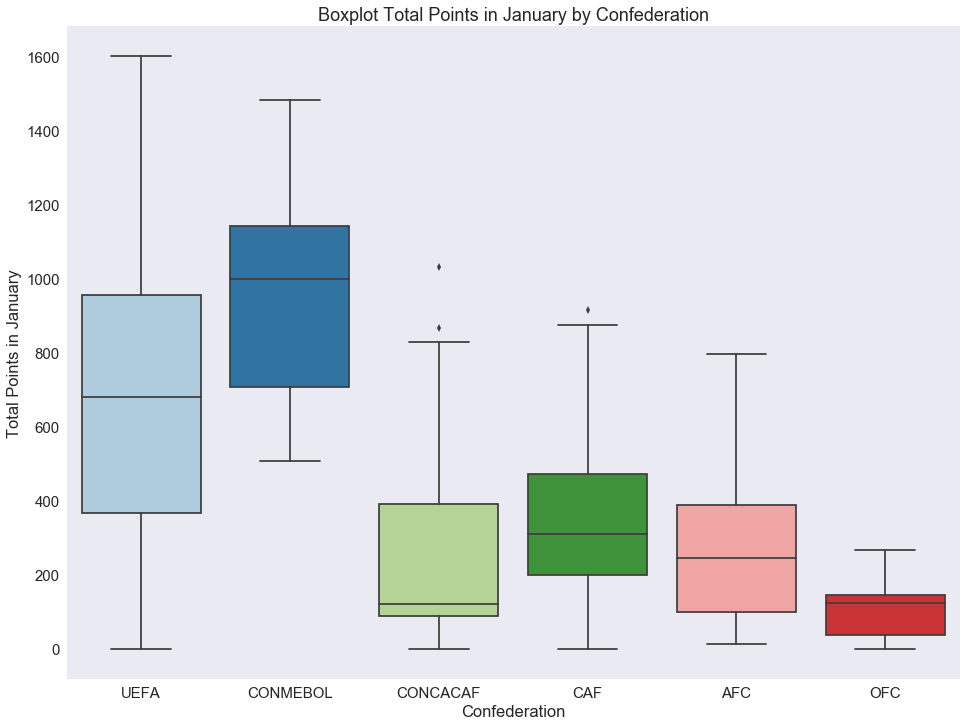

In [113]:
#boxplot of Total points in January by confederation
plt.figure(figsize=(16,12))
sns.boxplot( x=fifa_2018_clean['Confederation'], y=fifa_2018_clean['Total_Points_Jan'], palette='Paired')


plt.title('Boxplot Total Points in January by Confederation', fontsize=18)
plt.xlabel('Confederation')
plt.ylabel('Total Points in January')
plt.show();

- Similar to previous box plot on difference you can see point totals increasing across all confederations

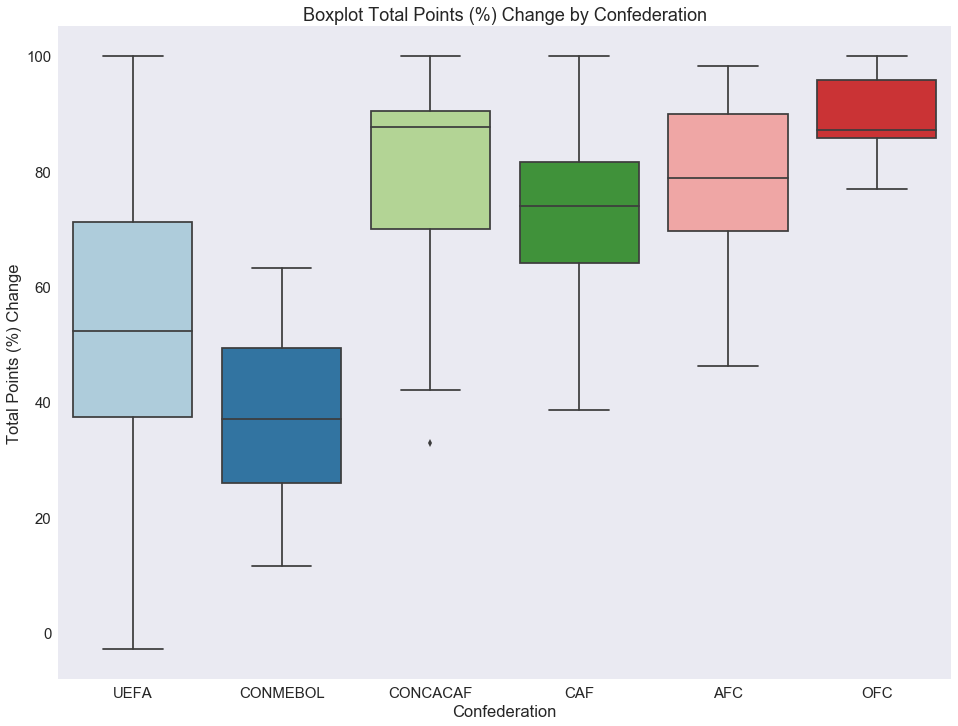

In [114]:
#boxplot of Total points (%) Change by confederation
plt.figure(figsize=(16,12))
sns.boxplot( x=fifa_2018_clean['Confederation'], y=fifa_2018_clean['Total_Points_PerChg'], palette='Paired')


plt.title('Boxplot Total Points (%) Change by Confederation', fontsize=18)
plt.xlabel('Confederation')
plt.ylabel('Total Points (%) Change')
plt.show();

- As I seen in other classifications the confederation distributions hold true here too.  CONCACAF, CAF, AFC and OFC have higher total point percentage change
- CONMEBOL has the lowest point percentage change and UEFA has a huge variance

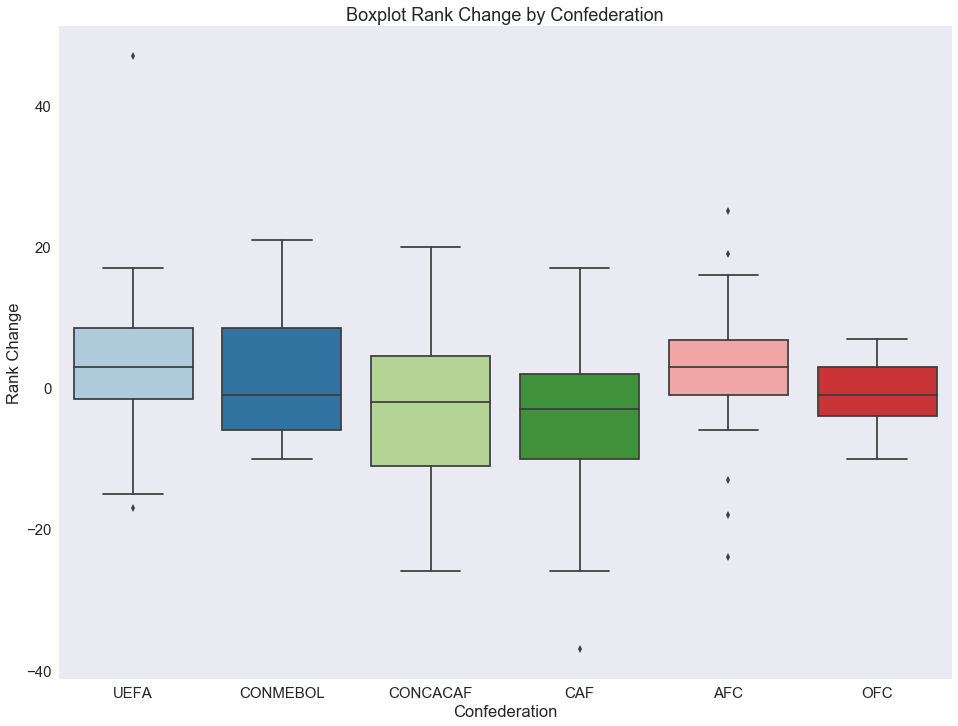

In [115]:
#boxplot of Rank Change by confederation
plt.figure(figsize=(16,12))
sns.boxplot( x=fifa_2018_clean['Confederation'], y=fifa_2018_clean['Rank_Chg'], palette='Paired')


plt.title('Boxplot Rank Change by Confederation', fontsize=18)
plt.xlabel('Confederation')
plt.ylabel('Rank Change')
plt.show();

- Very little rank change across confederations, although CONCACAF and CAF show the larger variance here

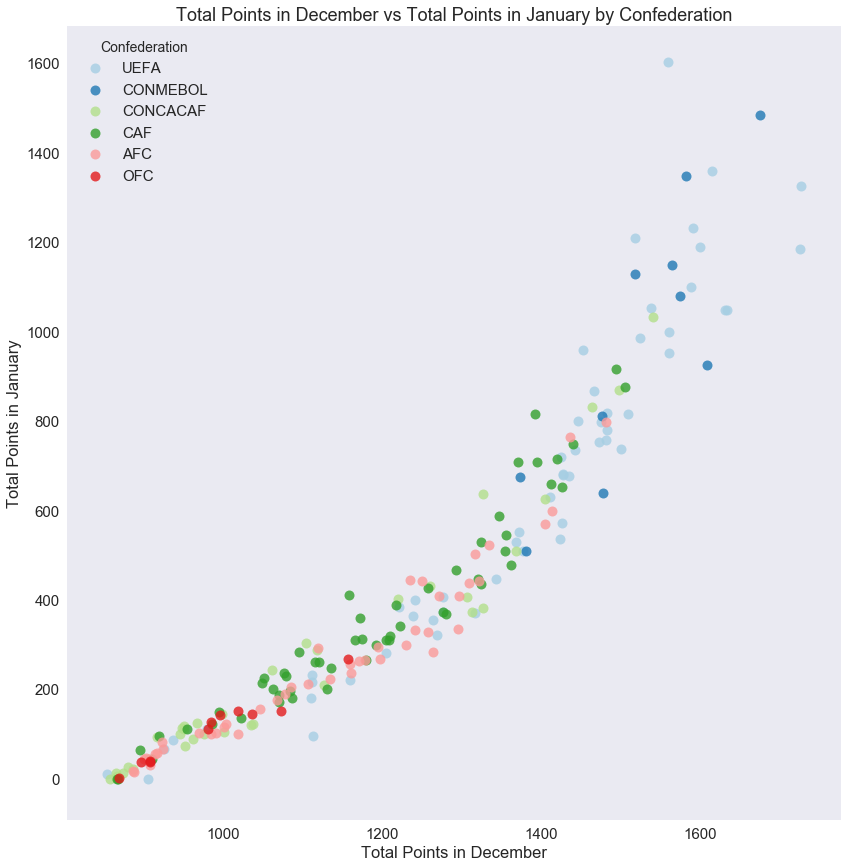

In [116]:
#scatterplot Total Points in December vs Total Points in January color coded by Confederation
sns.lmplot(x ='Total_Points_Dec', y ='Total_Points_Jan', data=fifa_2018_clean, x_jitter=True, y_jitter=True, 
           scatter_kws={"s": 100}, legend_out=False, hue='Confederation', 
           size = 12, fit_reg=False, palette='Paired')

plt.title('Total Points in December vs Total Points in January by Confederation')
plt.legend(title='Confederation')
plt.xlabel('Total Points in December')
plt.ylabel('Total Points in January')
plt.show();

- Stong positive correlation - As total in december increase, so does january as it should
- UEFA: total points seem spreadout the most from near zero to most points
- CONCACAF, AFC and CAF: spreadout from near zero to middle of total points
- OFC: point totals are at the bottom
- CONMEBOL: point totals at the top

Let's look at this clearer below

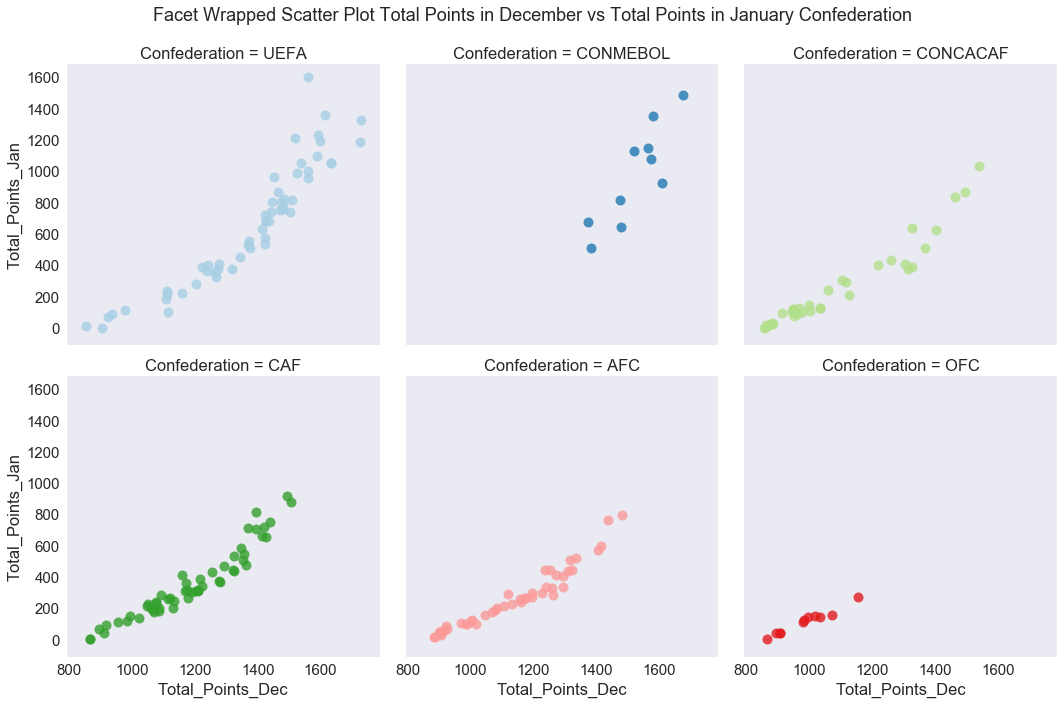

In [117]:
#facet wrap by Confederation Total Points in December vs Total Points in January
sns.lmplot(x='Total_Points_Dec', 
           y='Total_Points_Jan', 
           col='Confederation', 
           col_wrap=3, 
           data=fifa_2018_clean,
           fit_reg=False,
           hue='Confederation',
           x_jitter=True,
           y_jitter=True,
           scatter_kws={"s": 100},
           palette='Paired')

plt.suptitle('Facet Wrapped Scatter Plot Total Points in December vs Total Points in January Confederation', size=18)
plt.subplots_adjust(top=.9)
plt.show();

Here it's much easier to see: 
- UEFA: has the largest range of total points from near zero to most around 1700; they have some really bad teams and excellent teams
- CONCACAF, AFC and CAF: these confederations have some good teams, average and bad teams
- OFC: this confederations typically has poor teams and the point totals reflect this
- CONMEBOL: this confederation has above average to excellent teams

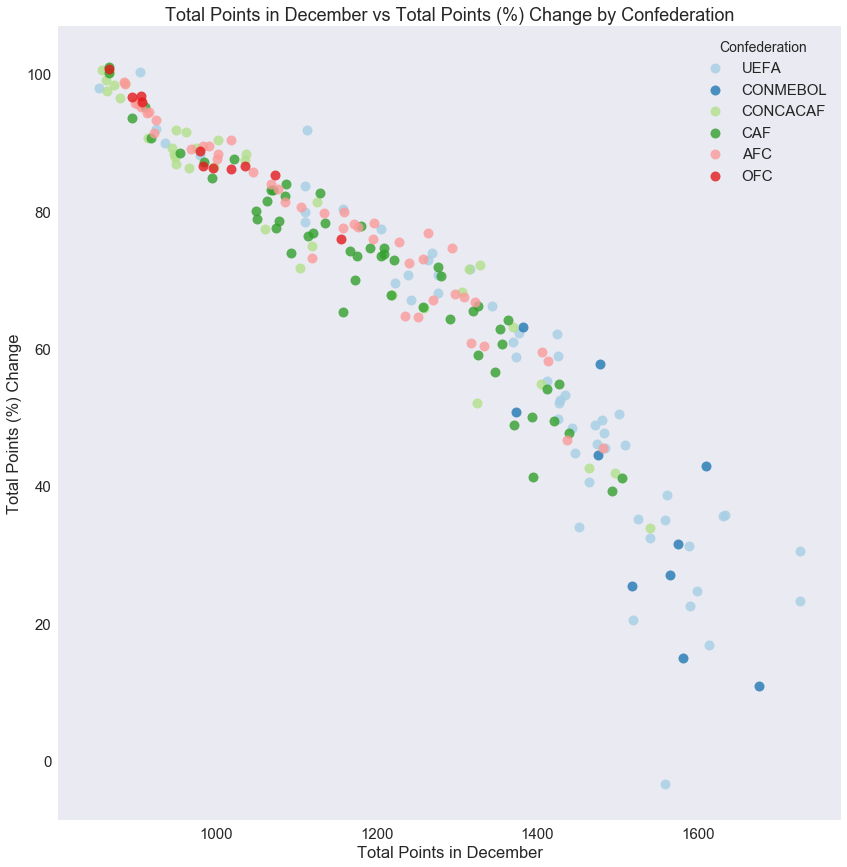

In [118]:
#scatterplot Total Points in December vs Total Points (%) Change coded by Confederation
sns.lmplot(x ='Total_Points_Dec', y ='Total_Points_PerChg', data=fifa_2018_clean, x_jitter=True, y_jitter=True, 
           scatter_kws={"s": 100}, legend_out=False, hue='Confederation', 
           size = 12, fit_reg=False, palette='Paired')

plt.title('Total Points in December vs Total Points (%) Change by Confederation')
plt.legend(title='Confederation')
plt.xlabel('Total Points in December')
plt.ylabel('Total Points (%) Change')
plt.show();

- Stong negative correlation - As total points in december increase; total points (%) change decreases 
- UEFA: This group is the most spread out in the data; poor to excellent teams
- CONCACAF, AFC and CAF: spread out, but they seem to concentrate from the middle down; poor, average, some good teams
- OFC: data is near the bottom, poor performing teams
- CONMEBOL: point totals at the top, above average to excellent teams

Let's look at this clearer below

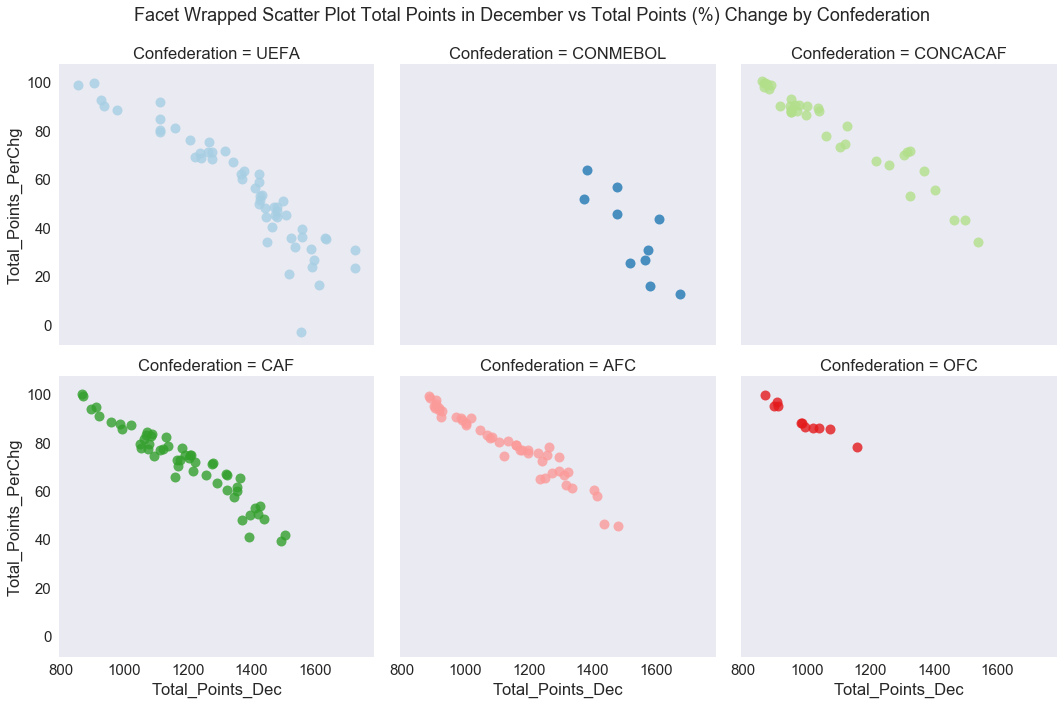

In [119]:
#facet wrap by Confederation Total Points in December vs Total Points (%) Change 
sns.lmplot(x='Total_Points_Dec', 
           y='Total_Points_PerChg', 
           col='Confederation', 
           col_wrap=3, 
           data=fifa_2018_clean,
           fit_reg=False,
           hue='Confederation',
           x_jitter=True,
           y_jitter=True,
           scatter_kws={"s": 100},
           palette='Paired')

plt.suptitle('Facet Wrapped Scatter Plot Total Points in December vs Total Points (%) Change by Confederation', size=18)
plt.subplots_adjust(top=.9)
plt.show();

Here it's much easier to see: 
- UEFA: has the largest range of total points from near zero to most around 1700; they have some really bad teams and excellent teams.  The better teams have a lower total point percentage change and more points; the poor teams high total point percantage change and low point totals; the teams in the middle rank some where between here
- CONCACAF, AFC and CAF: point totals range from 0 to 1500, these confederations have some good teams, average and bad teams. The better teams have a lower total point percentage change and more points; the poor teams high total point percantage change and low point totals; the teams in the middle rank some where between here
- OFC: this confederations typically has poor teams and the point totals reflect this they range from 800-1200 and typically have high total point percentage change and low point totals
- CONMEBOL: point total range from 1300 - 1700 this confederation has above average to excellent teams; they typically have low point percentage change and high point totals

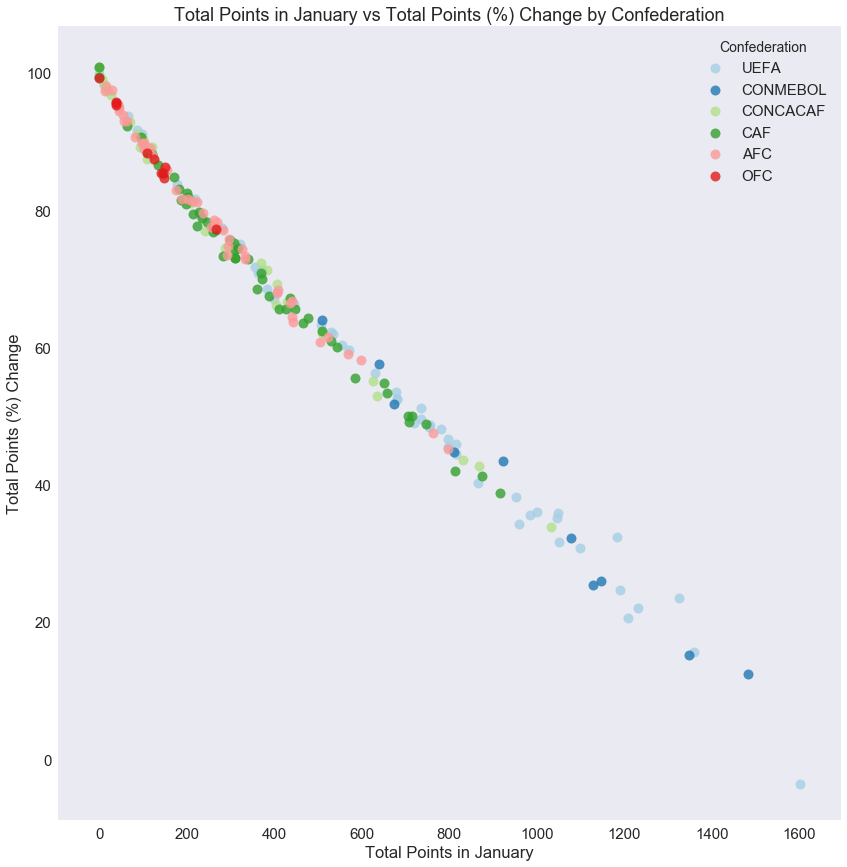

In [120]:
#scatterplot Total Points in January vs Total Points (%) Change coded by Confederation
sns.lmplot(x ='Total_Points_Jan', y ='Total_Points_PerChg', data=fifa_2018_clean, x_jitter=True, y_jitter=True, 
           scatter_kws={"s": 100}, legend_out=False, hue='Confederation', 
           size = 12, fit_reg=False, palette='Paired')

plt.title('Total Points in January vs Total Points (%) Change by Confederation')
plt.legend(title='Confederation')
plt.xlabel('Total Points in January')
plt.ylabel('Total Points (%) Change')
plt.show();

- Stong negative correlation - As total points in january increase; total points (%) change decreases 
- UEFA: This group is the most spread out in the data; poor to excellent teams
- CONCACAF, AFC and CAF: spread out, but they seem to concentrate from the middle down; poor, average, some good teams
- OFC: data is near the bottom, poor performing teams
- CONMEBOL: point totals at the top, above average to excellent teams

Results look somewhat similar to the previous plots, but let's look at this clearer below

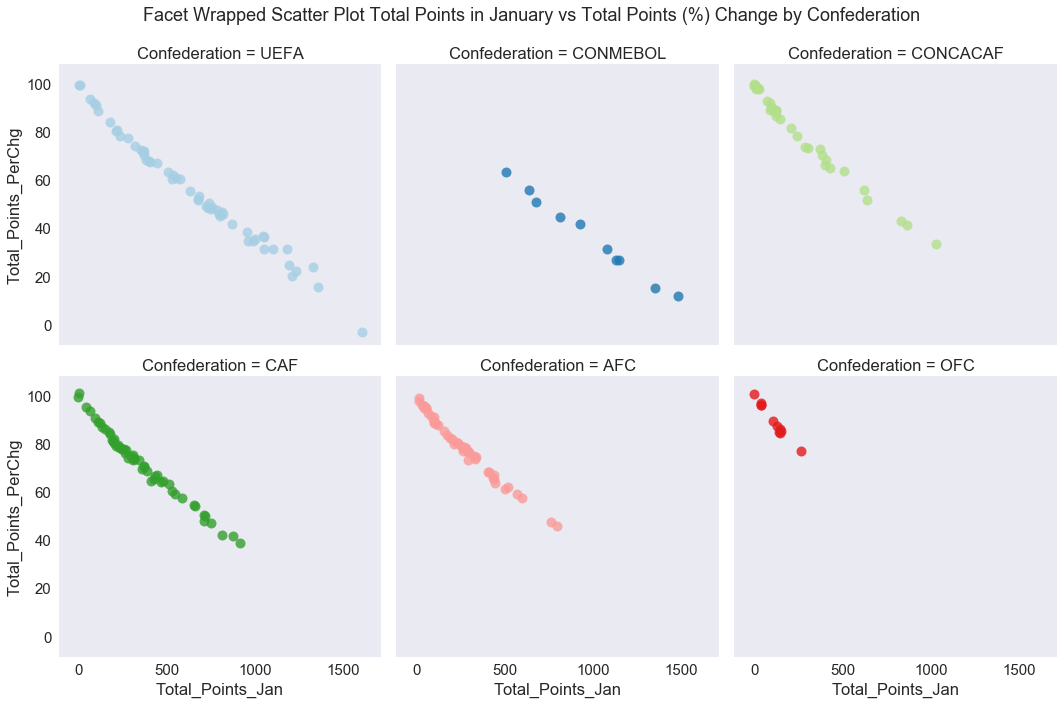

In [121]:
#facet wrap by Confederation Total Points in January vs Total Points (%) Change 
sns.lmplot(x='Total_Points_Jan', 
           y='Total_Points_PerChg', 
           col='Confederation', 
           col_wrap=3, 
           data=fifa_2018_clean,
           fit_reg=False,
           hue='Confederation',
           x_jitter=True,
           y_jitter=True,
           scatter_kws={"s": 100},
           palette='Paired')

plt.suptitle('Facet Wrapped Scatter Plot Total Points in January vs Total Points (%) Change by Confederation', size=18)
plt.subplots_adjust(top=.9)
plt.show();

Here it's much easier to see: 
- similar to previous plot only difference your looking a the relationship of total points from the beginning of the year compared to total point percentage change
- The point totals were lower at the beginning of the year, but the shape and results are similar to previous plots

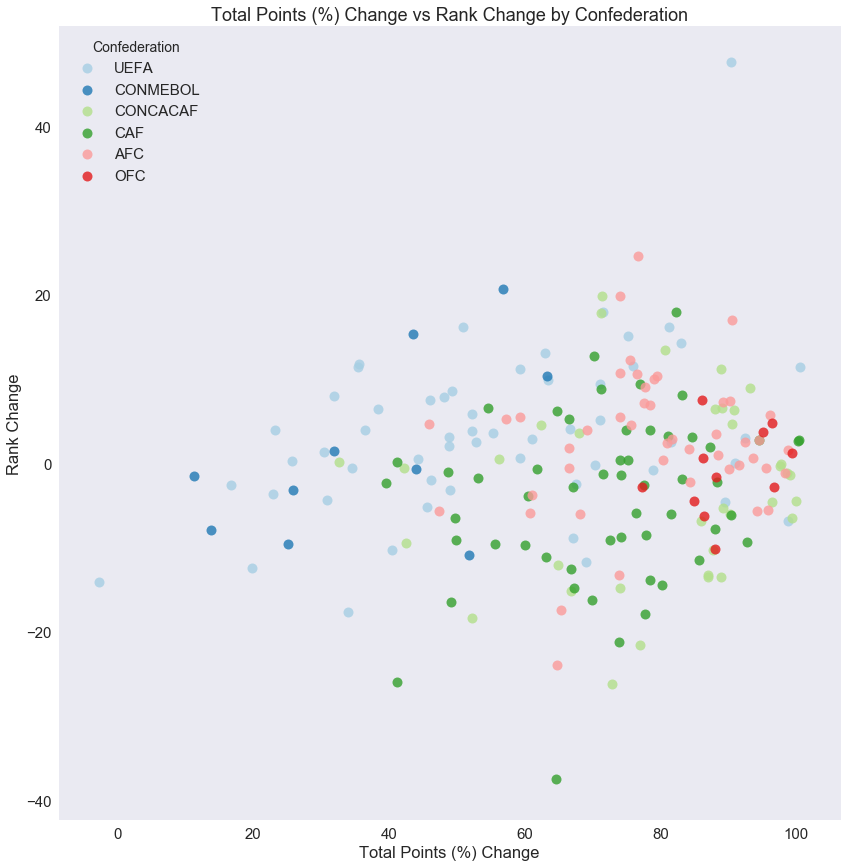

In [122]:
#scatterplot Total Points (%) Change vs Rank Change coded by Confederation
sns.lmplot(x ='Total_Points_PerChg', y ='Rank_Chg', data=fifa_2018_clean, x_jitter=True, y_jitter=True, 
           scatter_kws={"s": 100}, legend_out=False, hue='Confederation', 
           size = 12, fit_reg=False, palette='Paired')

plt.title('Total Points (%) Change vs Rank Change by Confederation')
plt.legend(title='Confederation')
plt.xlabel('Total Points (%) Change')
plt.ylabel('Rank Change')
plt.show();

- Very weak positive correlation - As total points (%) change increase; rank change increases slightly 
- UEFA: This group is the most spread out in the data; poor to excellent teams
- CONCACAF, AFC and CAF: spread out, but they seem to concentrate from the middle down; poor, average, some good teams
- OFC: data is near the bottom or this plot right, poor performing teams
- CONMEBOL: point totals at the top or this plot left, above average to excellent teams

Let's look at this clearer below

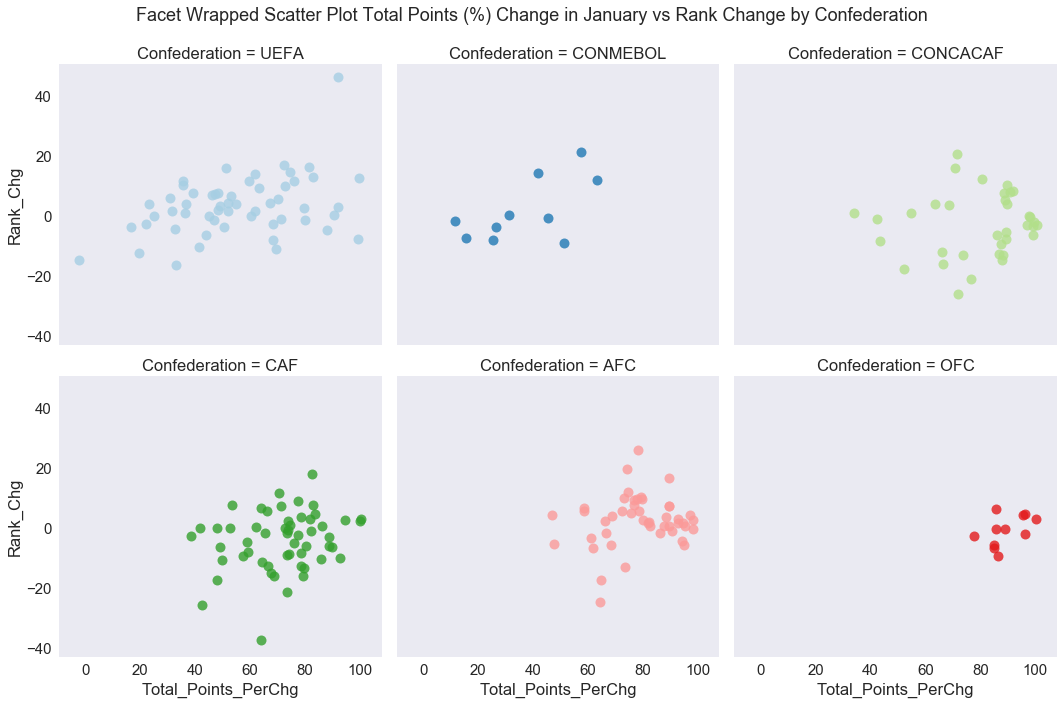

In [123]:
#facet wrap by Confederation Total Points (%) Change vs Rank Change 
sns.lmplot(x='Total_Points_PerChg', 
           y='Rank_Chg', 
           col='Confederation', 
           col_wrap=3, 
           data=fifa_2018_clean,
           fit_reg=False,
           hue='Confederation',
           x_jitter=True,
           y_jitter=True,
           scatter_kws={"s": 100},
           palette='Paired')

plt.suptitle('Facet Wrapped Scatter Plot Total Points (%) Change in January vs Rank Change by Confederation', size=18)
plt.subplots_adjust(top=.9)
plt.show();

Here it's much easier to see: 
- most rank change in all confederations range from -20 to 20, but OFC has the least rank changes
- UEFA: total points percentage change ranges from 0 to 100; the data is spread out
- CAF, AFC, CONCACAF: total points percentage change ranges from 30 to 100; the data spreads out from the middle to left
- OFC: total points percentage change ranges from 70 to 100; the data clusters on the left
- CONMEBOL: total points percentage change ranges from 15 to 60; the data spreads out middle to left

### Hypothesis Testing

Dependent Variables: Rank

Indepenent Variables: Total Points in December; the end of 2018, Total Points in January; the beginning of 2018, Total Point Movement of the year and rank changes.  In addition, classifications such as confederation, ranking by group etc.

- Total Points at the end of 2018; ultimately, determines the fifa rankings and the independent variables Total Points in December, Total Points in January and the change between these two variables affect the rankings the most.

- Ultimately, the world cup qualifying and tournament should improve point totals; therefore, affect the rankings.

#### Two Tailed Tests

**$$Mathematical\ Statement:$$**
**$$H_0: \mu_{tpd} - \mu_{tpj} = 0$$**
**$$H_1: \mu_{tpd} - \mu_{tpj} \neq 0$$**

**$$Definitions\ of\ Notation\ Used:$$**
**$$H_O: Null\ Hypothesis$$**
**$$H_1: Alternative\ Hypothesis$$**
**$$\mu_{tpd}: Total\ Points\ December\ population\ mean$$**
**$$\mu_{tpj}: Total\ Points\ January\ population\ mean$$**

#### Linear Regression

##### Simple linear regression with intercept - ordinary least squares

In [136]:
import statsmodels.api as sm;

#simple linear regression model using Total_Points_Dec with intercept
fifa_2018_clean['intercept'] = 1

simp_line = sm.OLS(fifa_2018_clean['Rank'], fifa_2018_clean[['intercept', 'Total_Points_Dec']])

simp_results = simp_line.fit()
simp_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 3.157e+04
Date:                Sat, 26 Jan 2019   Prob (F-statistic):          5.23e-230
Time:                        09:18:16   Log-Likelihood:                -636.33
No. Observations:                 211   AIC:                             1277.
Df Residuals:                     209   BIC:                             1283.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept          433.8182      1.877    231.139      0.000     430.118     437.518
Total_Points_Dec    -0.2703      0.002   -177.692      0.000      -0.273      -0.267
==============================================================================
Omnibus:                      208.717   Durbin-Watson:                   0.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4827.136
Skew:                           3.905   Prob(JB):                         0.00
Kurtosis:                      25.092   Cond. No.                     6.78e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Ordinary Least Squares method: Trying to fit a regression that minimizes the square of distance from the regression line
- 211 observations in my dataframe
- df residuals of 209 and df model 1 relate to the degrees of freedom or number of values in the final statistic
- Coeffcient of -0.2703 means that as the total_points_dec variable increases by 1; the predicted value of rank deceases by -0.2703
- R-Squared is percentage of variance our model explains .993, or 99.3%
- statistically significant p_value; predict 95% confidence the value is between -0.273 to -0.267

Correlation of Determination or R squared is high at .993, so utilizing total points in december closely resembles our data.  This variable is a good predicter of rank at the end of the year.  Also, the very low p value means our data didn't occur by chance; as it shouldn't, the better ranked teams have higher points.

In [125]:
#simple linear regression model using Total_Points_Jan with intercept
fifa_2018_clean['intercept'] = 1

simp_line2 = sm.OLS(fifa_2018_clean['Rank'], fifa_2018_clean[['intercept', 'Total_Points_Jan']])

simp2_results = simp_line2.fit()
simp2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     1297.
Date:                Sat, 26 Jan 2019   Prob (F-statistic):           1.37e-91
Time:                        09:17:48   Log-Likelihood:                -958.03
No. Observations:                 211   AIC:                             1920.
Df Residuals:                     209   BIC:                             1927.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept          173.3426      2.443     70.948      0.000     168.526     178.159
Total_Points_Jan    -0.1627      0.005    -36.018      0.000      -0.172      -0.154
==============================================================================
Omnibus:                       23.070   Durbin-Watson:                   0.678
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.928
Skew:                           0.723   Prob(JB):                     3.17e-07
Kurtosis:                       4.147   Cond. No.                         842.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Ordinary Least Squares method: Trying to fit a regression that minimizes the square of distance from the regression line
- 211 observations in my dataframe
- df residuals of 209 and df model 1 relate to the degrees of freedom or number of values in the final statistic
- Coeffcient of -0.1627 means that as the total_points_jan variable increases by 1; the predicted value of rank deceases by -0.1627
- R-Squared is percentage of variance our model explains .861, or 86.1%
- statistically significant p_value; predict 95% confidence the value is between -0.172 to -0.154

Correlation of Determination or R squared is high at .861, so utilizing total points in january closely resembles our data too.  This variable is a good predicter of rank at the end of the year as well.  Also, the very low p value means our data didn't occur by chance; as it shouldn't, the better ranked teams have higher points at the beginning and is probably likely at the end of the year.

##### Mulitple linear regression model - ordinary least squares

In [126]:
#multi linear regression model using all the rest of our variables in our model
fifa_2018_clean['intercept'] = 1

mult_line = sm.OLS(fifa_2018_clean['Rank'], fifa_2018_clean[['intercept',
                                                             'Total_Points_Dec',
                                                             'Total_Points_Jan',
                                                             'Total_Points_PerChg',
                                                             'Rank_Chg']])

mult_results = mult_line.fit()
mult_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.776e+04
Date:                Sat, 26 Jan 2019   Prob (F-statistic):          3.80e-280
Time:                        09:17:49   Log-Likelihood:                -502.64
No. Observations:                 211   AIC:                             1015.
Df Residuals:                     206   BIC:                             1032.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
intercept             185.0251     14.995     12.339      0.000     155.462     214.588
Total_Points_Dec       -0.2443      0.004    -57.893      0.000      -0.253      -0.236
Total_Points_Jan        0.1289      0.006     22.039      0.000       0.117       0.140
Total_Points_PerChg     2.3531      0.124     19.026      0.000       2.109       2.597
Rank_Chg               -0.2991      0.031     -9.754      0.000      -0.360      -0.239
==============================================================================
Omnibus:                       81.339   Durbin-Watson:                   0.385
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              435.029
Skew:                           1.391   Prob(JB):                     3.42e-95
Kurtosis:                       9.461   Cond. No.                     1.09e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Ordinary Least Squares method: Trying to fit a regression that minimizes the square of distance from the regression line
- 211 observations in my dataframe
- df residuals of 206 and df model 1 relate to the degrees of freedom or number of values in the final statistic
- R-Squared is percentage of variance our model explains .998, or 99.8%

Total_Points_Dec: 
- Coeffcient of -0.2443 means that as the total_points_dec variable increases by 1; the predicted value of rank deceases by 0.2443
- statistically significant p_value; predict 95% confidence the value is between -0.253 to -0.236

Total_Points_Jan:
- Coeffcient of 0.1289 means that as the total_points_jan variable increases by 1; the predicted value of rank increases by 0.1289
- statistically significant p_value; predict 95% confidence the value is between 0.117 to 0.140

Total_Points_PerChg:
- Coeffcient of 2.3531 means that as the total_points_perchg variable increases by 1; the predicted value of rank increases by 2.3531
- statistically significant p_value; predict 95% confidence the value is between 2.109 to 2.597

Rank_Chg:
- Coeffcient of -0.2991 means that as the rank_chg variable increases by 1; the predicted value of rank deceases by -0.2991 
- statistically significant p_value; predict 95% confidence the value is between -0.360 to -0.239


Correlation of Determination or R squared is high at .998, so it's not surprising adding the other variables to our model increases and closely resembles our data.  These variables are good predicters of rank; in particular total_points_dec, total_points_jan and total_points_perchg.  Also, the very low p values mean our data didn't occur by chance.

So, low p values indicate are variables contributed to rank to some degree.  Total Points accrued over 2018 from January to December contributed heavily and the change between these variables seem to have the most impact on the rankings.

###### Ordinary Least Squares Conclusion:

I looked at the total points from december and january; they both were in favor of rejecting the null. In addition, in mulitple linear model I added the other quantitative variables in my dataframe; total points dec, total points jan, total points percentage change, rank change and the variables accounted for 99.8% of our data.  All variables have almost a zero p value.

Low p values in the regression models in particular the variables of total points in december and total points in january we can conclude to reject the null hypothesis; the zero p values indicate it's impossible under the null.

##### Paired Sample T-Test

We're comparing population means between total points in December and total points in January.  Our population is only 211; random sample into groups of 30 by difference of means the distributions is normal, but the distributions as a population which is greater than 30 for both groups are non-normal.  Total points in december has a multi-modal distribution slightly right skewed and total points in january has a right skewed distribution.  The t-test is invalid for small samples from non-normal distributions, but it is valid for large samples from non-normal distributions.

In [127]:
#sampling distribution difference for difference in means
sample_data = fifa_2018_clean.sample(30)

p_new, p_old, p_diffs = [],[],[]

for _ in range(10000):
    p_diffs_sample = sample_data.sample(10000, replace=True)
    p_new_mean = p_diffs_sample['Total_Points_Dec'].mean()
    p_old_mean = p_diffs_sample['Total_Points_Jan'].mean()
    p_new.append(p_new_mean)
    p_old.append(p_old_mean)
    p_diffs.append(p_new_mean - p_old_mean)

In [128]:
#standard deviation for the sampling distribution for difference in means
p_diffs_std = np.std(p_diffs)
print('std deviation of p_diffs:',p_diffs_std)

std deviation of p_diffs: 1.1083241628848655


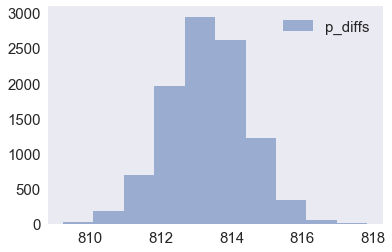

In [129]:
#plotted histogram of p_diffs
plt.hist(p_diffs, alpha = 0.5, label='p_diffs');
plt.legend();

In [130]:
import scipy.stats as st
    
#column points diff
fifa_2018_clean['Total_Points_Diff'] = fifa_2018_clean['Total_Points_Dec'] - fifa_2018_clean['Total_Points_Jan']
    
#diff column mean and std deviation
diff_mean = fifa_2018_clean['Total_Points_Diff'].mean()
diff_std = fifa_2018_clean['Total_Points_Diff'].std()
print('mean difference:', round(diff_mean,5))
print('std deviation difference:', round(diff_std,5),'\n')
    
#critical t for significance level of .05 and degree of freedom of 210 (n-1)
tcritical = st.distributions.t.ppf(1-.05/2,210)
print('critical t:',tcritical)
    
#t-statistic and p-value for a paired two tailed test
paired_sample = st.ttest_rel(fifa_2018_clean['Total_Points_Dec'], fifa_2018_clean['Total_Points_Jan'])
print('t-statistic: %.5f,  two tailed p-value: %.5f'% paired_sample)

mean difference: 798.55924
std deviation difference: 155.41579 

critical t: 1.9713247932415292
t-statistic: 74.63684,  two tailed p-value: 0.00000


###### Paired T-Test Conclusion:

The t-test is invalid for small samples from non-normal distributions, but it is valid for large samples from non-normal distributions. Because the t-value falls outside the acceptance region between 1.971 and -1.971 critical t-values, we 
reject the null hypothesis. Another way to interpret the result is that the p-value is lower than the critical t-value and the type I error rate or alpha of .05 (5%), the probability of not getting a observed or extreme mean diﬀerence given the null hypothesis is false; therefore, we reject the null hypothesis. Mean diﬀerence between total points in december and total points in january is statistically signiﬁcant and not based on chance.  Lastly, the zero p value or less than 0.00001 indicates it's impossible under the null.

###### Z-Test

The Difference in points isn't exactly a normal distribution; it does seem to have a normal shape around 800 to 1000. The sample, or in this case the population is larger than 30 and we can calculate the variance, so I added a z test to my analysis.

In [131]:
#critical z for significance level of .05
zcritical = st.norm.ppf(.975)

#calculate zscore and pvalue
z_score, p_value = sm.stats.ztest(fifa_2018_clean['Total_Points_Dec'], fifa_2018_clean['Total_Points_Jan'])
print('Total_Points_Dec Variance:', round(fifa_2018_clean['Total_Points_Dec'].var(),2))
print('Total_Points_Jan Variance:', round(fifa_2018_clean['Total_Points_Jan'].var(),2),'\n')
print('critical z:', zcritical)
print('z-score:', round(z_score,5))
print('p-value: %.5f'% p_value)

Total_Points_Dec Variance: 50638.62
Total_Points_Jan Variance: 121149.42 

critical z: 1.959963984540054
z-score: 27.98671
p-value: 0.00000


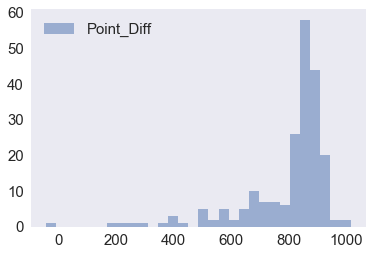

In [132]:
#check total points diff distribution
plt.hist(fifa_2018_clean['Total_Points_Diff'], alpha = 0.5, bins=30, label='Point_Diff');
plt.legend();

##### Z - Test Conclusion:

The Difference in points isn't exactly a normal distribution; it does seem to have a normal shape around 800 to 1000. The sample, or in this case the population is larger than 30 and we can calculate the variance, so I added a z test to my analysis. Because the z-value falls outside the acceptance region between 1.959 and -1.959 critical z-values, we reject the null hypothesis. Another way to interpret the result is that the p-value is lower than the critical z-value and the type I error rate or alpha of .05 (5%), the probability of not getting a observed or extreme mean diﬀerence given the null hypothesis is false; therefore, we reject the null hypothesis. Mean diﬀerence between total points in december and total points in january is statistically signiﬁcant and not based on chance.  Lastly, the zero p value or less than 0.00001 indicates it's impossible under the null.

#### One Tailed Tests

**$$Mathematical\ Statement:$$**
**$$H_0: \mu_{tpd} - \mu_{tpj} \geq \alpha$$**
**$$H_1: \mu_{tpd} - \mu_{tpj} < \alpha $$**

**$$Definitions\ of\ Notation\ Used:$$**
**$$H_O: Null\ Hypothesis$$**
**$$H_1: Alternative\ Hypothesis$$**
**$$\mu_{tpd}: Total\ Points\ December\ population\ mean$$**
**$$\mu_{tpj}: Total\ Points\ January\ population\ mean$$**
**$$\alpha: level\ of\ significance\ 5\%$$**

##### Paired T - Test 

In [133]:
#critical t for significance level of .05 and degree of freedom of 210 (n-1)
tcritical = st.distributions.t.ppf(1-.05,210)
print('critical t:',tcritical)
    
#t-statistic and p-value for a paired two tailed test
paired_sample_one = st.ttest_rel(fifa_2018_clean['Total_Points_Dec'], fifa_2018_clean['Total_Points_Jan'])
print('t-statistic: %.5f,  one tailed p-value: %.5f'% paired_sample_one)

critical t: 1.652141981027916
t-statistic: 74.63684,  one tailed p-value: 0.00000


###### Paired T-Test Conclusion:

The t-test is invalid for small samples from non-normal distributions, but it is valid for large samples from non-normal distributions. Because the t-value falls outside the acceptance region 1.65214 critical t-values, we 
reject the null hypothesis. Another way to interpret the result is that the p-value is lower than the critical t-value and the type I error rate or alpha of .05 (5%), the probability of not getting a observed or extreme mean diﬀerence given the null hypothesis is false; therefore, we reject the null hypothesis. Mean diﬀerence between total points in december and total points in january is statistically signiﬁcant and not based on chance.  Lastly, the zero p value or less than 0.00001 indicates it's impossible under the null.

In [134]:
##critical z for significance level of .05
zcritical_one = st.norm.ppf(1-.05)

#calculate zscore and pvalue
z_score, p_value = sm.stats.ztest(fifa_2018_clean['Total_Points_Dec'], fifa_2018_clean['Total_Points_Jan'])

print('critical z:', zcritical_one)
print('z-score:', round(z_score,5))
print('p-value: %.5f'% p_value)

critical z: 1.6448536269514722
z-score: 27.98671
p-value: 0.00000


##### Z - Test Conclusion:

The Difference in points isn't exactly a normal distribution; it does seem to have a normal shape around 800 to 1000. The sample, or in this case the population is larger than 30 and we can calculate the variance, so I added a z test to my analysis. Because the z-value falls outside the acceptance region 1.64485 critical z-values, we reject the null hypothesis. Another way to interpret the result is that the p-value is lower than the critical z-value and the type I error rate or alpha of .05 (5%), the probability of not getting a observed or extreme mean diﬀerence given the null hypothesis is false; therefore, we reject the null hypothesis. Mean diﬀerence between total points in december and total points in january is statistically signiﬁcant and not based on chance.  Lastly, the zero p value or less than 0.00001 indicates it's impossible under the null.

### post-hoc analysis - Bonferroni correction test

In [135]:
from statsmodels.sandbox.stats.multicomp import multipletests

#calculate bonferroni corrections
p_adjusted_ttest = multipletests(paired_sample, method='bonferroni')
p_adjusted_ztest = multipletests(p_value, method='bonferroni')

#print statements
print(p_adjusted_ttest)
print('TTest Bonferroni Correction:', .05/2, '\n')
print(p_adjusted_ztest)
print('ZTest Bonferroni Correction:', .05/1)

(array([False,  True]), array([1.00000000e+000, 7.49403697e-153]), 0.025320565519103666, 0.025)
TTest Bonferroni Correction: 0.025 

(array([ True]), array([2.35790281e-172]), 0.050000000000000044, 0.05)
ZTest Bonferroni Correction: 0.05


###### Bonferroni Correction Conclusion:

The Bonferroni correction adjusted my type 1 error rate for the TTest to .025 and .05 for the ZTest.  For hypothesis testing, we'll use the new adjusted rate .025.  Our p_values on two tailed test were less than .00001 and of course the one tailed pvalues as well. So, we reject the null hypothesis based on 2018 results.

# Conclusion

In Conclusion, the rank results are based on the ending point totals at the end of the year and change in the totals from the beginning to the end of the year.  Our results indicate, at least for 2018.  Tournament years; in particular, world cup probably helped the teams accumulate more points than they normally would.  Even though, almost all our teams increase points through the year only half improved their rank.  The confederation does seem to play a slight role in rankings; most likely, due to competition in a a particular region.  For example, Conmebol confederation seems to on have the highest ranked teams, while OFC teams has weaker competition that translates to poor ranks.  Ultimately, point totals at the end of year determine the rank, while there are underlying factors such as competition probably accounted for in the rankings and maybe some biased to certain regions or historically good teams even when they have a poor year.  For 2018, we can conclude due to the tournament year and other factors; that the evidence points to higer point totals being higher by year end and definetely not equal by year end, but a better analysis would have been over 5 to 10 year span.  Lastly, I did this for fun; I love soccer and I wanted to practice some data analysis.